# Analysing OSM history data for Donetsk before the bombing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sqlalchemy import create_engine, text

In [2]:
# creating connection to PostreSQL and querying database 
import psycopg2
 
# declare the connection string specifying the  hostname, database name, user name, and password
conn_string = "host='localhost' dbname='Ukraine'\
user='postgres' password='Open@close'"
 
# using the connection string to establish the connection
conn = psycopg2.connect(conn_string)

#creating engine 
engine = create_engine('postgresql+psycopg2://', creator=lambda: conn)

In [3]:
#querying postgres to fetch data of donetsk for the 6 months before the bombing 
query1 = "SELECT * FROM merged1 WHERE timestamp <TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp >TO_DATE('2021-08-24','yyyy-mm-dd') AND latitude BETWEEN 46.6876770 AND 49.2339965 AND longitude BETWEEN 36.5419522 AND 39.0914413;"

In [4]:
#storing in a dataframe
donetsk_1= pd.read_sql(query1, con=engine)
donetsk_1.head()

id  changeset deleted                  timestamp      uid  \
0  9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
1  9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
2  9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   
3  2071899205  110933868   false  2021-09-08 19:31:20+01:00  4119278   
4  2071899205  110933868   false  2021-09-08 19:31:20+01:00  4119278   

        user  version visibility    tp   extra   latitude  longitude  
0   old wolf        1       true  node  263426  49.181996  36.688821  
1   old wolf        1       true  node  276489  49.204371  36.690381  
2   old wolf        1       true  node  286105  49.181970  36.685149  
3  SmartFinn        3       true  node  106698  47.783135  37.245779  
4  SmartFinn        3       true  node  106698  47.783152  37.245808

In [5]:
#removing duplicate raws 
donetsk_1=donetsk_1.drop_duplicates(subset=['id', 'changeset'],keep='first',ignore_index=True)
donetsk_1.head()

id  changeset deleted                  timestamp      uid  \
0  9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
1  9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
2  9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   
3  2071899205  110933868   false  2021-09-08 19:31:20+01:00  4119278   
4  2071899205  111418211   false  2021-09-19 18:24:50+01:00  4119278   

        user  version visibility    tp   extra   latitude  longitude  
0   old wolf        1       true  node  263426  49.181996  36.688821  
1   old wolf        1       true  node  276489  49.204371  36.690381  
2   old wolf        1       true  node  286105  49.181970  36.685149  
3  SmartFinn        3       true  node  106698  47.783135  37.245779  
4  SmartFinn        4       true  node  106699  47.783135  37.245779

In [6]:
#splitting date only from timestamp and adding to the daraframe
donetsk_1['date'] = donetsk_1.loc[:, 'timestamp'].astype(str).str.split().str[0]
donetsk_1.head()

id  changeset deleted                  timestamp      uid  \
0  9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
1  9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
2  9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   
3  2071899205  110933868   false  2021-09-08 19:31:20+01:00  4119278   
4  2071899205  111418211   false  2021-09-19 18:24:50+01:00  4119278   

        user  version visibility    tp   extra   latitude  longitude  \
0   old wolf        1       true  node  263426  49.181996  36.688821   
1   old wolf        1       true  node  276489  49.204371  36.690381   
2   old wolf        1       true  node  286105  49.181970  36.685149   
3  SmartFinn        3       true  node  106698  47.783135  37.245779   
4  SmartFinn        4       true  node  106699  47.783135  37.245779   

         date  
0  2021-11-16  
1  2021-11-17  
2  2021-11-17  
3  2021-09-08  
4  2021-09-19

In [7]:
donetsk_1

id  changeset deleted                  timestamp      uid  \
0       9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
1       9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
2       9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   
3       2071899205  110933868   false  2021-09-08 19:31:20+01:00  4119278   
4       2071899205  111418211   false  2021-09-19 18:24:50+01:00  4119278   
...            ...        ...     ...                        ...      ...   
512016  9238661080  113576558   false  2021-11-09 17:51:48+00:00  4119278   
512017  9238661080  113870937   false  2021-11-16 21:46:42+00:00  4119278   
512018  9246685433  113706739   false  2021-11-12 18:05:11+00:00  4119278   
512019  9246685433  113870937   false  2021-11-16 21:46:42+00:00  4119278   
512020  9247041358  113712896   false  2021-11-12 21:23:24+00:00  2769224   

             user  version visibility    tp   extra   latitude  longitude  \
0        old wolf        1       true  node  263426  49.181996  36.688821   
1        old wolf        1       true  node  276489  49.204371  36.690381   
2        old wolf        1       true  node  286105  49.181970  36.685149   
3       SmartFinn        3       true  node  106698  47.783135  37.245779   
4       SmartFinn        4       true  node  106699  47.783135  37.245779   
...           ...      ...        ...   ...     ...        ...        ...   
512016  SmartFinn        1       true  node   61792  47.756016  37.221712   
512017  SmartFinn        2       true  node   61793  47.756016  37.221712   
512018  SmartFinn        1       true  node  139690  47.750780  37.230248   
512019  SmartFinn        2       true  node  139691  47.750780  37.230248   
512020   old wolf        1       true  node  144781  49.063527  36.713271   

              date  
0       2021-11-16  
1       2021-11-17  
2       2021-11-17  
3       2021-09-08  
4       2021-09-19  
...            ...  
512016  2021-11-09  
512017  2021-11-16  
512018  2021-11-12  
512019  2021-11-16  
512020  2021-11-12  

[512021 rows x 13 columns]

### *Assigning Human and Bot categories to changesets* 

In [8]:
#taking only useful columns
donetsk1=donetsk_1.drop(['latitude','longitude','extra'],axis=1)
donetsk1.head()

id  changeset deleted                  timestamp      uid  \
0  9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
1  9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
2  9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   
3  2071899205  110933868   false  2021-09-08 19:31:20+01:00  4119278   
4  2071899205  111418211   false  2021-09-19 18:24:50+01:00  4119278   

        user  version visibility    tp        date  
0   old wolf        1       true  node  2021-11-16  
1   old wolf        1       true  node  2021-11-17  
2   old wolf        1       true  node  2021-11-17  
3  SmartFinn        3       true  node  2021-09-08  
4  SmartFinn        4       true  node  2021-09-19

In [9]:
#counting number of edits in each changeset and then assigning a category [humna/bot] based on the counts
#for this classification, it is assumed that a changeset having more than 1000 edits in one time is contributed by automated script

df1=donetsk1.drop(['deleted','timestamp','uid','user','version','visibility','tp'],axis=1)
df1=df1.groupby(['date','changeset']).count()
df1

id
date       changeset     
2021-08-24 110141280    4
           110146734    2
           110147735    6
           110149386    1
           110149739    1
...                   ...
2022-02-23 117785776  128
           117785848   15
           117789093  176
           117789384   17
           117789408   11

[5942 rows x 1 columns]

In [10]:
df1['category']=df1['id'].apply(lambda x:'human' if x <1000 else 'bot')
df1

id category
date       changeset              
2021-08-24 110141280    4    human
           110146734    2    human
           110147735    6    human
           110149386    1    human
           110149739    1    human
...                   ...      ...
2022-02-23 117785776  128    human
           117785848   15    human
           117789093  176    human
           117789384   17    human
           117789408   11    human

[5942 rows x 2 columns]

In [11]:
#total changesets contribued by each -bot and human
df1.groupby(['category']).count()

id
category      
bot         38
human     5904

In [12]:
#adding category to the original dataframe 
donetsk1=donetsk1.merge(df1['category'], on='changeset', how='left')
donetsk1.head(7)

id  changeset deleted                  timestamp       uid  \
0  9258391776  113869515   false  2021-11-16 21:01:55+00:00   2769224   
1  9260631685  113902306   false  2021-11-17 15:06:22+00:00   2769224   
2  9261464845  113913275   false  2021-11-17 19:33:51+00:00   2769224   
3  2071899205  110933868   false  2021-09-08 19:31:20+01:00   4119278   
4  2071899205  111418211   false  2021-09-19 18:24:50+01:00   4119278   
5  9427439434  116282998   false  2022-01-18 06:54:05+00:00  10210453   
6  9427764632  116288612   false  2022-01-18 09:19:22+00:00  10210453   

           user  version visibility    tp        date category  
0      old wolf        1       true  node  2021-11-16    human  
1      old wolf        1       true  node  2021-11-17    human  
2      old wolf        1       true  node  2021-11-17    human  
3     SmartFinn        3       true  node  2021-09-08      bot  
4     SmartFinn        4       true  node  2021-09-19    human  
5  dolphin21593        1       true  node  2022-01-18    human  
6  dolphin21593        1       true  node  2022-01-18    human

In [13]:
donetsk1

id  changeset deleted                  timestamp      uid  \
0       9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
1       9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
2       9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   
3       2071899205  110933868   false  2021-09-08 19:31:20+01:00  4119278   
4       2071899205  111418211   false  2021-09-19 18:24:50+01:00  4119278   
...            ...        ...     ...                        ...      ...   
512016  9238661080  113576558   false  2021-11-09 17:51:48+00:00  4119278   
512017  9238661080  113870937   false  2021-11-16 21:46:42+00:00  4119278   
512018  9246685433  113706739   false  2021-11-12 18:05:11+00:00  4119278   
512019  9246685433  113870937   false  2021-11-16 21:46:42+00:00  4119278   
512020  9247041358  113712896   false  2021-11-12 21:23:24+00:00  2769224   

             user  version visibility    tp        date category  
0        old wolf        1       true  node  2021-11-16    human  
1        old wolf        1       true  node  2021-11-17    human  
2        old wolf        1       true  node  2021-11-17    human  
3       SmartFinn        3       true  node  2021-09-08      bot  
4       SmartFinn        4       true  node  2021-09-19    human  
...           ...      ...        ...   ...         ...      ...  
512016  SmartFinn        1       true  node  2021-11-09    human  
512017  SmartFinn        2       true  node  2021-11-16      bot  
512018  SmartFinn        1       true  node  2021-11-12    human  
512019  SmartFinn        2       true  node  2021-11-16      bot  
512020   old wolf        1       true  node  2021-11-12    human  

[512021 rows x 11 columns]

### *Comparing the contribution done by Humans and Bots*

In [14]:
# date-wise grouping based on categories
df2=donetsk1.groupby(['date','category']).count()
df2.head(10)

id  changeset  deleted  timestamp   uid  user  version  \
date       category                                                             
2021-08-24 human      328        328      328        328   328   328      328   
2021-08-25 human     2827       2827     2827       2827  2827  2827     2827   
2021-08-26 bot       1269       1269     1269       1269  1269  1269     1269   
           human     2494       2494     2494       2494  2494  2494     2494   
2021-08-27 human     3766       3766     3766       3766  3766  3766     3766   
2021-08-28 bot       3334       3334     3334       3334  3334  3334     3334   
           human     1031       1031     1031       1031  1031  1031     1031   
2021-08-29 bot       1748       1748     1748       1748  1748  1748     1748   
           human      755        755      755        755   755   755      755   
2021-08-30 human     2637       2637     2637       2637  2637  2637     2637   

                     visibility    tp  
date       category                    
2021-08-24 human            328   328  
2021-08-25 human           2827  2827  
2021-08-26 bot             1269  1269  
           human           2494  2494  
2021-08-27 human           3766  3766  
2021-08-28 bot             3334  3334  
           human           1031  1031  
2021-08-29 bot             1748  1748  
           human            755   755  
2021-08-30 human           2637  2637

In [15]:
#creating two sepearte datafarmes each having daily total contribution by human and bot respectively for the 6 months 
df3=df2.xs('human', level='category')
df4=df2.xs('bot', level='category')

In [16]:
df3.head(3)

id  changeset  deleted  timestamp   uid  user  version  \
date                                                                   
2021-08-24   328        328      328        328   328   328      328   
2021-08-25  2827       2827     2827       2827  2827  2827     2827   
2021-08-26  2494       2494     2494       2494  2494  2494     2494   

            visibility    tp  
date                          
2021-08-24         328   328  
2021-08-25        2827  2827  
2021-08-26        2494  2494

In [17]:
df4.head(3)

id  changeset  deleted  timestamp   uid  user  version  \
date                                                                   
2021-08-26  1269       1269     1269       1269  1269  1269     1269   
2021-08-28  3334       3334     3334       3334  3334  3334     3334   
2021-08-29  1748       1748     1748       1748  1748  1748     1748   

            visibility    tp  
date                          
2021-08-26        1269  1269  
2021-08-28        3334  3334  
2021-08-29        1748  1748

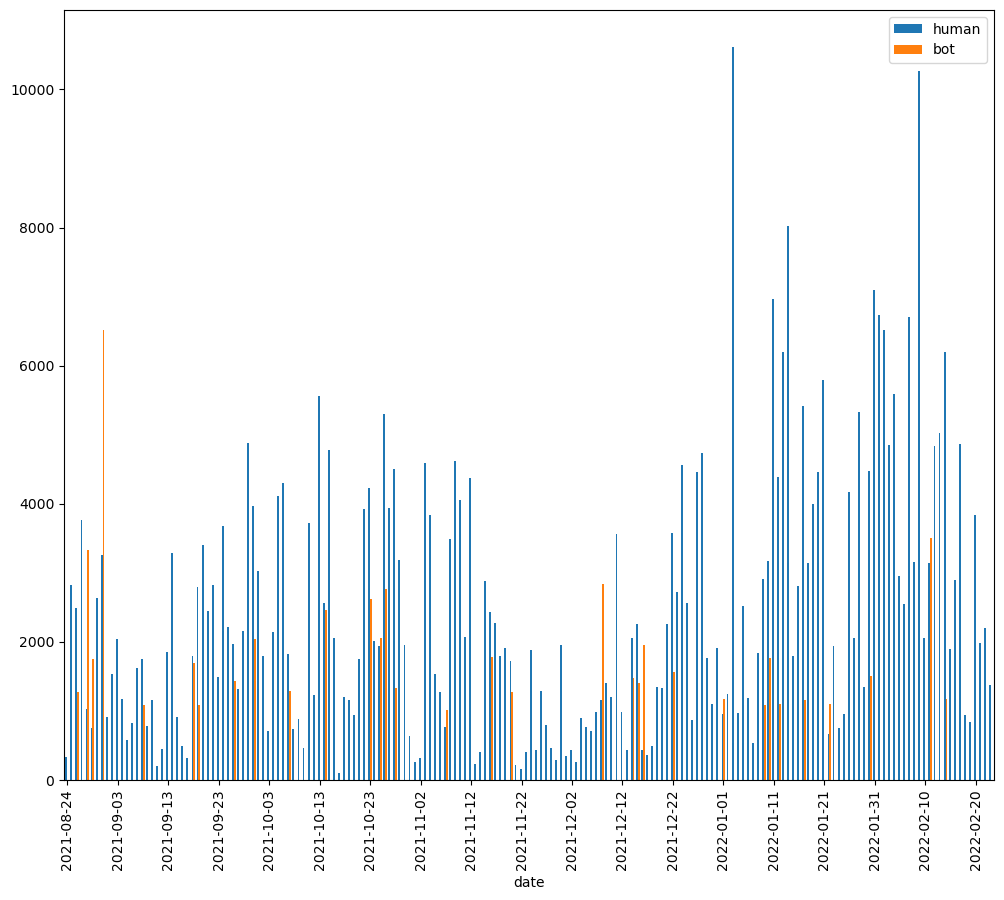

In [18]:
#plotting number of edits by both- human and bot category

x= df3.index
y=df3['changeset']
z=df4['changeset']

df5 = pd.DataFrame({
    'date': x,
    'human': y,
    'bot':z
})
df5 = df5.reset_index(drop=True)

step_size = 10 
ax = df5.plot(x="date", y=["human", "bot"],width=0.75, kind="bar", rot=90,figsize=(12, 10))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()

# to set x-axis labels based on the step size
ax.set_xticks(x_ticks[::step_size])
ax.set_xticklabels(x_tick_labels[::step_size])

plt.show()

### *Analysis of data for 1 week before the bombing*

In [19]:
#counting number of ediits per day for this week and plotting on bar graph
df6= donetsk1.loc[(donetsk1['date']>='2022-02-17') & (donetsk1['date']<'2022-02-26'),:]
df6=df6.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df6=df6.groupby(['date']).count()
df6.head(3)

id
date            
2022-02-17  4869
2022-02-18   946
2022-02-19   838

In [20]:
#statistic measures of edits
df6.describe()

id
count     7.000000
mean   2291.428571
std    1521.599362
min     838.000000
25%    1158.000000
50%    1984.000000
75%    3016.500000
max    4869.000000

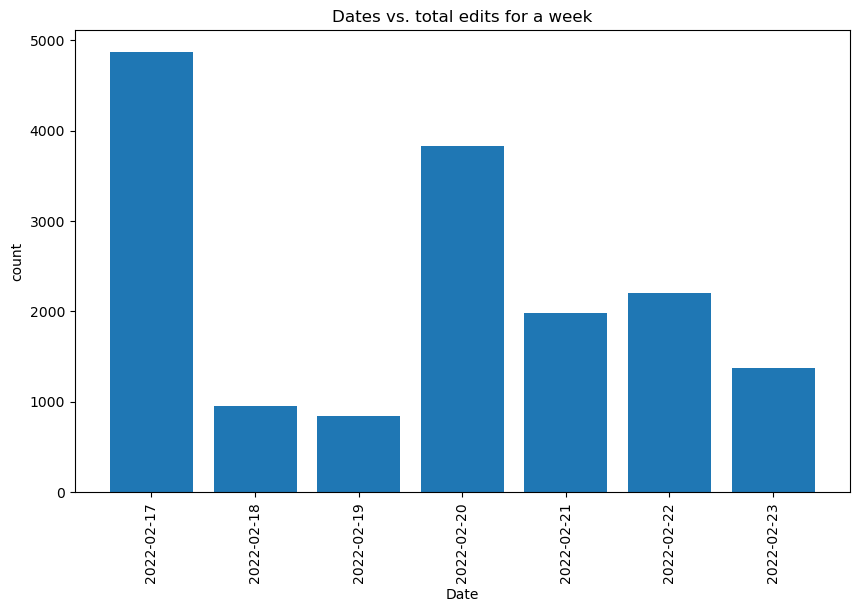

In [21]:
#using bar graph to plot the editing frequency

df6.index = pd.to_datetime(df6.index)
plt.figure(figsize=(10, 6))  
plt.bar(df6.index, df6['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a week')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the month before the bombing*

In [22]:
#counting number of ediits per day for 1 month and plotting on bar graph
df7= donetsk1.loc[(donetsk1['date']>='2022-01-24') & (donetsk1['date']<'2022-02-24'),:]
df7=df7.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df7=df7.groupby(['date']).count()
df7.head()

id
date            
2022-01-24   757
2022-01-25   950
2022-01-26  4164
2022-01-27  2052
2022-01-28  5332

In [23]:
df7.describe() #statistic measures of edits

id
count     31.000000
mean    3992.516129
std     2431.010035
min      757.000000
25%     2017.500000
50%     3832.000000
75%     5785.000000
max    10267.000000

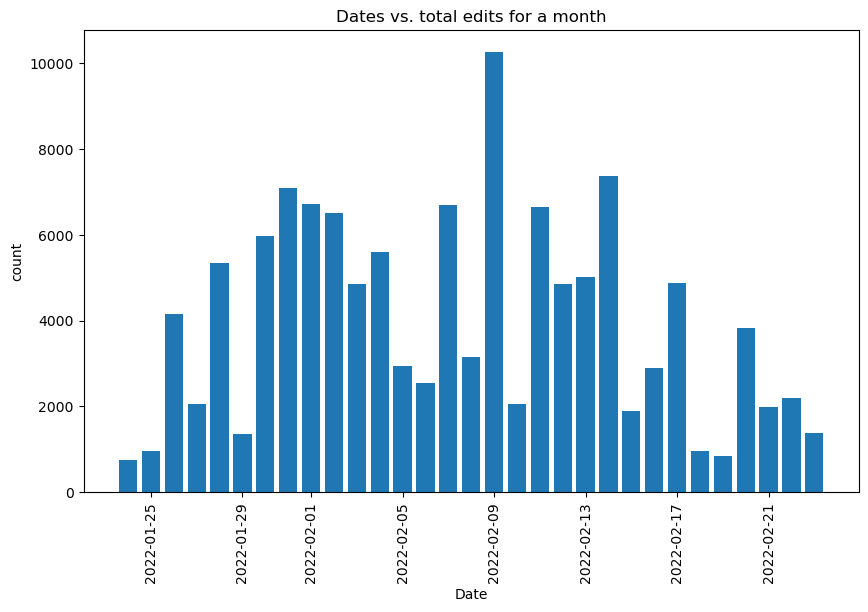

In [24]:
df7.index = pd.to_datetime(df7.index)
plt.figure(figsize=(10, 6))  
plt.bar(df7.index, df7['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a month')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 3 months before the bombing*

In [25]:
#counting number of ediits per day for the 3 months before bombing and plotting on bar graph
df8= donetsk1.loc[(donetsk1['date']>'2021-11-25') & (donetsk1['date']<'2022-02-24'),:]
df8=df8.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df8=df8.groupby(['date']).count()
df8.head()

id
date            
2021-11-26  1286
2021-11-27   789
2021-11-28   457
2021-11-29   293
2021-11-30  1956

In [26]:
df8.describe() #statistic measures of edits

id
count     90.000000
mean    3095.877778
std     2365.262001
min      265.000000
25%     1193.250000
50%     2324.000000
75%     4815.750000
max    10619.000000

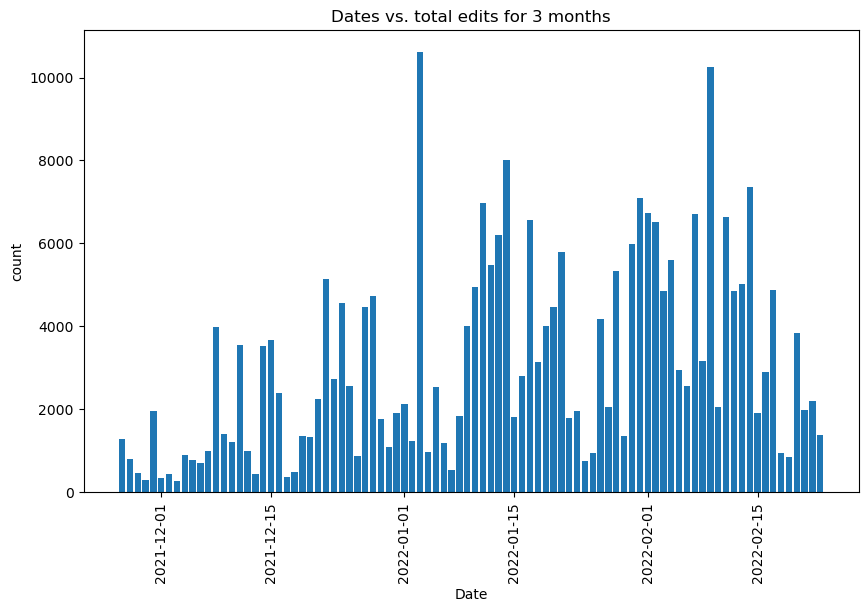

In [27]:
df8.index = pd.to_datetime(df8.index)
plt.figure(figsize=(10, 6))  
plt.bar(df8.index, df8['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for 3 months')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 6 months before the bombing*

In [28]:
#counting number of ediits per day for the 6 months before bombing and plotting on bar graph

df9=donetsk1.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df9=df9.groupby(['date']).count()
df9.describe()

id
count    184.000000
mean    2782.722826
std     2140.043528
min      103.000000
25%     1069.750000
50%     2149.500000
75%     3998.250000
max    10619.000000

In [29]:
#analysing frequency of edits for each month during these 6 months period
dfsep= donetsk1.loc[(donetsk1['date']>='2021-08-24') & (donetsk1['date']<'2021-09-24'),:]
dfsep=dfsep.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfsep=dfsep.groupby(['date']).count()
dfsep=dfsep.reset_index()

In [30]:
dfoct= donetsk1.loc[(donetsk1['date']>='2021-09-24') & (donetsk1['date']<'2021-10-24'),:]
dfoct=dfoct.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfoct=dfoct.groupby(['date']).count()
dfoct=dfoct.reset_index()

In [31]:
dfnov= donetsk1.loc[(donetsk1['date']>='2021-10-24') & (donetsk1['date']<'2021-11-24'),:]
dfnov=dfnov.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfnov=dfnov.groupby(['date']).count()
dfnov=dfnov.reset_index()

In [32]:
dfdec= donetsk1.loc[(donetsk1['date']>='2021-11-24') & (donetsk1['date']<'2021-12-24'),:]
dfdec=dfdec.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfdec=dfdec.groupby(['date']).count()
dfdec=dfdec.reset_index()

In [33]:
dfjan= donetsk1.loc[(donetsk1['date']>='2021-12-24') & (donetsk1['date']<'2022-01-24'),:]
dfjan=dfjan.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfjan=dfjan.groupby(['date']).count()
dfjan=dfjan.reset_index()


In [34]:
dffeb= donetsk1.loc[(donetsk1['date']>='2022-01-24') & (donetsk1['date']<'2022-02-24'),:]
dffeb=dffeb.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dffeb=dffeb.groupby(['date']).count()
dffeb=dffeb.reset_index()


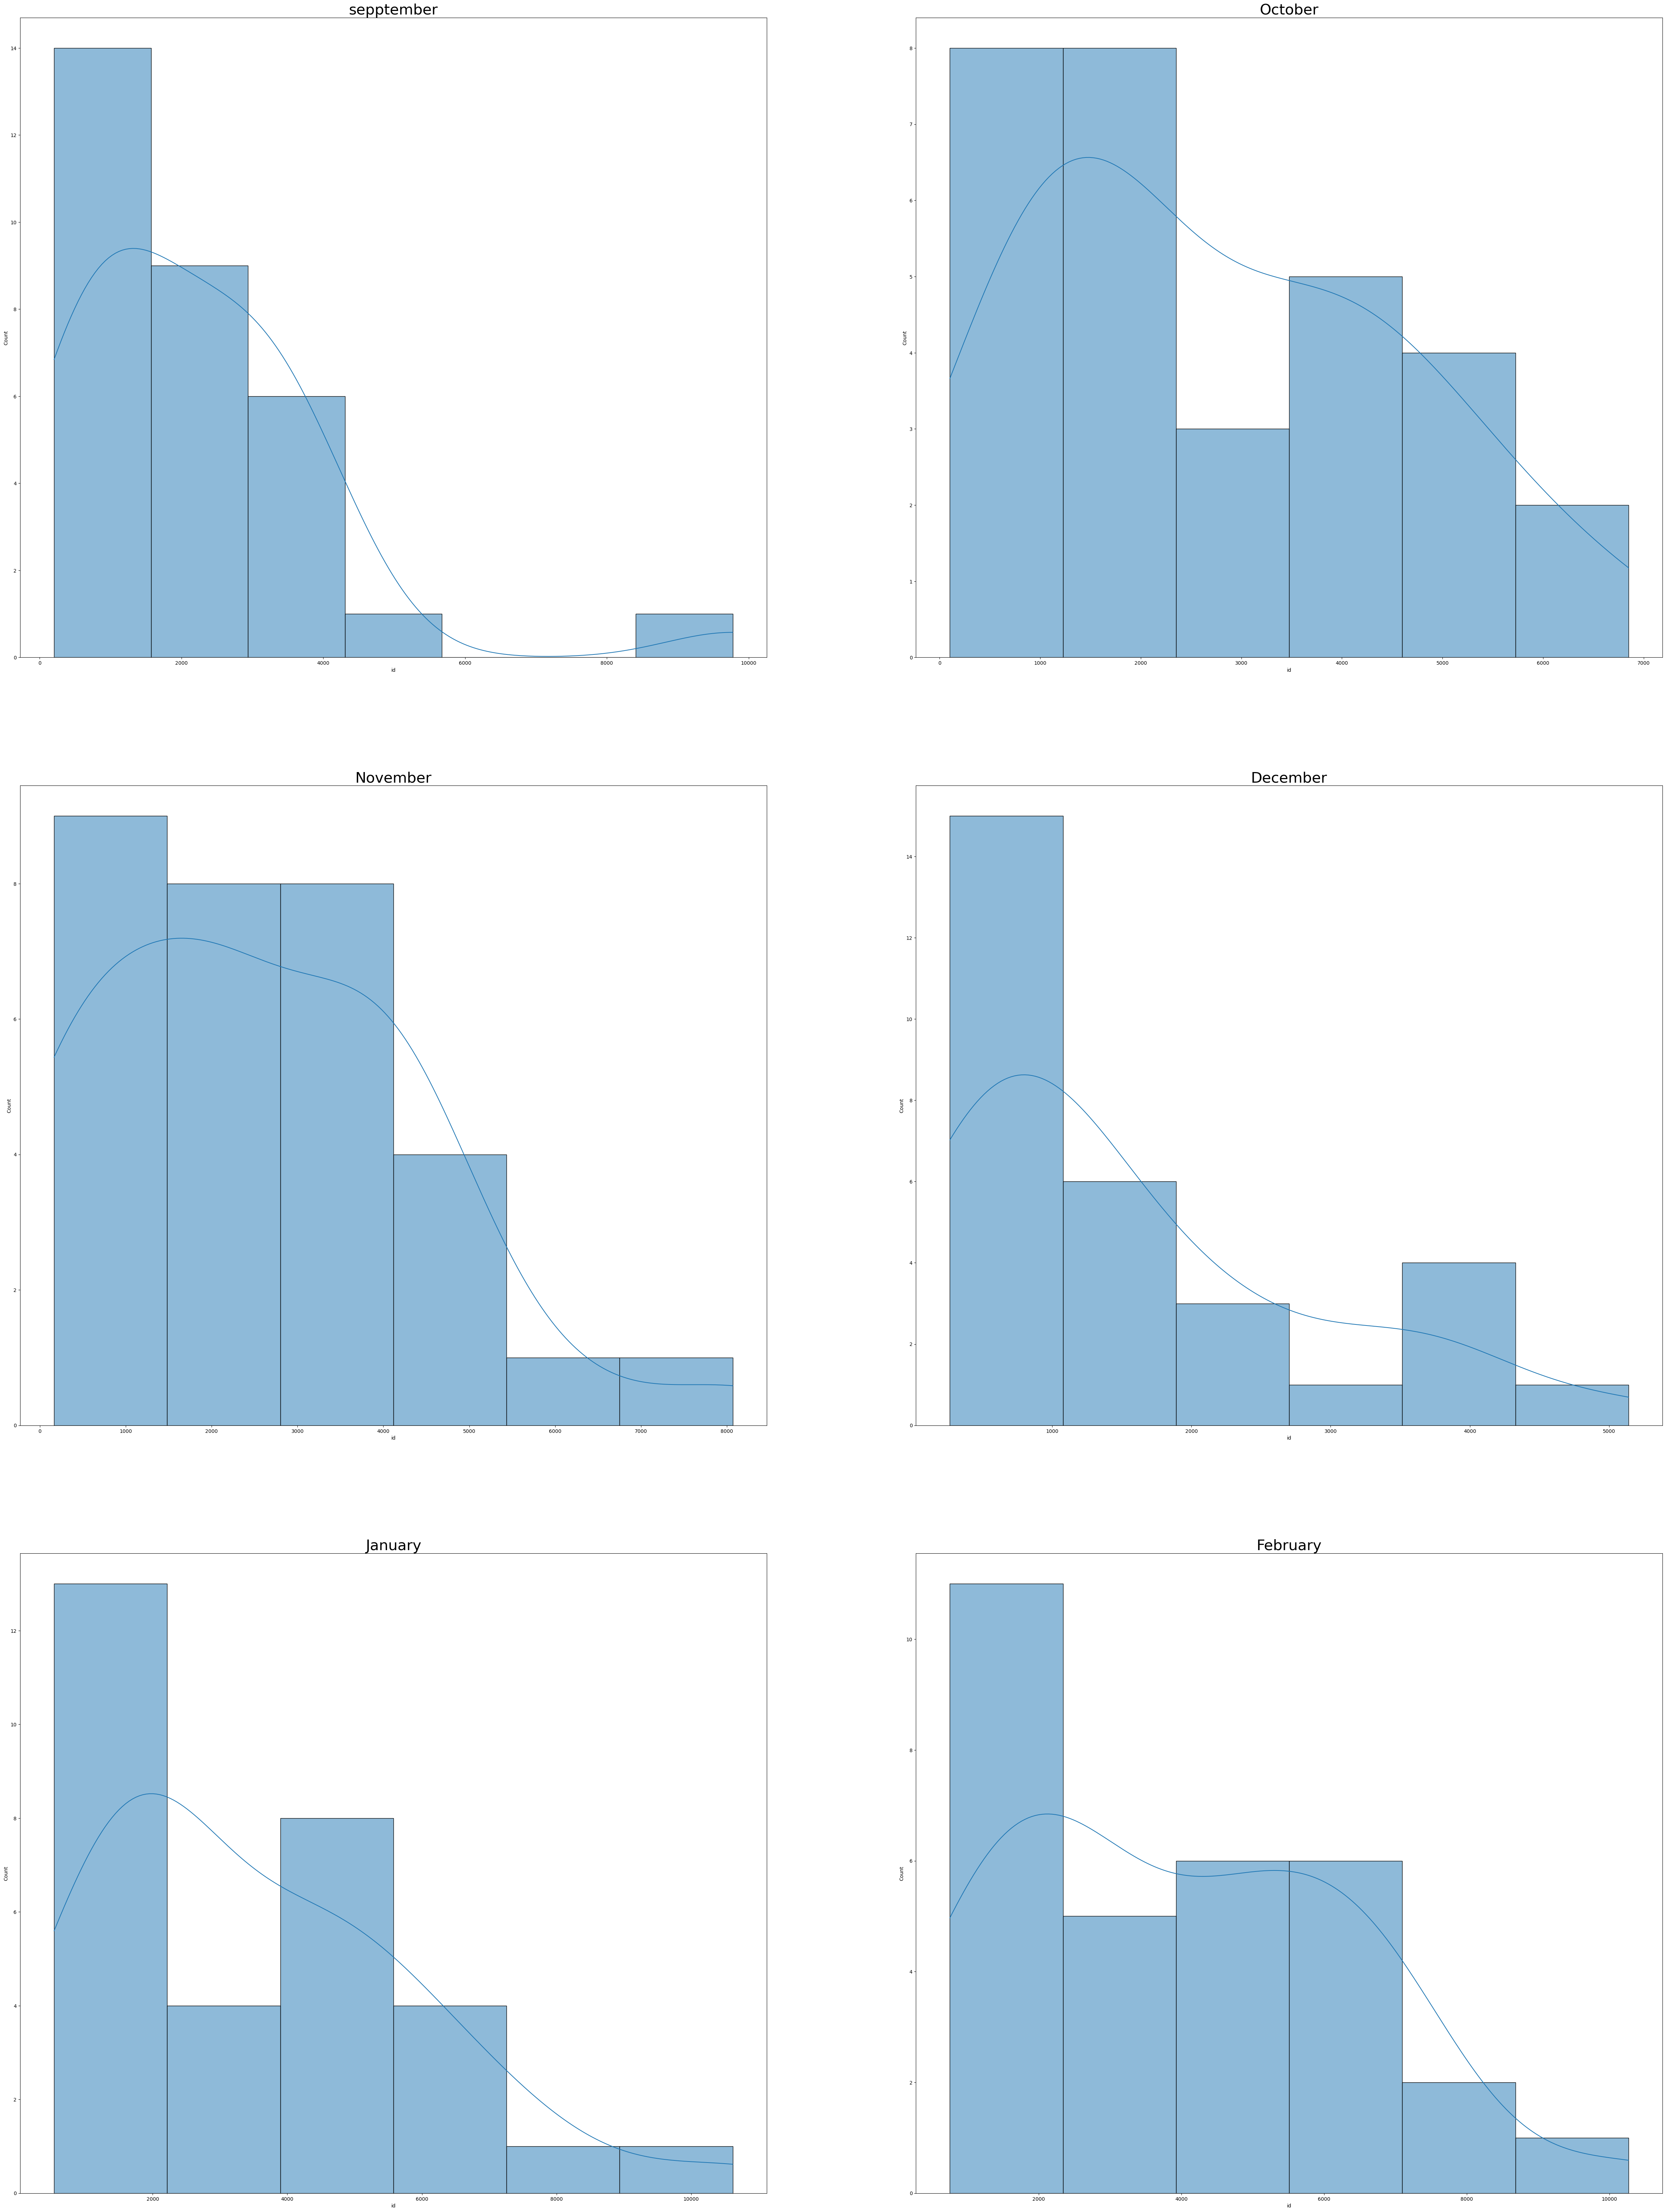

In [35]:
#histogram for frequency distributin 

fig,axes= plt.subplots(3,2,figsize=(60, 80))

axes = axes.flatten()

s=sb.histplot(data=dfsep, x='id',bins='auto',kde=True,ax=axes[0]).set_title('sepptember',fontsize = 30)
s=sb.histplot(data=dfoct, x='id',bins='auto',kde=True,ax=axes[1]).set_title('October',fontsize = 30)
s=sb.histplot(data=dfnov, x='id',bins='auto',kde=True,ax=axes[2]).set_title('November',fontsize = 30)
s=sb.histplot(data=dfdec, x='id',bins='auto',kde=True,ax=axes[3]).set_title('December',fontsize = 30)
s=sb.histplot(data=dfjan, x='id',bins='auto',kde=True,ax=axes[4]).set_title('January',fontsize = 30)
s=sb.histplot(data=dffeb, x='id',bins='auto',kde=True,ax=axes[5]).set_title('February',fontsize = 30)




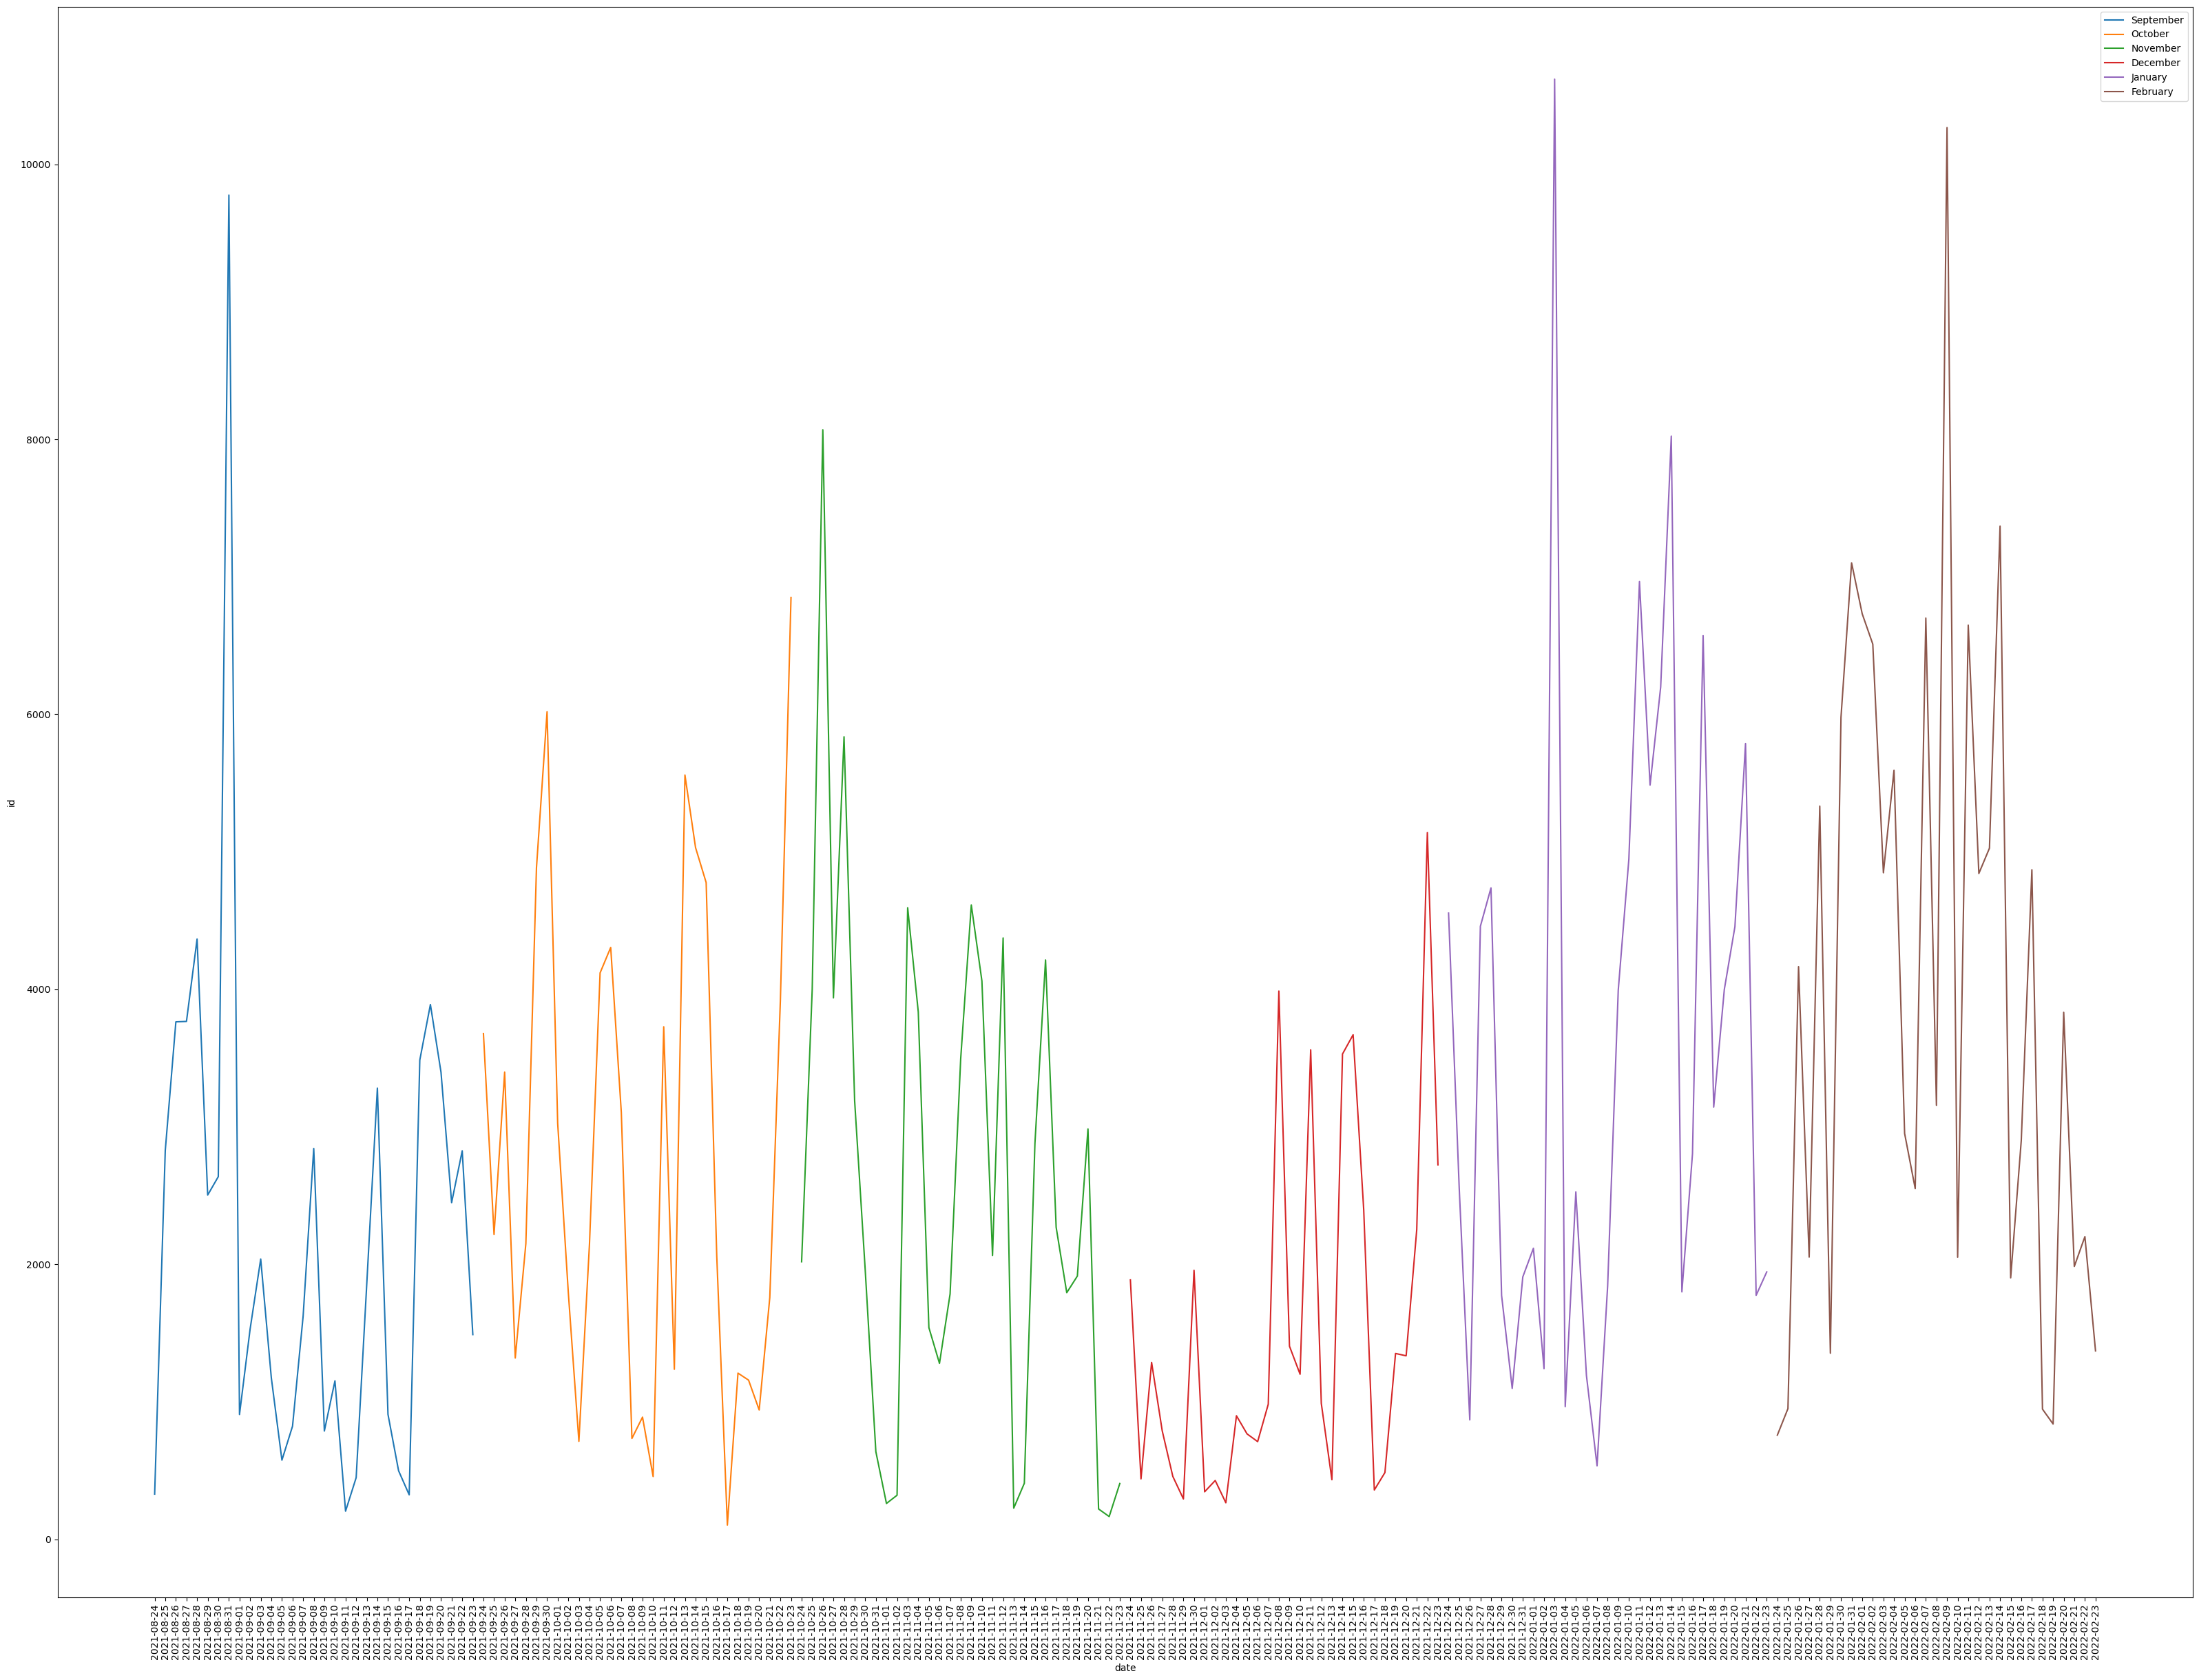

In [36]:
#trend chart to understand the editting pattern during 6 months befire bombing

fig = plt.subplots(figsize=(40, 30))
s=sb.lineplot(x='date', y='id', data=dfsep,label='September')
s=sb.lineplot(x='date', y='id', data=dfoct,label='October')
s=sb.lineplot(x='date', y='id', data=dfnov,label='November')
s=sb.lineplot(x='date', y='id', data=dfdec,label='December')
s=sb.lineplot(x='date', y='id', data=dfjan,label='January')
s=sb.lineplot(x='date', y='id', data=dffeb,label='February')
plt.xticks(rotation=90)

plt.show()

### *Analysing editing frequency at contributor level*

In [37]:
#working on number of changesets and number of edits by each user during the 6 months

#df10=donetsk1.drop(['deleted','timestamp','uid','version','visibility','tp','extra','date'], axis=1)
df10=donetsk1.loc[donetsk1['category']=='human']
df11=donetsk1.loc[donetsk1['category']=='bot']

df10=df10.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)
df11=df11.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)


In [38]:
#counting unique changesets added by each user during 6 months

df12=df10.groupby('uid')['changeset'].nunique()
df13=df11.groupby('uid')['changeset'].nunique()

In [39]:
#number of unique changesets posted by each contributors

changesets = df12.reset_index()
changesets

uid  changeset
0        5359          6
1        6389          1
2       22827          1
3       71862          3
4      147230          1
..        ...        ...
246  14950764          6
247  15000002          1
248  15001933          1
249  15082595          1
250  15092213          6

[251 rows x 2 columns]

In [40]:
#counting the changesets added bu software bots during the period
changesets_bot= df13.reset_index()
changesets_bot

uid  changeset
0   1825090         12
1   2471547          1
2   2769224          1
3   4119278         14
4   4164103          2
5   4296598          4
6   6193378          1
7   6556551          1
8  10184360          1
9  10857625          1

In [41]:
#the uid suggests that the automated scripts were added by the same users as those listed in 'human' category 
#further analysis wont consider categories seperately
changesets_bot['uid'].isin(changesets_bot['uid'])

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: uid, dtype: bool

In [42]:
#grouping data on user and counting the total contribution made by each user during the whole period
df14=df10.drop(['changeset','category'],axis=1)
id_counts=df14.groupby(['uid']).count()

id_counts=id_counts.reset_index()
id_counts

uid   id
0        5359    6
1        6389    1
2       22827    1
3       71862   19
4      147230  259
..        ...  ...
246  14950764  352
247  15000002    1
248  15001933   50
249  15082595    2
250  15092213   36

[251 rows x 2 columns]

In [43]:
# Grouping users based on total contribution using the values of 25% and 75% values of quantiles 
# inactive mapper: less than 2000 edits 
# casual mapper: 2000 - 6000 edits
# committed mappers : more than 6000 edits [values based on the quartile values of 6 months months]

id_counts['contribution level']=id_counts['id'].apply(lambda x: 'inactive' if x < 2000 else ('casual mapper' if 2000 <= x < 6000 else 'committed'))

#id_counts.reset_index() 
id_counts.head()

uid   id contribution level
0    5359    6           inactive
1    6389    1           inactive
2   22827    1           inactive
3   71862   19           inactive
4  147230  259           inactive

In [44]:
#count of contributors in each category

contribution= id_counts.drop('id', axis=1)

contribution=contribution.groupby('contribution level').count()

print(contribution)

                    uid
contribution level     
casual mapper        12
committed             8
inactive            231


In [45]:
id_counts.head()

uid   id contribution level
0    5359    6           inactive
1    6389    1           inactive
2   22827    1           inactive
3   71862   19           inactive
4  147230  259           inactive

In [46]:
#adding contribution level to the dataframe 


temp=id_counts.drop('id',axis=1)
temp=temp.set_index('uid')


In [47]:

donetsk1=donetsk1.merge(temp['contribution level'], on='uid', how='left')
donetsk1

id  changeset deleted                  timestamp      uid  \
0       9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
1       9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
2       9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   
3       2071899205  110933868   false  2021-09-08 19:31:20+01:00  4119278   
4       2071899205  111418211   false  2021-09-19 18:24:50+01:00  4119278   
...            ...        ...     ...                        ...      ...   
512016  9238661080  113576558   false  2021-11-09 17:51:48+00:00  4119278   
512017  9238661080  113870937   false  2021-11-16 21:46:42+00:00  4119278   
512018  9246685433  113706739   false  2021-11-12 18:05:11+00:00  4119278   
512019  9246685433  113870937   false  2021-11-16 21:46:42+00:00  4119278   
512020  9247041358  113712896   false  2021-11-12 21:23:24+00:00  2769224   

             user  version visibility    tp        date category  \
0        old wolf        1       true  node  2021-11-16    human   
1        old wolf        1       true  node  2021-11-17    human   
2        old wolf        1       true  node  2021-11-17    human   
3       SmartFinn        3       true  node  2021-09-08      bot   
4       SmartFinn        4       true  node  2021-09-19    human   
...           ...      ...        ...   ...         ...      ...   
512016  SmartFinn        1       true  node  2021-11-09    human   
512017  SmartFinn        2       true  node  2021-11-16      bot   
512018  SmartFinn        1       true  node  2021-11-12    human   
512019  SmartFinn        2       true  node  2021-11-16      bot   
512020   old wolf        1       true  node  2021-11-12    human   

       contribution level  
0               committed  
1               committed  
2               committed  
3               committed  
4               committed  
...                   ...  
512016          committed  
512017          committed  
512018          committed  
512019          committed  
512020          committed  

[512021 rows x 12 columns]

In [48]:
#counting the number of deleted nodes for each user
df_deleted=donetsk1.loc[:,['uid','deleted']]
df_deleted
df_deleted=df_deleted.groupby(['uid','deleted'])['deleted'].count()
df_del=pd.DataFrame(df_deleted)
df_del= df_del.rename(columns={'deleted': 'deleted nodes'})
df_del=df_del.reset_index()
df_del=df_del.loc[df_del['deleted']=='true']


In [49]:
df_del=df_del.set_index('uid')
df_del

deleted  deleted nodes
uid                            
71862       true              3
161619      true             26
177389      true              6
200631      true             13
217427      true              6
...          ...            ...
14913865    true              1
14938674    true              3
14950764    true             12
15001933    true             11
15082595    true              1

[120 rows x 2 columns]

###  *Analysis of version history on contributor level*

In [50]:
#anaysing version history on contributor level
donetsk1=donetsk1.sort_values(['id', 'version'], ascending=[True,True])
donetsk1

id  changeset deleted                  timestamp      uid  \
398240    27880820  110641844    true  2021-09-02 23:15:26+01:00   437598   
73537     27888649  110641844    true  2021-09-02 23:15:26+01:00   437598   
376915    27914164  110641844    true  2021-09-02 23:15:26+01:00   437598   
358414    27919369  110641844    true  2021-09-02 23:15:26+01:00   437598   
470033    27934901  110641844    true  2021-09-02 23:15:26+01:00   437598   
...            ...        ...     ...                        ...      ...   
60225   9530994625  117789384   false  2022-02-23 21:58:38+00:00  1825090   
66620   9530994626  117789384   false  2022-02-23 21:58:38+00:00  1825090   
213039  9530994627  117789384   false  2022-02-23 21:58:38+00:00  1825090   
137344  9530994628  117789384   false  2022-02-23 21:58:38+00:00  1825090   
510285  9530994629  117789384   false  2022-02-23 21:58:38+00:00  1825090   

              user  version visibility    tp        date category  \
398240  dmgroom_ct        3      false  node  2021-09-02    human   
73537   dmgroom_ct        3      false  node  2021-09-02    human   
376915  dmgroom_ct        3      false  node  2021-09-02    human   
358414  dmgroom_ct        3      false  node  2021-09-02    human   
470033  dmgroom_ct        3      false  node  2021-09-02    human   
...            ...      ...        ...   ...         ...      ...   
60225       Ars-UA        1       true  node  2022-02-23    human   
66620       Ars-UA        1       true  node  2022-02-23    human   
213039      Ars-UA        1       true  node  2022-02-23    human   
137344      Ars-UA        1       true  node  2022-02-23    human   
510285      Ars-UA        1       true  node  2022-02-23    human   

       contribution level  
398240           inactive  
73537            inactive  
376915           inactive  
358414           inactive  
470033           inactive  
...                   ...  
60225           committed  
66620           committed  
213039          committed  
137344          committed  
510285          committed  

[512021 rows x 12 columns]

In [51]:
#Extract the list of editing version for each of the contributors 

version=donetsk1.groupby('uid')['version'].apply(list)
version_list=pd.DataFrame(version)
version_list.head()

version
uid                                                      
5359                               [10, 9, 12, 15, 17, 7]
6389                                                 [29]
22827                                                 [8]
71862   [2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, ...
147230  [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, ...

In [52]:
# This will count the number of new nodes vs number of edits 
#version=1 is considered new node, rest of the versions as edited nodes

# Function to count the frequency of new nodes(version=1) in a list
def count_ones(lst):
    return lst.count(1)

# Function to count the frequency of edited nodes in a list
def edits(lst):
    count=0
    for i in lst:
        if i != 1:
            count=count+1
    return count

# Apply the functions to the 'version' column
version_list['new nodes'] = version_list['version'].apply(count_ones)
version_list['edited nodes'] = version_list['version'].apply(edits)                                                    
version_list.head(16)
        

version  new nodes  \
uid                                                                    
5359                               [10, 9, 12, 15, 17, 7]          0   
6389                                                 [29]          0   
22827                                                 [8]          0   
71862   [2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, ...          2   
147230  [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, ...        250   
161619  [3, 3, 3, 3, 14, 13, 5, 3, 3, 3, 3, 3, 2, 2, 2...          6   
177389                                 [3, 3, 3, 2, 2, 2]          0   
193291                                                [8]          0   
200631  [7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...        567   
204049                                       [4, 4, 4, 4]          0   
217427  [4, 5, 6, 5, 6, 4, 5, 3, 4, 5, 5, 9, 10, 9, 10...         66   
227502                                             [2, 2]          0   
251543  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...          0   
297918  [3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...         73   
345544  [13, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,...         75   
370549                                                [2]          0   

        edited nodes  
uid                   
5359               6  
6389               1  
22827              1  
71862             17  
147230             9  
161619            94  
177389             6  
193291             1  
200631           165  
204049             4  
217427           141  
227502             2  
251543            22  
297918            42  
345544             8  
370549             1

###  *Calculating the total active days for each user*

In [53]:
df_lifespan= donetsk1.loc[:,['uid','date']]
df_lifespan['date'] = df_lifespan.date.astype('datetime64[ns]')

In [54]:
df_lifespan=df_lifespan.sort_values(['uid','date'],ascending=[True,True])#sorting the database to get the first day of contribution

In [55]:
# grouping on uid and then for each user, retrieving the first and last day of contribution time perdiod
df_lifespan=df_lifespan.groupby('uid')
first_row= df_lifespan.min()
last_row=df_lifespan.max()
#print('first_row')
timeframe1=pd.DataFrame(first_row).reset_index()
timeframe2=pd.DataFrame(last_row).reset_index()

In [56]:
# first day when the conributor made an activty
timeframe1.head(10)

uid       date
0    5359 2021-12-14
1    6389 2022-02-22
2   22827 2021-08-29
3   71862 2021-09-18
4  147230 2021-11-09
5  161619 2021-09-14
6  177389 2021-10-03
7  193291 2021-09-22
8  200631 2021-09-05
9  204049 2022-01-10

In [57]:
timeframe2.head(10) # last day when the conributor made an activty

uid       date
0    5359 2021-12-16
1    6389 2022-02-22
2   22827 2021-08-29
3   71862 2022-02-10
4  147230 2021-11-09
5  161619 2022-01-25
6  177389 2021-10-03
7  193291 2021-09-22
8  200631 2021-12-29
9  204049 2022-01-10

In [58]:
#calculating the difference between two dats

result=(timeframe2['date']-timeframe1['date'])
day=pd.to_timedelta(1, unit='d')
timeframe1['active days']=result+day
timeframe1=timeframe1.drop(['date'],axis=1)
timeframe1.head(6)

uid active days
0    5359      3 days
1    6389      1 days
2   22827      1 days
3   71862    146 days
4  147230      1 days
5  161619    134 days

## *Importing and analysing tag data for the 6 months period*

In [59]:
#to fetch the tags data for all the nodes fetched in previous query for 6 months

query2 = "SELECT * FROM node_tags WHERE id IN (SELECT id FROM user_info WHERE id IN (SELECT id FROM node_locations WHERE latitude BETWEEN 46.6876770 AND 49.2339965 AND longitude BETWEEN 36.5419522 AND 39.0914413) AND timestamp <TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp >TO_DATE('2021-08-24','yyyy-mm-dd'));"

In [60]:
donetsk2 = pd.read_sql(query2, con=engine)

In [61]:
pd.set_option('max_colwidth', None)
donetsk2

id  \
0        256613677   
1        256613677   
2        256613677   
3        256613677   
4        256613677   
...            ...   
747465  6430194387   
747466  6430194387   
747467  6430194387   
747468  6432786589   
747469  6432786589   

                                                                                                                                                                                                                                                                                                                                                                                                                                tags  
0                                                                                                                                                                                                                           {'attribution': 'travelgps.com.ua', 'created_by': 'JOSM', 'is_in': 'Ukraine', 'koatuu': '1410167601', 'name': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'name:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ', 'place': 'village'}  
1                                                                                                                                                                                                                                                 {'attribution': 'travelgps.com.ua', 'is_in': 'Ukraine', 'koatuu': '1410167601', 'name': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'name:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ', 'place': 'village'}  
2                                  {'addr:postcode': '83491', 'attribution': 'travelgps.com.ua', 'is_in': 'Ukraine', 'koatuu': '1410167601', 'name': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'name:en': 'Pavlohradske', 'name:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ', 'name:uk': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'place': 'village', 'population': '359', 'wikipedia': 'uk:ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'wikipedia:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ'}  
3       {'addr:postcode': '83491', 'attribution': 'travelgps.com.ua', 'is_in': 'Ukraine', 'koatuu': '1410167601', 'name': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'name:en': 'Pavlohradske', 'name:prefix': 'ÑÐµÐ»Ð¾', 'name:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ', 'name:uk': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'place': 'village', 'population': '359', 'wikipedia': 'uk:ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'wikipedia:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ'}  
4                           {'addr:postcode': '83491', 'attribution': 'travelgps.com.ua', 'koatuu': '1410167601', 'name': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'name:en': 'Pavlohradske', 'name:prefix': 'ÑÐµÐ»Ð¾', 'name:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ', 'name:uk': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'place': 'village', 'population': '359', 'wikipedia': 'uk:ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'wikipedia:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ'}  
...                                                                                                                                                                                                                                                                                                                                                                                                                              ...  
747465                                                                                                                                                                                                                                                                                                                                                                                                                            {}  
747466                                                                                                                                                                                                                                                                                                                                                                         

In [62]:
#count of empty tags

df15=donetsk2[donetsk2['tags']=='{}'].count()
df15

id      695864
tags    695864
dtype: int64

In [63]:
#only taking the records having non-null values in tags

df15=donetsk2[donetsk2['tags']!='{}']

df15

id  \
0        256613677   
1        256613677   
2        256613677   
3        256613677   
4        256613677   
...            ...   
747446  6387317655   
747447  6387317655   
747459  6408905752   
747460  6408905752   
747461  6408905752   

                                                                                                                                                                                                                                                                                                                                                                                                                                tags  
0                                                                                                                                                                                                                           {'attribution': 'travelgps.com.ua', 'created_by': 'JOSM', 'is_in': 'Ukraine', 'koatuu': '1410167601', 'name': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'name:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ', 'place': 'village'}  
1                                                                                                                                                                                                                                                 {'attribution': 'travelgps.com.ua', 'is_in': 'Ukraine', 'koatuu': '1410167601', 'name': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'name:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ', 'place': 'village'}  
2                                  {'addr:postcode': '83491', 'attribution': 'travelgps.com.ua', 'is_in': 'Ukraine', 'koatuu': '1410167601', 'name': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'name:en': 'Pavlohradske', 'name:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ', 'name:uk': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'place': 'village', 'population': '359', 'wikipedia': 'uk:ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'wikipedia:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ'}  
3       {'addr:postcode': '83491', 'attribution': 'travelgps.com.ua', 'is_in': 'Ukraine', 'koatuu': '1410167601', 'name': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'name:en': 'Pavlohradske', 'name:prefix': 'ÑÐµÐ»Ð¾', 'name:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ', 'name:uk': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'place': 'village', 'population': '359', 'wikipedia': 'uk:ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'wikipedia:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ'}  
4                           {'addr:postcode': '83491', 'attribution': 'travelgps.com.ua', 'koatuu': '1410167601', 'name': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'name:en': 'Pavlohradske', 'name:prefix': 'ÑÐµÐ»Ð¾', 'name:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ', 'name:uk': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'place': 'village', 'population': '359', 'wikipedia': 'uk:ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ', 'wikipedia:ru': 'ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ'}  
...                                                                                                                                                                                                                                                                                                                                                                                                                              ...  
747446                                                                                                                                    {'name': '232 квартал', 'name:en': 'Quarter 232', 'name:ru': '232 квартал', 'name:uk': '232 квартал', 'public_transport': 'stop_position', 'railway': 'tram_stop', 'sorting_name': '232-й квартал', 'sorting_name:ru': '232-й квартал', 'sorting_name:uk': '232-й квартал', 'tram': 'yes'}  
747447                                                                                                                            {'name': '232-й квартал', 'name:en': '232nd Quarter', 'name:ru': '232-й квартал', 'name:uk': '232-й квартал', 'public_transport': 'stop_position', 'railway': 'tram_stop', 'sorting_name': '232-й квартал', 'sorting_name:ru': '232-й квартал

In [64]:
# append the tags column to previous dataframe having user details 
pd.set_option('max_colwidth', 30)
df16=df15.merge(donetsk1, on='id', how='left')
df16

id                           tags  changeset deleted  \
0       256613677  {'attribution': 'travelgps...  112206616   false   
1       256613677  {'attribution': 'travelgps...  116085791   false   
2       256613677  {'attribution': 'travelgps...  112206616   false   
3       256613677  {'attribution': 'travelgps...  116085791   false   
4       256613677  {'addr:postcode': '83491',...  112206616   false   
...           ...                            ...        ...     ...   
80769  6387317655  {'name': '232 квартал', 'n...  115617241   false   
80770  6387317655  {'name': '232-й квартал', ...  115617241   false   
80771  6408905752           {'entrance': 'main'}  114848749   false   
80772  6408905752  {'entrance': 'main', 'whee...  114848749   false   
80773  6408905752  {'entrance': 'yes', 'wheel...  114848749   false   

                       timestamp       uid         user  version visibility  \
0      2021-10-07 10:30:22+01:00   4119278    SmartFinn        8       true   
1      2022-01-12 23:19:52+00:00  10857625  muchichka_s        9       true   
2      2021-10-07 10:30:22+01:00   4119278    SmartFinn        8       true   
3      2022-01-12 23:19:52+00:00  10857625  muchichka_s        9       true   
4      2021-10-07 10:30:22+01:00   4119278    SmartFinn        8       true   
...                          ...       ...          ...      ...        ...   
80769  2021-12-31 17:07:15+00:00   1825090       Ars-UA        3       true   
80770  2021-12-31 17:07:15+00:00   1825090       Ars-UA        3       true   
80771  2021-12-12 14:46:59+00:00   1825090       Ars-UA        3       true   
80772  2021-12-12 14:46:59+00:00   1825090       Ars-UA        3       true   
80773  2021-12-12 14:46:59+00:00   1825090       Ars-UA        3       true   

         tp        date category contribution level  
0      node  2021-10-07      bot          committed  
1      node  2022-01-12      bot      casual mapper  
2      node  2021-10-07      bot          committed  
3      node  2022-01-12      bot      casual mapper  
4      node  2021-10-07      bot          committed  
...     ...         ...      ...                ...  
80769  node  2021-12-31    human          committed  
80770  node  2021-12-31    human          committed  
80771  node  2021-12-12    human          committed  
80772  node  2021-12-12    human          committed  
80773  node  2021-12-12    human          committed  

[80774 rows x 13 columns]

In [65]:
# convrting tags from dictionary format into table format where each column is a unique key and stores its value

from ast import literal_eval
df16['tags'] = df16['tags'].apply(literal_eval)
extracted_data=[]

for index, row in df16.iterrows():
    tag_dict = row['tags']
    extracted_row = {"id": row['id']}  # Add the 'id' column
    extracted_row.update(tag_dict)  # Add the rest of the dictionary data
    extracted_data.append(extracted_row)


# Create a new DataFrame from the extracted data
pd.set_option('display.max_columns', None)

webhook_data = {'created_by': 'JOSM'}

def parse_webhook(webhook_data):
    data = ast.literal_eval(str(webhook_data))
    return data
df17 = pd.DataFrame(extracted_data)


In [66]:
id_to_value1 = df16.set_index('id')['uid'].to_dict()
df17['uid'] = df17['id'].map(id_to_value1) #adding uid column to the dataframe
df17.head()

id       attribution created_by    is_in      koatuu  \
0  256613677  travelgps.com.ua       JOSM  Ukraine  1410167601   
1  256613677  travelgps.com.ua       JOSM  Ukraine  1410167601   
2  256613677  travelgps.com.ua        NaN  Ukraine  1410167601   
3  256613677  travelgps.com.ua        NaN  Ukraine  1410167601   
4  256613677  travelgps.com.ua        NaN  Ukraine  1410167601   

                         name                     name:ru    place  \
0  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ  village   
1  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ  village   
2  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ  village   
3  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ  village   
4  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ  village   

  addr:postcode       name:en                     name:uk population  \
0           NaN           NaN                         NaN        NaN   
1           NaN           NaN                         NaN        NaN   
2           NaN           NaN                         NaN        NaN   
3           NaN           NaN                         NaN        NaN   
4         83491  Pavlohradske  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ        359   

                       wikipedia                wikipedia:ru name:prefix  \
0                            NaN                         NaN         NaN   
1                            NaN                         NaN         NaN   
2                            NaN                         NaN         NaN   
3                            NaN                         NaN         NaN   
4  uk:ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ         NaN   

  wikidata postal_code katotth name:ar name:crh name:de name:fa name:fr  \
0      NaN         NaN     NaN     NaN      NaN     NaN     NaN     NaN   
1      NaN         NaN     NaN     NaN      NaN     NaN     NaN     NaN   
2      NaN         NaN     NaN     NaN      NaN     NaN     NaN     NaN   
3      NaN         NaN     NaN     NaN      NaN     NaN     NaN     NaN   
4      NaN         NaN     NaN     NaN      NaN     NaN     NaN     NaN   

  name:nn name:pl name:ro name:sr name:vi name:zh name:es name:ru_rm  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN        NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN        NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN        NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN        NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN        NaN   

  name:ru-Latn alt_name:fr addr:country addr:region name:be name:ja name:lt  \
0          NaN         NaN          NaN         NaN     NaN     NaN     NaN   
1          NaN         NaN          NaN         NaN     NaN     NaN     NaN   
2          NaN         NaN          NaN         NaN     NaN     NaN     NaN   
3          NaN         NaN          NaN         NaN     NaN     NaN     NaN   
4          NaN         NaN          NaN         NaN     NaN     NaN     NaN   

  name:ko int_name old_name old_name:be old_name:en old_name:ru old_name:uk  \
0     NaN      NaN      NaN         NaN         NaN         NaN         NaN   
1     NaN      NaN      NaN         NaN         NaN         NaN         NaN   
2     NaN      NaN      NaN         NaN         NaN         NaN         NaN   
3     NaN      NaN      NaN         NaN         NaN         NaN         NaN   
4     NaN      NaN      NaN         NaN         NaN         NaN         NaN   

  official_name source alt_name noexit amenity brand brand:en brand:wikidata  \
0           NaN    NaN      NaN    NaN     NaN   NaN      NaN            NaN   
1           NaN    NaN      NaN    NaN     NaN   NaN      NaN            NaN   
2           NaN    NaN      NaN    NaN     NaN   NaN      NaN            NaN   
3           NaN    NaN      NaN    NaN     NaN   NaN      NaN            NaN   
4           NaN    NaN      NaN    NaN     NaN   NaN      NaN       

In [67]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80774 entries, 0 to 80773
Columns: 648 entries, id to uid
dtypes: int64(2), object(646)
memory usage: 399.3+ MB


In [68]:
#counting total counts of each tags

non_null_counts = df17.count()
counts=pd.DataFrame(non_null_counts)
counts= counts.reset_index()
counts.columns = ["tags", "total counts"]
counts=counts.sort_values(['total counts'], ascending=False)
counts.head(7)

tags  total counts
0         id         80774
647      uid         80774
5       name         53462
6    name:ru         47215
10   name:uk         38536
7      place         37427
9    name:en         37214

In [69]:
#selecting the value of tags for further analysis, only tags having more than 5000 entries are considered

df18= counts.loc[counts['total counts']>5000]
df18

tags  total counts
0               id         80774
647            uid         80774
5             name         53462
6          name:ru         47215
10         name:uk         38536
7            place         37427
9          name:en         37214
4           koatuu         35982
1      attribution         30254
11      population         29671
12       wikipedia         29587
13    wikipedia:ru         25974
14     name:prefix         24337
8    addr:postcode         21063
15        wikidata         14170
3            is_in         14027
75         highway         13964
49         amenity         11033
81        crossing          9670
16     postal_code          9093
99   opening_hours          8010
55        operator          6928
78             ref          5666
17         katotth          5232

<Axes: xlabel='total counts', ylabel='Count'>

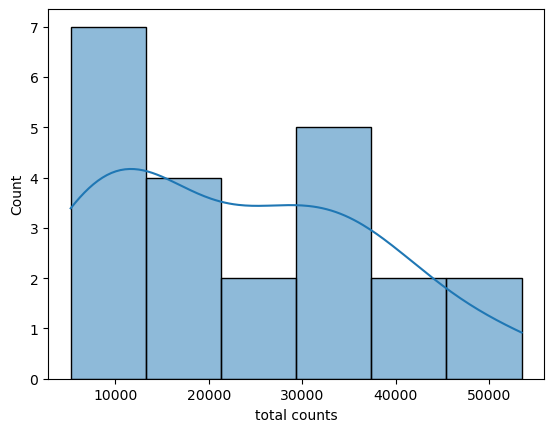

In [70]:
#frequency distribution of tag counts

df_plot=df18.loc[(df18['tags']!='id') & (df18['tags']!='uid'),:]
sb.histplot(data=df_plot, x='total counts',bins='auto',kde=True)

In [71]:
#list of tags for further analysis

column_keep=df18["tags"].tolist()
column_keep


['id',
 'uid',
 'name',
 'name:ru',
 'name:uk',
 'place',
 'name:en',
 'koatuu',
 'attribution',
 'population',
 'wikipedia',
 'wikipedia:ru',
 'name:prefix',
 'addr:postcode',
 'wikidata',
 'is_in',
 'highway',
 'amenity',
 'crossing',
 'postal_code',
 'opening_hours',
 'operator',
 'ref',
 'katotth']

In [72]:
df19=df17.loc[:,column_keep]
df19.head()

id       uid                        name  \
0  256613677  10857625  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ   
1  256613677  10857625  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ   
2  256613677  10857625  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ   
3  256613677  10857625  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ   
4  256613677  10857625  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ   

                      name:ru                     name:uk    place  \
0  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ                         NaN  village   
1  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ                         NaN  village   
2  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ                         NaN  village   
3  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ                         NaN  village   
4  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ  village   

        name:en      koatuu       attribution population  \
0           NaN  1410167601  travelgps.com.ua        NaN   
1           NaN  1410167601  travelgps.com.ua        NaN   
2           NaN  1410167601  travelgps.com.ua        NaN   
3           NaN  1410167601  travelgps.com.ua        NaN   
4  Pavlohradske  1410167601  travelgps.com.ua        359   

                       wikipedia                wikipedia:ru name:prefix  \
0                            NaN                         NaN         NaN   
1                            NaN                         NaN         NaN   
2                            NaN                         NaN         NaN   
3                            NaN                         NaN         NaN   
4  uk:ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÑŒÐºÐµ  ÐŸÐ°Ð²Ð»Ð¾Ð³Ñ€Ð°Ð´ÑÐºÐ¾Ðµ         NaN   

  addr:postcode wikidata    is_in highway amenity crossing postal_code  \
0           NaN      NaN  Ukraine     NaN     NaN      NaN         NaN   
1           NaN      NaN  Ukraine     NaN     NaN      NaN         NaN   
2           NaN      NaN  Ukraine     NaN     NaN      NaN         NaN   
3           NaN      NaN  Ukraine     NaN     NaN      NaN         NaN   
4         83491      NaN  Ukraine     NaN     NaN      NaN         NaN   

  opening_hours operator  ref katotth  
0           NaN      NaN  NaN     NaN  
1           NaN      NaN  NaN     NaN  
2           NaN      NaN  NaN     NaN  
3           NaN      NaN  NaN     NaN  
4           NaN      NaN  NaN     NaN

In [73]:
#calculating the frequency of unique values under each tags column

remove=['id','uid']

result_dict1 = {}
for column_name in df19.columns:
    if column_name not in remove:
        unique_value_counts = df19[column_name].value_counts()
        result_dict1[column_name] = unique_value_counts

sorted(result_dict1.items())

[('addr:postcode',
  87100              275
  86200              188
  85030              168
  85710              136
  85520              122
                    ... 
  71107                1
  52900 â€” 52904      1
  87515                1
  93400                1
  87552                1
  Name: addr:postcode, Length: 1012, dtype: int64),
 ('amenity',
  post_office         3806
  atm                 2325
  bank                1576
  fuel                 580
  pharmacy             530
                      ... 
  compressed_air         1
  shower                 1
  shop                   1
  charging_station       1
  dancing_school         1
  Name: amenity, Length: 74, dtype: int64),
 ('attribution',
  travelgps.com.ua                                 30206
  olenivka.net                                        32
  http://zakon5.rada.gov.ua/laws/show/1466-viii       16
  Name: attribution, dtype: int64),
 ('crossing',
  unmarked           5111
  uncontrolled       2739
  traffic_

In [74]:
#displayong the list of unique tags stored by each contributor 

uid_column_name = 'uid'
grouped = df19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
result_dict2 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].unique().apply(list)
        
        # Store the unique values in the result_dict with the column_name as the key
        result_dict2[column_name] = unique_values

In [75]:
#storing dictionary into table 
uniquetags=pd.DataFrame.from_dict(result_dict2)
uniquetags=uniquetags.drop(['id'],axis=1)
uniquetags.head()

name                        name:ru  \
uid                                                                    
6389    [Ð¡Ð»Ð¾Ð²â€™ÑÐ½ÑÑŒÐº, Ð¡...             [Ð¡Ð»Ð°Ð²ÑÐ½ÑÐº]   
22827             [nan, тер., 30, 69]                          [nan]   
71862                        [Бургер]                          [nan]   
147230                          [nan]                          [nan]   
161619  [Громової вулиця, Вулиця Г...  [nan, улица Громовой, Улиц...   

                              name:uk   place                        name:en  \
uid                                                                            
6389     [Ð¡Ð»Ð¾Ð²â€™ÑÐ½ÑÑŒÐº, nan]  [city]  [Sloviansk, nan, Slov'ians...   
22827                           [nan]   [nan]                          [nan]   
71862                           [nan]   [nan]                          [nan]   
147230                          [nan]   [nan]                          [nan]   
161619  [nan, Вулиця Громової, Тро...   [nan]  [nan, Hromovoi Street, Tro...   

              koatuu         attribution                     population  \
uid                                                                       
6389    [1414100000]  [travelgps.com.ua]  [138552, nan, 117100, 114437]   
22827          [nan]               [nan]                          [nan]   
71862          [nan]               [nan]                          [nan]   
147230         [nan]               [nan]                          [nan]   
161619         [nan]               [nan]                          [nan]   

                            wikipedia             wikipedia:ru  \
uid                                                              
6389    [uk:Ð¡Ð»Ð¾Ð²'ÑÐ½ÑÑŒÐº, nan]  [Ð¡Ð»Ð°Ð²ÑÐ½ÑÐº, nan]   
22827                           [nan]                    [nan]   
71862                           [nan]                    [nan]   
147230                          [nan]                    [nan]   
161619                          [nan]                    [nan]   

              name:prefix       addr:postcode       wikidata           is_in  \
uid                                                                            
6389    [nan, Ð¼Ñ–ÑÑ‚Ð¾]  [84100-84129, nan]  [nan, Q33581]  [Ukraine, nan]   
22827               [nan]               [nan]          [nan]           [nan]   
71862               [nan]               [nan]          [nan]           [nan]   
147230              [nan]               [nan]          [nan]           [nan]   
161619              [nan]               [nan]          [nan]           [nan]   

           highway           amenity crossing         postal_code  \
uid                                                                 
6389         [nan]             [nan]    [nan]  [nan, 84100-84129]   
22827        [nan]             [nan]    [nan]               [nan]   
71862        [nan]  [nan, fast_food]    [nan]               [nan]   
147230       [nan]             [nan]    [nan]               [nan]   
161619  [bus_stop]             [nan]    [nan]               [nan]   

       opening_hours operator    ref                     katotth  
uid                                                               
6389           [nan]    [nan]  [nan]  [nan, UA14120210010032554]  
22827          [nan]    [nan]  [nan]                       [nan]  
71862          [nan]    [nan]  [nan]                       [nan]  
147230         [nan]    [nan]  [nan]                       [nan]  
161619         [nan]    [nan]  [nan]                       [nan]

In [76]:
#count unique values for each of these tags that are added by contributors 
uid_column_name = 'uid'
result_dict = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Get the unique values for the current column within each group
        unique_values = grouped[column_name].unique()
        
        #  count the total number of unique values
        total_unique_count = len(set([item for sublist in unique_values for item in sublist]))
        
        # Store the total unique count in the result_dict with the column_name as the key
        result_dict[column_name] = total_unique_count

In [77]:
result_dict

{'id': 14935,
 'name': 3920,
 'name:ru': 3129,
 'name:uk': 2257,
 'place': 15,
 'name:en': 1943,
 'koatuu': 2007,
 'attribution': 4,
 'population': 1093,
 'wikipedia': 2876,
 'wikipedia:ru': 2153,
 'name:prefix': 13,
 'addr:postcode': 1013,
 'wikidata': 1945,
 'is_in': 8,
 'highway': 15,
 'amenity': 75,
 'crossing': 8,
 'postal_code': 871,
 'opening_hours': 420,
 'operator': 354,
 'ref': 453,
 'katotth': 1915}

In [78]:
# countinng the frequency of each tags added by each of the contributors 
#this will be further used to create contributor-base
grouped = df19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
result_dict3 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].nunique()
        
        # Store the unique values in the result_dict with the column_name as the key
        result_dict3[column_name] = unique_values

In [79]:
#converting the resulting dictionary into dataframe

contributor_base=pd.DataFrame.from_dict(result_dict3)
contributor_base.reset_index()
contributor_base=contributor_base.drop(['id'],axis=1)
contributor_base

name  name:ru  name:uk  place  name:en  koatuu  attribution  \
uid                                                                     
6389         3        1        1      1        3       1            1   
22827        3        0        0      0        0       0            0   
71862        1        0        0      0        0       0            0   
147230       0        0        0      0        0       0            0   
161619       7        7        5      0        6       0            0   
...        ...      ...      ...    ...      ...     ...          ...   
14920250     3        6        0      0        0       0            0   
14950764     0        0        0      0        0       0            0   
15001933    21        8        3      0        5       0            0   
15082595     2        2        1      0        1       0            0   
15092213    34        0        4      0        1       0            0   

          population  wikipedia  wikipedia:ru  name:prefix  addr:postcode  \
uid                                                                         
6389               3          1             1            1              1   
22827              0          0             0            0              0   
71862              0          0             0            0              0   
147230             0          0             0            0              0   
161619             0          0             0            0              0   
...              ...        ...           ...          ...            ...   
14920250           0          0             0            0              0   
14950764           0          0             0            0              0   
15001933           0          0             0            0              0   
15082595           0          0             0            0              0   
15092213           0          1             0            0              0   

          wikidata  is_in  highway  amenity  crossing  postal_code  \
uid                                                                  
6389             1      1        0        0         0            1   
22827            0      0        0        0         0            0   
71862            0      0        0        1         0            0   
147230           0      0        0        0         0            0   
161619           0      0        1        0         0            0   
...            ...    ...      ...      ...       ...          ...   
14920250         0      0        0        2         0            0   
14950764         0      0        0        0         0            0   
15001933         1      0        1        4         0            0   
15082595         0      0        0        1         0            0   
15092213         1      0        1        7         0            0   

          opening_hours  operator  ref  katotth  
uid                                              
6389                  0         0    0        1  
22827                 0         0    0        0  
71862                 0         0    0        0  
147230                0         0    0        0  
161619                0         0    0        0  
...                 ...       ...  ...      ...  
14920250              0         0    0        0  
14950764              0         0    0        0  
15001933              1         0    1        0  
15082595              2         2    1        0  
15092213              2         0    0        0  

[171 rows x 22 columns]

In [80]:
#creating user profile based on previously derived features of all contributors

contributor_base=timeframe1.merge(contributor_base, how='left',on='uid')

In [81]:
contributor_base=changesets.merge(contributor_base, how='left',on='uid')


In [82]:
contributor_base=version_list.merge(contributor_base, how='left',on='uid')
contributor_base['version'] = contributor_base['version'].str[:6]

In [83]:
contributor_base=contributor_base.merge(df_del.loc[:,'deleted nodes'], how='left',on='uid')

In [84]:
contributor_base=id_counts.merge(contributor_base, how='left',on='uid')

In [85]:
#final contributor_base that contributed during the 6 months before bombing

contributor_base.head(5)

uid   id contribution level                 version  new nodes  \
0    5359    6           inactive  [10, 9, 12, 15, 17, 7]          0   
1    6389    1           inactive                    [29]          0   
2   22827    1           inactive                     [8]          0   
3   71862   19           inactive      [2, 3, 3, 3, 3, 3]          2   
4  147230  259           inactive      [2, 2, 2, 2, 2, 2]        250   

   edited nodes  changeset active days  name  name:ru  name:uk  place  \
0             6        6.0      3 days   NaN      NaN      NaN    NaN   
1             1        1.0      1 days   3.0      1.0      1.0    1.0   
2             1        1.0      1 days   3.0      0.0      0.0    0.0   
3            17        3.0    146 days   1.0      0.0      0.0    0.0   
4             9        1.0      1 days   0.0      0.0      0.0    0.0   

   name:en  koatuu  attribution  population  wikipedia  wikipedia:ru  \
0      NaN     NaN          NaN         NaN        NaN           NaN   
1      3.0     1.0          1.0         3.0        1.0           1.0   
2      0.0     0.0          0.0         0.0        0.0           0.0   
3      0.0     0.0          0.0         0.0        0.0           0.0   
4      0.0     0.0          0.0         0.0        0.0           0.0   

   name:prefix  addr:postcode  wikidata  is_in  highway  amenity  crossing  \
0          NaN            NaN       NaN    NaN      NaN      NaN       NaN   
1          1.0            1.0       1.0    1.0      0.0      0.0       0.0   
2          0.0            0.0       0.0    0.0      0.0      0.0       0.0   
3          0.0            0.0       0.0    0.0      0.0      1.0       0.0   
4          0.0            0.0       0.0    0.0      0.0      0.0       0.0   

   postal_code  opening_hours  operator  ref  katotth  deleted nodes  
0          NaN            NaN       NaN  NaN      NaN            NaN  
1          1.0            0.0       0.0  0.0      1.0            NaN  
2          0.0            0.0       0.0  0.0      0.0            NaN  
3          0.0            0.0       0.0  0.0      0.0            3.0  
4          0.0            0.0       0.0  0.0      0.0            NaN

In [86]:
contributor_base

uid   id contribution level                 version  new nodes  \
0        5359    6           inactive  [10, 9, 12, 15, 17, 7]          0   
1        6389    1           inactive                    [29]          0   
2       22827    1           inactive                     [8]          0   
3       71862   19           inactive      [2, 3, 3, 3, 3, 3]          2   
4      147230  259           inactive      [2, 2, 2, 2, 2, 2]        250   
..        ...  ...                ...                     ...        ...   
246  14950764  352           inactive      [4, 4, 6, 9, 4, 3]        138   
247  15000002    1           inactive                     [1]          1   
248  15001933   50           inactive      [2, 2, 2, 2, 8, 2]         14   
249  15082595    2           inactive                 [10, 2]          0   
250  15092213   36           inactive      [6, 3, 4, 2, 1, 1]         32   

     edited nodes  changeset active days  name  name:ru  name:uk  place  \
0               6        6.0      3 days   NaN      NaN      NaN    NaN   
1               1        1.0      1 days   3.0      1.0      1.0    1.0   
2               1        1.0      1 days   3.0      0.0      0.0    0.0   
3              17        3.0    146 days   1.0      0.0      0.0    0.0   
4               9        1.0      1 days   0.0      0.0      0.0    0.0   
..            ...        ...         ...   ...      ...      ...    ...   
246           214        6.0      2 days   0.0      0.0      0.0    0.0   
247             0        1.0      1 days   NaN      NaN      NaN    NaN   
248            36        1.0      1 days  21.0      8.0      3.0    0.0   
249             2        1.0      1 days   2.0      2.0      1.0    0.0   
250             4        6.0      1 days  34.0      0.0      4.0    0.0   

     name:en  koatuu  attribution  population  wikipedia  wikipedia:ru  \
0        NaN     NaN          NaN         NaN        NaN           NaN   
1        3.0     1.0          1.0         3.0        1.0           1.0   
2        0.0     0.0          0.0         0.0        0.0           0.0   
3        0.0     0.0          0.0         0.0        0.0           0.0   
4        0.0     0.0          0.0         0.0        0.0           0.0   
..       ...     ...          ...         ...        ...           ...   
246      0.0     0.0          0.0         0.0        0.0           0.0   
247      NaN     NaN          NaN         NaN        NaN           NaN   
248      5.0     0.0          0.0         0.0        0.0           0.0   
249      1.0     0.0          0.0         0.0        0.0           0.0   
250      1.0     0.0          0.0         0.0        1.0           0.0   

     name:prefix  addr:postcode  wikidata  is_in  highway  amenity  crossing  \
0            NaN            NaN       NaN    NaN      NaN      NaN       NaN   
1            1.0            1.0       1.0    1.0      0.0      0.0       0.0   
2            0.0            0.0       0.0    0.0      0.0      0.0       0.0   
3            0.0            0.0       0.0    0.0      0.0      1.0       0.0   
4            0.0            0.0       0.0    0.0      0.0      0.0       0.0   
..           ...            ...       ...    ...      ...      ...       ...   
246          0.0            0.0       0.0    0.0      0.0      0.0       0.0   
247          NaN            NaN       NaN    NaN      NaN      NaN       NaN   
248          0.0            0.0       1.0    0.0      1.0      4.0       0.0   
249          0.0            0.0       0.0    0.0      0.0      1.0       0.0   
250          0.0            0.0       1.0    0.0      1.0      7.0       0.0   

     postal_code  opening_hours  operator  ref  katotth  deleted nodes  
0            NaN            NaN       NaN  NaN      NaN            NaN  
1            1.0            0.0       0.0  0.0      1.0            NaN  
2            0.0            0.0       0.0  0.0      0.0            NaN  
3            0.0            0.0       0.0  0.0      0.

In [87]:
uid_list=contributor_base['uid'].to_list()
print(len(uid_list)) #total contributors active before the event

251


## *Analysing location data for the 6 months period*

In [88]:
#fetching locations to analyse spatial data
donetsk3=donetsk_1.drop(['deleted','version','visibility','tp','extra'],axis=1)
donetsk3

id  changeset                  timestamp      uid       user  \
0       9258391776  113869515  2021-11-16 21:01:55+00:00  2769224   old wolf   
1       9260631685  113902306  2021-11-17 15:06:22+00:00  2769224   old wolf   
2       9261464845  113913275  2021-11-17 19:33:51+00:00  2769224   old wolf   
3       2071899205  110933868  2021-09-08 19:31:20+01:00  4119278  SmartFinn   
4       2071899205  111418211  2021-09-19 18:24:50+01:00  4119278  SmartFinn   
...            ...        ...                        ...      ...        ...   
512016  9238661080  113576558  2021-11-09 17:51:48+00:00  4119278  SmartFinn   
512017  9238661080  113870937  2021-11-16 21:46:42+00:00  4119278  SmartFinn   
512018  9246685433  113706739  2021-11-12 18:05:11+00:00  4119278  SmartFinn   
512019  9246685433  113870937  2021-11-16 21:46:42+00:00  4119278  SmartFinn   
512020  9247041358  113712896  2021-11-12 21:23:24+00:00  2769224   old wolf   

         latitude  longitude        date  
0       49.181996  36.688821  2021-11-16  
1       49.204371  36.690381  2021-11-17  
2       49.181970  36.685149  2021-11-17  
3       47.783135  37.245779  2021-09-08  
4       47.783135  37.245779  2021-09-19  
...           ...        ...         ...  
512016  47.756016  37.221712  2021-11-09  
512017  47.756016  37.221712  2021-11-16  
512018  47.750780  37.230248  2021-11-12  
512019  47.750780  37.230248  2021-11-16  
512020  49.063527  36.713271  2021-11-12  

[512021 rows x 8 columns]

In [89]:
# grouing by uid and calculating mean value of latitudes
df20=donetsk3.groupby(['uid'])['latitude'].mean()
df20=df20.reset_index()
df20

uid   latitude
0        5359  47.797778
1        6389  48.852269
2       22827  48.022700
3       71862  48.908872
4      147230  48.159781
..        ...        ...
247  14950764  48.685702
248  15000002  47.099763
249  15001933  48.044610
250  15082595  48.259249
251  15092213  48.051579

[252 rows x 2 columns]

In [90]:
# grouing by uid and calculating mean value of longitude

df21=donetsk3.groupby(['uid'])['longitude'].mean()
df21=df21.reset_index()
df20

uid   latitude
0        5359  47.797778
1        6389  48.852269
2       22827  48.022700
3       71862  48.908872
4      147230  48.159781
..        ...        ...
247  14950764  48.685702
248  15000002  47.099763
249  15001933  48.044610
250  15082595  48.259249
251  15092213  48.051579

[252 rows x 2 columns]

In [91]:
mean_loc=df20.merge(df21, on='uid')

In [92]:
#dataframe ontaining mean value of latitudes and longitudes mapped by individual contributors

mean_loc

uid   latitude  longitude
0        5359  47.797778  38.104285
1        6389  48.852269  37.605824
2       22827  48.022700  37.850075
3       71862  48.908872  37.824742
4      147230  48.159781  38.331349
..        ...        ...        ...
247  14950764  48.685702  38.086608
248  15000002  47.099763  37.545229
249  15001933  48.044610  38.484485
250  15082595  48.259249  36.727164
251  15092213  48.051579  38.138994

[252 rows x 3 columns]

In [93]:
#Finding the locations of the first node contributed by each user

df22=donetsk3.sort_values(['uid', 'date'], ascending=[True,True])
df22

id  changeset                  timestamp       uid       user  \
360544   337579873  114921348  2021-12-14 11:48:48+00:00      5359  user_5359   
394186   256615151  114921357  2021-12-14 11:49:00+00:00      5359  user_5359   
439509   256617401  114921363  2021-12-14 11:49:09+00:00      5359  user_5359   
439561   256617401  114929859  2021-12-14 15:46:20+00:00      5359  user_5359   
53063    256614001  114990375  2021-12-16 06:42:29+00:00      5359  user_5359   
...            ...        ...                        ...       ...        ...   
415266  9508335617  117445808  2022-02-15 17:45:41+00:00  15092213   allan789   
431281  9508268317  117444730  2022-02-15 17:11:15+00:00  15092213   allan789   
436504  9508159017  117442897  2022-02-15 16:16:17+00:00  15092213   allan789   
441107  9508331721  117445808  2022-02-15 17:45:49+00:00  15092213   allan789   
504157  9508331719  117445808  2022-02-15 17:45:41+00:00  15092213   allan789   

         latitude  longitude        date  
360544  48.927914  39.049751  2021-12-14  
394186  47.676279  37.411612  2021-12-14  
439509  47.056811  37.307819  2021-12-14  
439561  47.056811  37.307819  2021-12-14  
53063   48.064525  38.715219  2021-12-16  
...           ...        ...         ...  
415266  48.052236  38.140726  2022-02-15  
431281  48.049840  38.133961  2022-02-15  
436504  48.050913  38.142656  2022-02-15  
441107  48.055327  38.140840  2022-02-15  
504157  48.052331  38.140716  2022-02-15  

[512021 rows x 8 columns]

In [94]:
df23=df22.groupby('uid')

first_row= df23.first()
first_record=pd.DataFrame(first_row).reset_index()

In [95]:
first_record

uid          id  changeset                  timestamp         user  \
0        5359   337579873  114921348  2021-12-14 11:48:48+00:00    user_5359   
1        6389   256613986  117715077  2022-02-22 08:25:55+00:00  Jesús Gómez   
2       22827  1484161543  110409629  2021-08-29 13:10:05+01:00     ouleyang   
3       71862  1295820299  111362457  2021-09-18 07:35:00+01:00        ALu68   
4      147230  9237082662  113550099  2021-11-09 06:34:28+00:00       SQ9NIT   
..        ...         ...        ...                        ...          ...   
247  14950764  5599228759  117325846  2022-02-12 15:30:58+00:00    Vick_gyra   
248  15000002  9471821311  116968065  2022-02-03 14:50:47+00:00  skarbniza02   
249  15001933  9470074285  116939024  2022-02-02 22:56:23+00:00        JTJag   
250  15082595  2759186604  117378522  2022-02-14 06:45:47+00:00       AlexYO   
251  15092213  9508159019  117442897  2022-02-15 16:16:20+00:00     allan789   

      latitude  longitude        date  
0    48.927914  39.049751  2021-12-14  
1    48.852269  37.605824  2022-02-22  
2    48.022700  37.850075  2021-08-29  
3    48.036977  37.761117  2021-09-18  
4    48.150584  38.273368  2021-11-09  
..         ...        ...         ...  
247  48.691297  38.076916  2022-02-12  
248  47.099763  37.545229  2022-02-03  
249  48.050152  38.485275  2022-02-02  
250  48.259249  36.727164  2022-02-14  
251  48.051121  38.142207  2022-02-15  

[252 rows x 8 columns]

In [96]:
#finding the median value of the latitude and longitude contributed by each user


df25=donetsk3.groupby(['uid'])['latitude'].median()
df26=donetsk3.groupby(['uid'])['longitude'].median()

In [97]:
df25=df25.reset_index()
df26=df26.reset_index()
median_loc=df25.merge(df26, on='uid')

In [98]:
median_loc

uid   latitude  longitude
0        5359  47.840305  38.063415
1        6389  48.852269  37.605824
2       22827  48.022700  37.850075
3       71862  48.978965  37.820324
4      147230  48.162024  38.350770
..        ...        ...        ...
247  14950764  48.687765  38.080088
248  15000002  47.099763  37.545229
249  15001933  48.049631  38.484875
250  15082595  48.259249  36.727164
251  15092213  48.052073  38.140982

[252 rows x 3 columns]

### *Plotting all three measures of location data to understand the activity*

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib.colors import LinearSegmentedColormap

In [100]:
#plotting the location of first node created by each user using geopandas
crs={'init':'epsg:4326'}
geometry1=[Point(xy) for xy in zip(first_record["longitude"], first_record["latitude"])]

In [101]:
geodata1=gpd.GeoDataFrame(first_record,crs=crs, geometry=geometry1)

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

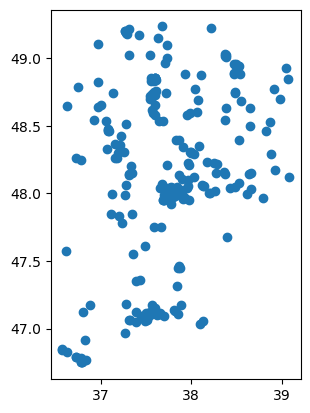

In [102]:
geodata1.plot()

In [103]:
#plotting the median value location of nodes created by each usercrs={'init':'epsg:4326'}
geometry2=[Point(xy) for xy in zip(median_loc["longitude"], median_loc["latitude"])]

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

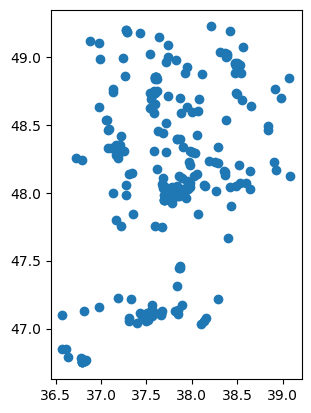

In [104]:
geodata2=gpd.GeoDataFrame(median_loc,crs=crs, geometry=geometry2)
geodata2.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

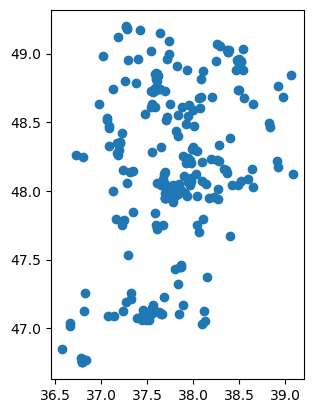

In [105]:
#plotting the mean value of locations

crs={'init':'epsg:4326'}
geometry3=[Point(xy) for xy in zip(mean_loc["longitude"], mean_loc["latitude"])]
geodata3=gpd.GeoDataFrame(mean_loc,crs=crs, geometry=geometry3)
geodata3.plot()

In [106]:
#importing shapefile of Ukraine

shapefile = gpd.read_file("C:/Users/Shruti/CST4090/ukr_admbnda_sspe_20230201_shp/ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm1_sspe_20230201.shp")

Text(0.5, 0.98, 'donetsk mapping pattern')

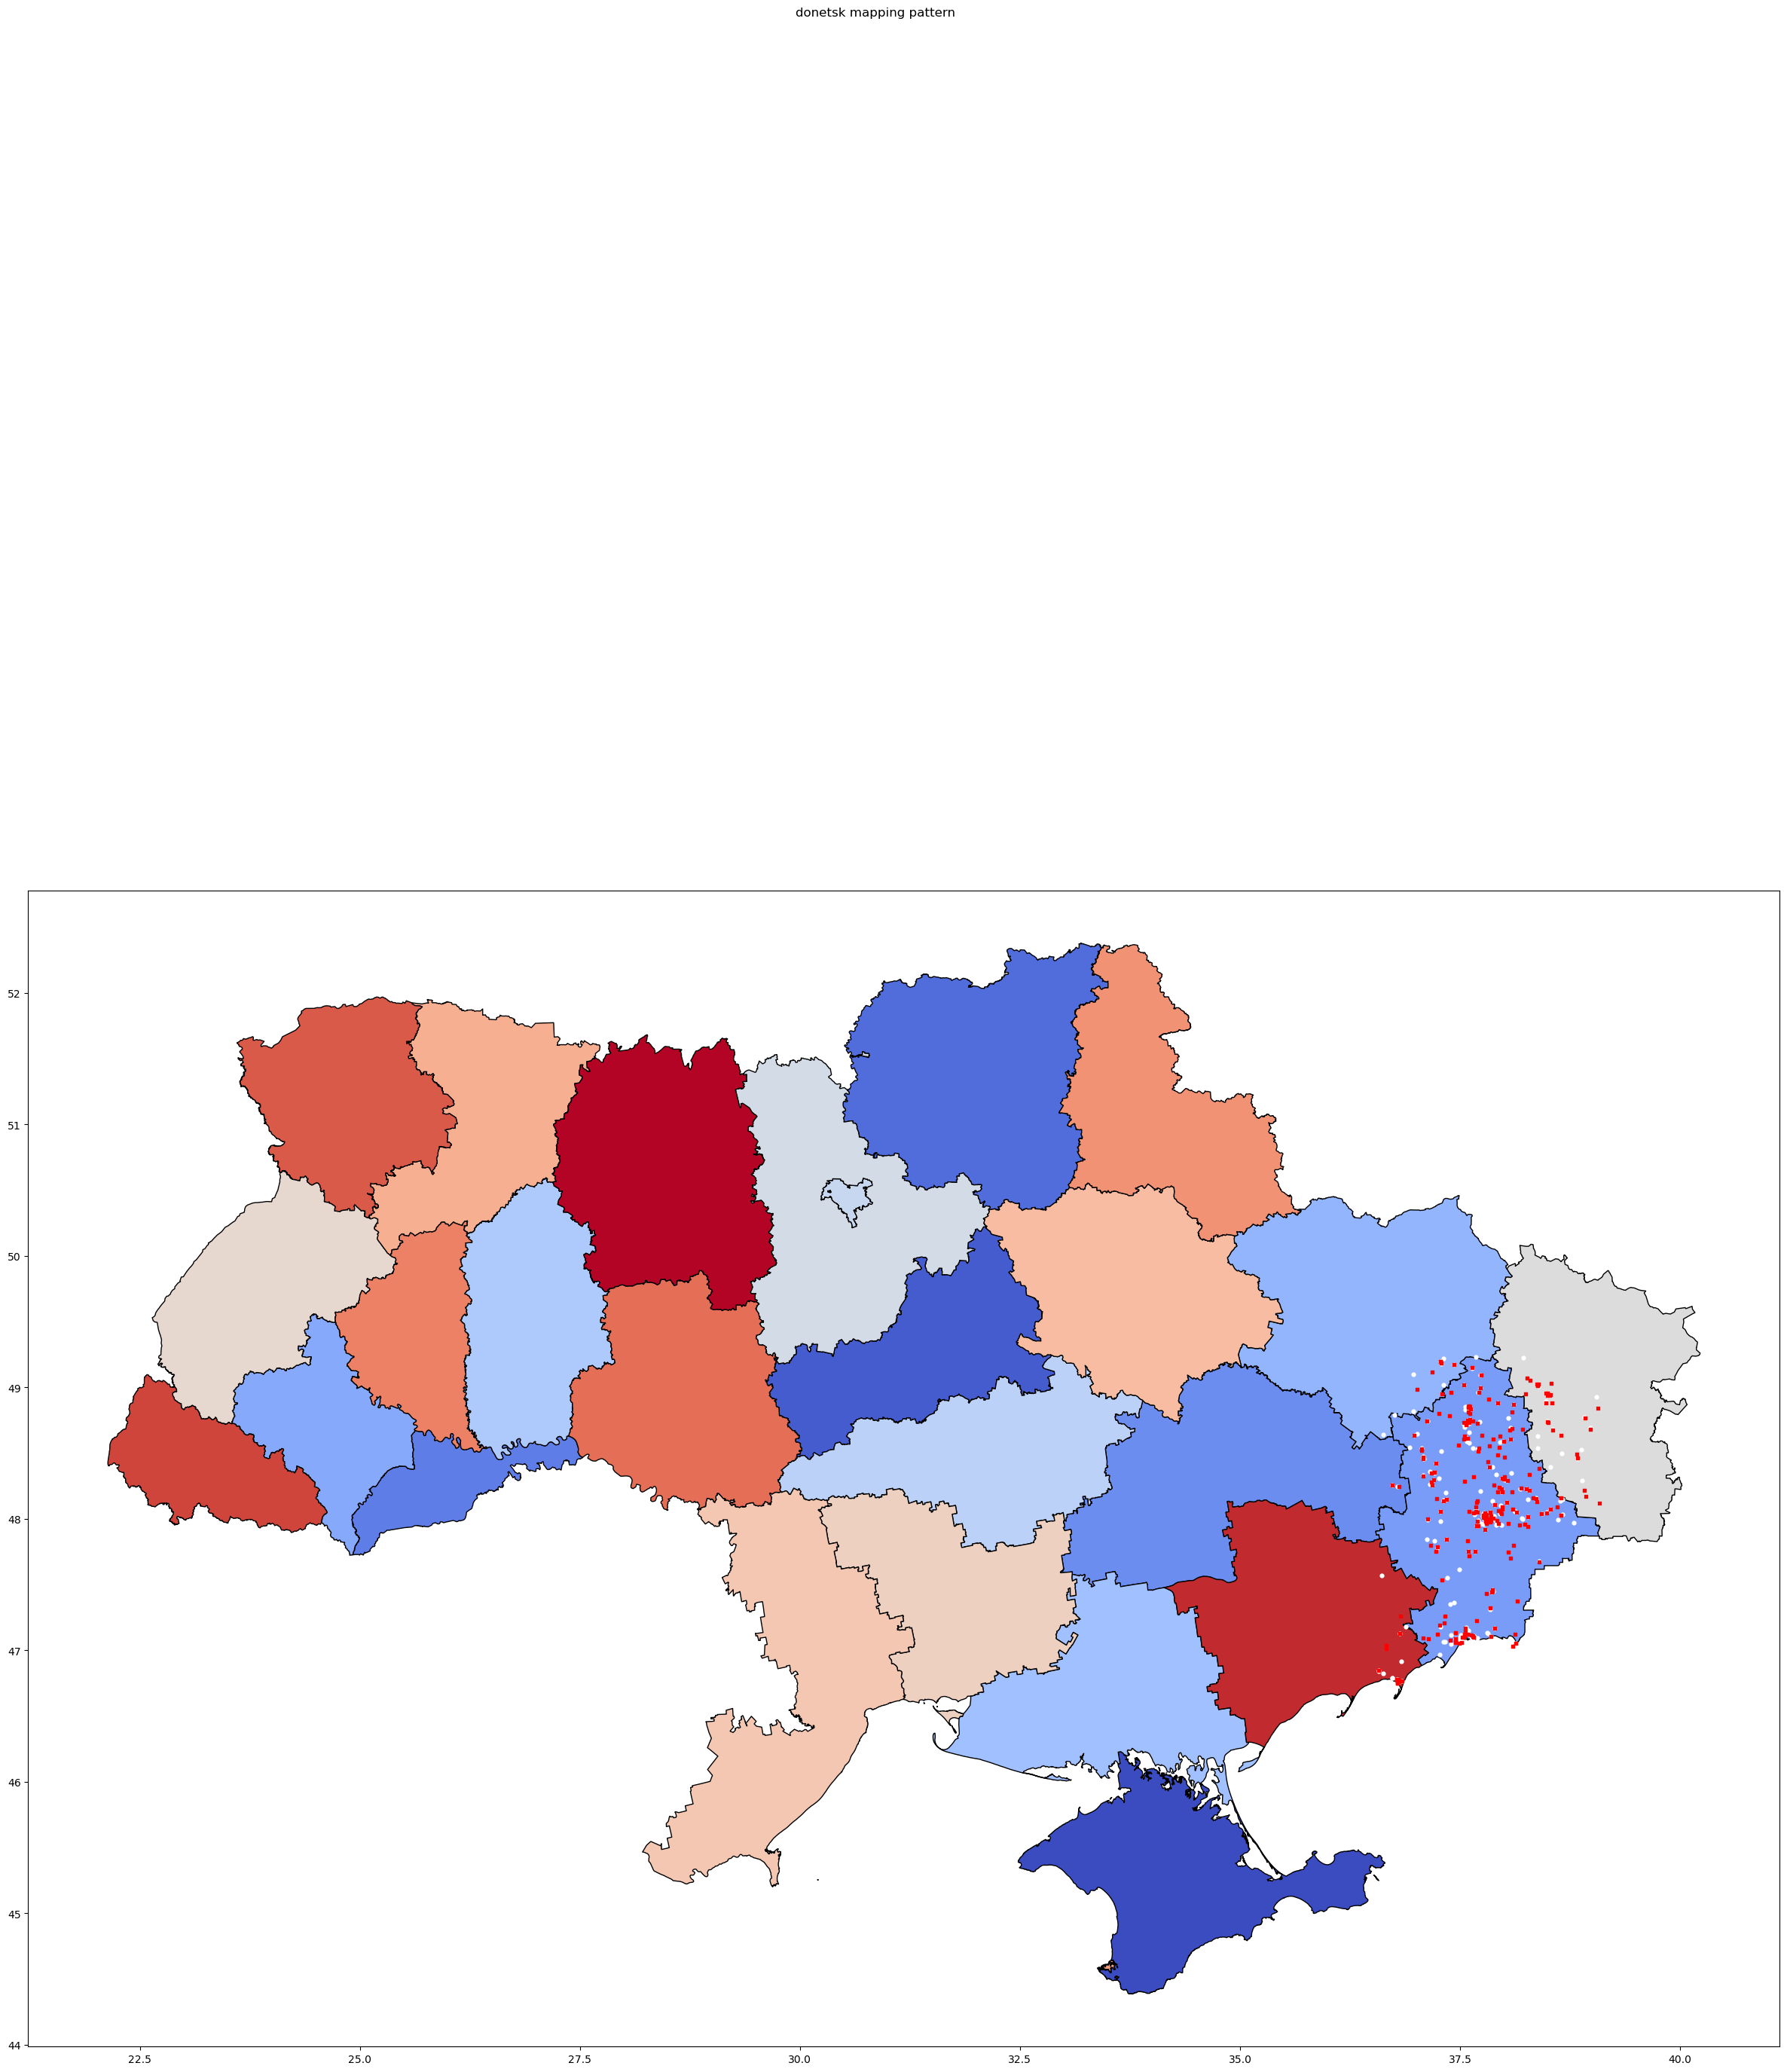

In [107]:
#creating plot with Ukraine's map  with locations of first node and mean point 


fig,ax = plt.subplots(figsize=(30, 40))


color = 'blue'

cmapblue = LinearSegmentedColormap.from_list('custom_cmap', [(0, color), (1, color)], N=256)
shapefile.plot(facecolor='white', edgecolor='k',alpha=1,linewidth=1,cmap='coolwarm',ax=ax)


g=geodata1.plot(ax=ax,color='white', marker='o',markersize=12,legend=True);
g=geodata3.plot(ax=ax,color='red',marker='s',markersize=12,legend=True);

fig.suptitle('donetsk mapping pattern', fontsize=12)


### *Analysing dispersion of mapping using Statistical measure*

In [108]:
import statistics as st
df27=donetsk3.loc[:,['uid','latitude','longitude']]
df27.head()

uid   latitude  longitude
0  2769224  49.181996  36.688821
1  2769224  49.204371  36.690381
2  2769224  49.181970  36.685149
3  4119278  47.783135  37.245779
4  4119278  47.783135  37.245779

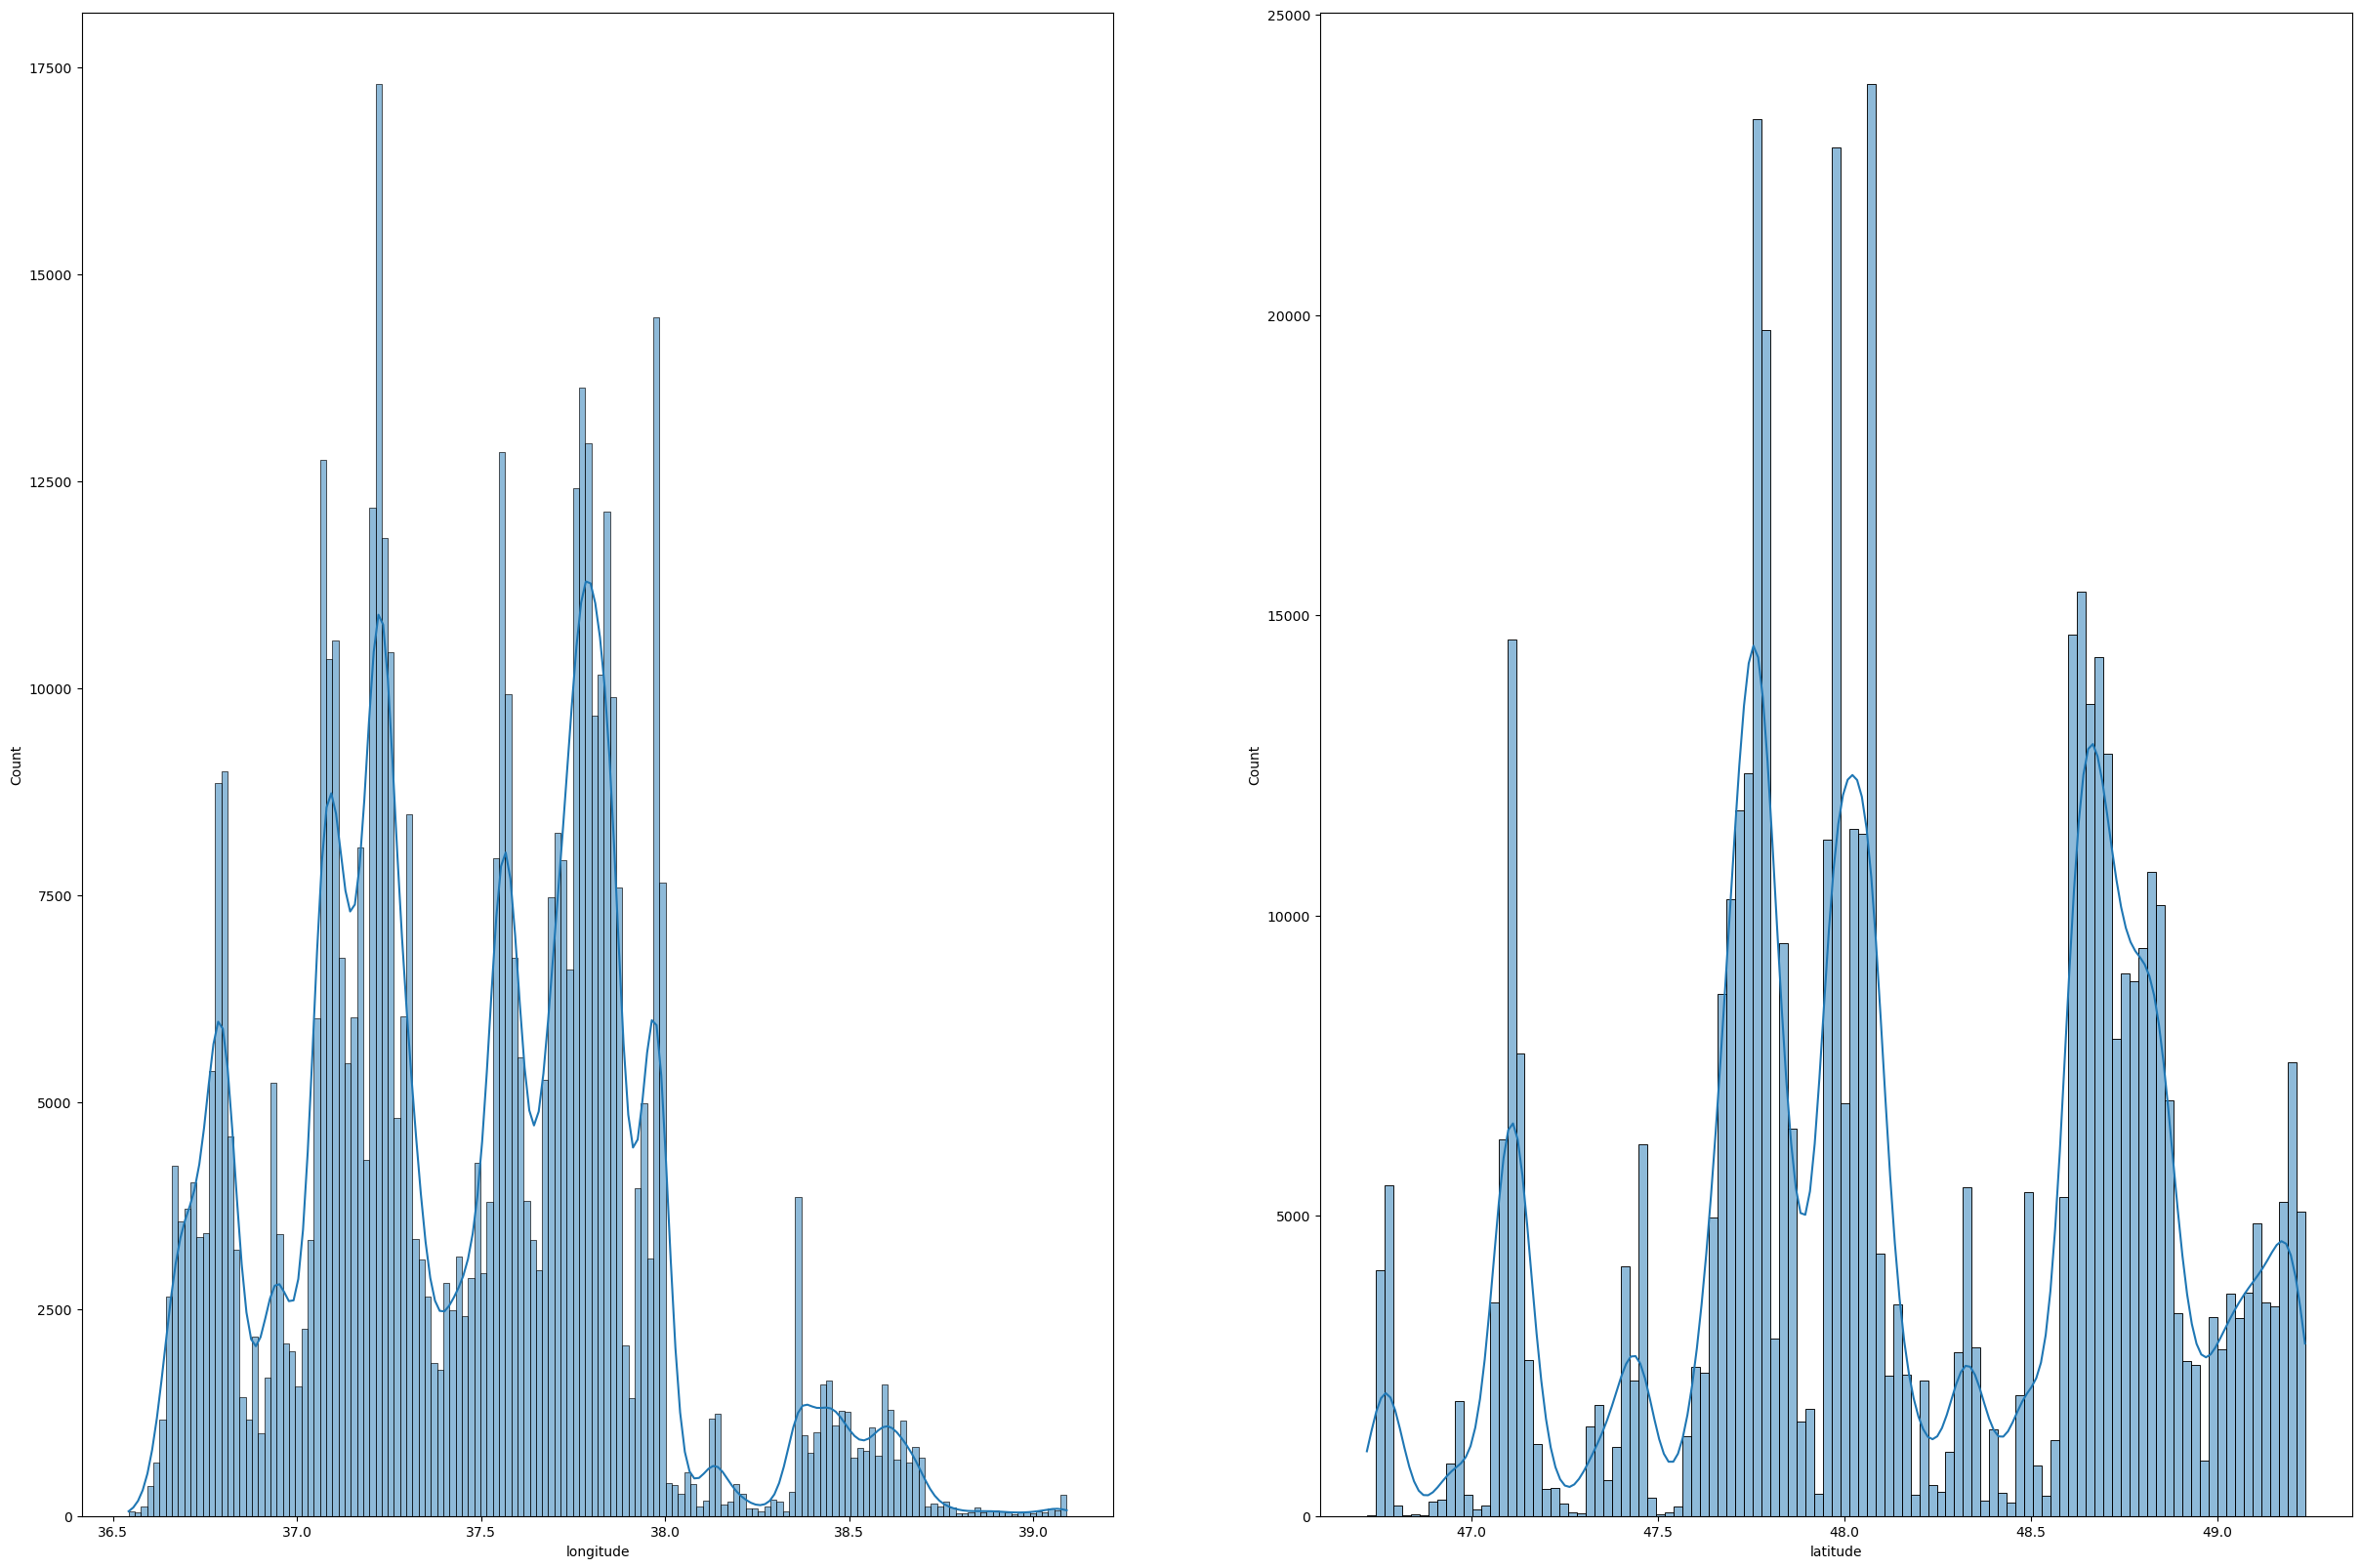

In [109]:
# frequency distribution of latitude and longitude measures

fig,axes= plt.subplots(1,2,figsize=(30, 20))

axes = axes.flatten()

s=sb.histplot(data=df27, x='longitude',bins='auto',kde=True,ax=axes[0])
s=sb.histplot(data=df27, x='latitude',bins='auto',kde=True,ax=axes[1])




In [110]:
#calculating standard deviation of complete dataset 

p_std_lat= st.pstdev(df27['latitude'])
p_std_lon= st.pstdev(df27['longitude'])


In [111]:
print('Population std for latitude: ',p_std_lat)
print('Population std for longitude: ',p_std_lon)

Population std for latitude:  0.6136758779260005
Population std for longitude:  0.45525346884488926


In [112]:
#calculating mean of each dataset

p_mean_lat=df27['latitude'].mean()
p_mean_lon=df27['longitude'].mean()

In [113]:
print('Population mean for latitude: ',p_mean_lat)
print('Population mean for latitude: ',p_mean_lon)

Population mean for latitude:  48.165754751180515
Population mean for latitude:  37.463474026324896


In [114]:
#calculation for Coefficient of variance to understand the variability in mapping

cv_lat=(p_std_lat/p_mean_lat)*100
cv_lon=(p_std_lon/p_mean_lon)*100
print('CV for latitude: ',cv_lat)
print('CV for longitude: ',cv_lon)

CV for latitude:  1.2740916883711029
CV for longitude:  1.215192879669918


In [115]:
#calculating std for each contributor group

df28=df27.groupby('uid').agg('std',numeric_only='True')
df28=df28.reset_index()

In [116]:
df28

uid  latitude  longitude
0        5359  0.707651   0.842306
1        6389       NaN        NaN
2       22827       NaN        NaN
3       71862  0.229146   0.036130
4      147230  0.008731   0.037922
..        ...       ...        ...
247  14950764  0.012480   0.020315
248  15000002       NaN        NaN
249  15001933  0.006600   0.002581
250  15082595  0.000000   0.000000
251  15092213  0.002956   0.006007

[252 rows x 3 columns]

In [117]:
df29=df28.merge(mean_loc,on='uid',how='left')

In [118]:
df29
df29= df29.rename(columns={'latitude_x': 'latitude'})
df29= df29.rename(columns={'longitude_x': 'longitude'})
df29= df29.rename(columns={'latitude_y': 'mean_lat'})
df29= df29.rename(columns={'longitude_y': 'mean_long'})
df29

uid  latitude  longitude   mean_lat  mean_long
0        5359  0.707651   0.842306  47.797778  38.104285
1        6389       NaN        NaN  48.852269  37.605824
2       22827       NaN        NaN  48.022700  37.850075
3       71862  0.229146   0.036130  48.908872  37.824742
4      147230  0.008731   0.037922  48.159781  38.331349
..        ...       ...        ...        ...        ...
247  14950764  0.012480   0.020315  48.685702  38.086608
248  15000002       NaN        NaN  47.099763  37.545229
249  15001933  0.006600   0.002581  48.044610  38.484485
250  15082595  0.000000   0.000000  48.259249  36.727164
251  15092213  0.002956   0.006007  48.051579  38.138994

[252 rows x 5 columns]

In [119]:
#calculation for CV applied to each group

df29['CV_lat']=(df29['latitude']/df29['mean_lat']*100)
df29

uid  latitude  longitude   mean_lat  mean_long    CV_lat
0        5359  0.707651   0.842306  47.797778  38.104285  1.480511
1        6389       NaN        NaN  48.852269  37.605824       NaN
2       22827       NaN        NaN  48.022700  37.850075       NaN
3       71862  0.229146   0.036130  48.908872  37.824742  0.468516
4      147230  0.008731   0.037922  48.159781  38.331349  0.018130
..        ...       ...        ...        ...        ...       ...
247  14950764  0.012480   0.020315  48.685702  38.086608  0.025634
248  15000002       NaN        NaN  47.099763  37.545229       NaN
249  15001933  0.006600   0.002581  48.044610  38.484485  0.013736
250  15082595  0.000000   0.000000  48.259249  36.727164  0.000000
251  15092213  0.002956   0.006007  48.051579  38.138994  0.006152

[252 rows x 6 columns]

In [120]:
df29['CV_lon']=(df29['longitude']/df29['mean_long'])*100
df29

uid  latitude  longitude   mean_lat  mean_long    CV_lat    CV_lon
0        5359  0.707651   0.842306  47.797778  38.104285  1.480511  2.210529
1        6389       NaN        NaN  48.852269  37.605824       NaN       NaN
2       22827       NaN        NaN  48.022700  37.850075       NaN       NaN
3       71862  0.229146   0.036130  48.908872  37.824742  0.468516  0.095520
4      147230  0.008731   0.037922  48.159781  38.331349  0.018130  0.098931
..        ...       ...        ...        ...        ...       ...       ...
247  14950764  0.012480   0.020315  48.685702  38.086608  0.025634  0.053338
248  15000002       NaN        NaN  47.099763  37.545229       NaN       NaN
249  15001933  0.006600   0.002581  48.044610  38.484485  0.013736  0.006708
250  15082595  0.000000   0.000000  48.259249  36.727164  0.000000  0.000000
251  15092213  0.002956   0.006007  48.051579  38.138994  0.006152  0.015750

[252 rows x 7 columns]

# Analysing OSM history data for donetsk Aftere the bombing

In [121]:
#querying postgres to fetch data of donetsk for the 6 months after the bombing 
query3 = "SELECT * FROM merged2 WHERE timestamp >=TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp <TO_DATE('2022-08-26','yyyy-mm-dd') AND latitude BETWEEN 46.6876770 AND 49.2339965 AND longitude BETWEEN 36.5419522 AND 39.0914413;"

In [122]:
#storing in a dataframe
donetsk_2 = pd.read_sql(query3, con=engine)
donetsk_2.head()

id  changeset deleted                  timestamp       uid  \
0  7938317989  118429450   false  2022-03-13 13:28:21+00:00  10184360   
1  7938317989  118429450   false  2022-03-13 13:28:21+00:00  10184360   
2  2314407993  124381757   false  2022-08-02 10:27:28+01:00   4119278   
3  2314407993  124381757   false  2022-08-02 10:27:28+01:00   4119278   
4  2314407993  124381757   false  2022-08-02 10:27:28+01:00   4119278   

        user  version visibility    tp   extra   latitude  longitude  
0     vootza        2       true  node   47734  47.963705  37.855260  
1     vootza        2       true  node   47734  47.963736  37.855251  
2  SmartFinn        3       true  node  116733  47.529892  37.551785  
3  SmartFinn        3       true  node  116733  47.529906  37.551820  
4  SmartFinn        3       true  node  116733  47.529899  37.551766

In [123]:
#removing duplicate columns 
donetsk_2=donetsk_2.drop_duplicates(subset=['id', 'changeset'],keep='first',ignore_index=True)
donetsk_2.head()

id  changeset deleted                  timestamp       uid  \
0  7938317989  118429450   false  2022-03-13 13:28:21+00:00  10184360   
1  2314407993  124381757   false  2022-08-02 10:27:28+01:00   4119278   
2  5488800432  120121280    true  2022-04-24 12:53:29+01:00   4192454   
3  5489046150  120129826   false  2022-04-24 16:54:57+01:00   4192454   
4  1930555458  119930110   false  2022-04-20 03:21:39+01:00   4192454   

        user  version visibility    tp   extra   latitude  longitude  
0     vootza        2       true  node   47734  47.963705  37.855260  
1  SmartFinn        3       true  node  116733  47.529892  37.551785  
2       dval        3      false  node  282194  48.987696  37.443798  
3       dval        2       true  node  288368  48.920826  37.502263  
4       dval        3       true  node  238879  49.019715  37.959987

In [124]:
#splitting date only from timestamp and adding to the daraframe
donetsk_2['date'] = donetsk_2.loc[:, 'timestamp'].astype(str).str.split().str[0]
donetsk_2

id  changeset deleted                  timestamp       uid  \
0       7938317989  118429450   false  2022-03-13 13:28:21+00:00  10184360   
1       2314407993  124381757   false  2022-08-02 10:27:28+01:00   4119278   
2       5488800432  120121280    true  2022-04-24 12:53:29+01:00   4192454   
3       5489046150  120129826   false  2022-04-24 16:54:57+01:00   4192454   
4       1930555458  119930110   false  2022-04-20 03:21:39+01:00   4192454   
...            ...        ...     ...                        ...       ...   
266207  9557618446  118154704   false  2022-03-06 11:24:19+00:00   4814295   
266208  9565695745  118272274   false  2022-03-09 10:24:28+00:00  10184360   
266209  9841097253  122751348   false  2022-06-23 11:07:59+01:00  12207058   
266210  9861268259  123101521   false  2022-07-01 22:18:05+01:00   4119278   
266211  9622388831  119088996   false  2022-03-29 22:19:12+01:00  13595839   

                  user  version visibility    tp   extra   latitude  \
0               vootza        2       true  node   47734  47.963705   
1            SmartFinn        3       true  node  116733  47.529892   
2                 dval        3      false  node  282194  48.987696   
3                 dval        2       true  node  288368  48.920826   
4                 dval        3       true  node  238879  49.019715   
...                ...      ...        ...   ...     ...        ...   
266207       Алекс Мок        1       true  node  172389  47.832424   
266208          vootza        1       true  node  211854  47.979026   
266209       iGansteRX        1       true  node  108678  48.054284   
266210       SmartFinn        1       true  node  200474  47.736598   
266211  Wouter De Jong        1       true  node  247200  48.000157   

        longitude        date  
0       37.855260  2022-03-13  
1       37.551785  2022-08-02  
2       37.443798  2022-04-24  
3       37.502263  2022-04-24  
4       37.959987  2022-04-20  
...           ...         ...  
266207  36.811028  2022-03-06  
266208  37.879721  2022-03-09  
266209  38.607354  2022-06-23  
266210  37.040355  2022-07-01  
266211  37.727088  2022-03-29  

[266212 rows x 13 columns]

### *Assigning Human and Bot categories to changesets*

In [125]:
#taking only useful columns
donetsk4=donetsk_2.drop(['latitude','longitude','extra'],axis=1)
donetsk4.head()

id  changeset deleted                  timestamp       uid  \
0  7938317989  118429450   false  2022-03-13 13:28:21+00:00  10184360   
1  2314407993  124381757   false  2022-08-02 10:27:28+01:00   4119278   
2  5488800432  120121280    true  2022-04-24 12:53:29+01:00   4192454   
3  5489046150  120129826   false  2022-04-24 16:54:57+01:00   4192454   
4  1930555458  119930110   false  2022-04-20 03:21:39+01:00   4192454   

        user  version visibility    tp        date  
0     vootza        2       true  node  2022-03-13  
1  SmartFinn        3       true  node  2022-08-02  
2       dval        3      false  node  2022-04-24  
3       dval        2       true  node  2022-04-24  
4       dval        3       true  node  2022-04-20

In [126]:
#counting number of edits in each changeset and then assigning a category [humna/bot] based on the counts
#for this classification, it is assumed that a changeset having more than 1000 edits in one time is contributed by automated script

db1=donetsk4.drop(['deleted','timestamp','uid','user','version','visibility','tp'],axis=1)
db1=db1.groupby(['date','changeset']).count()
db1

id
date       changeset    
2022-02-24 117800556   1
           117802960   1
           117803825  20
           117805273   1
           117805756   1
...                   ..
2022-08-24 125311716   2
           125318015   2
           125326657  18
           125326699  18
2022-08-25 125348694   9

[2638 rows x 1 columns]

In [127]:
db1['category']=db1['id'].apply(lambda x:'human' if x <1000 else 'bot')
db1

id category
date       changeset             
2022-02-24 117800556   1    human
           117802960   1    human
           117803825  20    human
           117805273   1    human
           117805756   1    human
...                   ..      ...
2022-08-24 125311716   2    human
           125318015   2    human
           125326657  18    human
           125326699  18    human
2022-08-25 125348694   9    human

[2638 rows x 2 columns]

In [128]:
#total changesets contribued by each -bot and human
db1.groupby(['category']).count()

id
category      
bot         35
human     2603

In [129]:
#adding category to the original dataframe 
donetsk4=donetsk4.merge(db1['category'], on='changeset', how='left')
donetsk4.head(7)

id  changeset deleted                  timestamp       uid  \
0  7938317989  118429450   false  2022-03-13 13:28:21+00:00  10184360   
1  2314407993  124381757   false  2022-08-02 10:27:28+01:00   4119278   
2  5488800432  120121280    true  2022-04-24 12:53:29+01:00   4192454   
3  5489046150  120129826   false  2022-04-24 16:54:57+01:00   4192454   
4  1930555458  119930110   false  2022-04-20 03:21:39+01:00   4192454   
5  9929571205  124436725   false  2022-08-03 14:13:05+01:00  12207058   
6  9932292819  124491342   false  2022-08-04 18:42:33+01:00   4119278   

        user  version visibility    tp        date category  
0     vootza        2       true  node  2022-03-13    human  
1  SmartFinn        3       true  node  2022-08-02    human  
2       dval        3      false  node  2022-04-24    human  
3       dval        2       true  node  2022-04-24    human  
4       dval        3       true  node  2022-04-20    human  
5  iGansteRX        1       true  node  2022-08-03    human  
6  SmartFinn        1       true  node  2022-08-04    human

### *Comparing the contribution done by Humans and Bots*

In [130]:
# date-wise grouping based on categories
db2=donetsk4.groupby(['date','category']).count()
db2.head(10)

id  changeset  deleted  timestamp   uid  user  version  \
date       category                                                             
2022-02-24 human      457        457      457        457   457   457      457   
2022-02-25 human       76         76       76         76    76    76       76   
2022-02-26 human     2119       2119     2119       2119  2119  2119     2119   
2022-02-27 human     1611       1611     1611       1611  1611  1611     1611   
2022-02-28 human        7          7        7          7     7     7        7   
2022-03-01 human      663        663      663        663   663   663      663   
2022-03-02 human      168        168      168        168   168   168      168   
2022-03-03 human       40         40       40         40    40    40       40   
2022-03-04 human        2          2        2          2     2     2        2   
2022-03-06 bot       3778       3778     3778       3778  3778  3778     3778   

                     visibility    tp  
date       category                    
2022-02-24 human            457   457  
2022-02-25 human             76    76  
2022-02-26 human           2119  2119  
2022-02-27 human           1611  1611  
2022-02-28 human              7     7  
2022-03-01 human            663   663  
2022-03-02 human            168   168  
2022-03-03 human             40    40  
2022-03-04 human              2     2  
2022-03-06 bot             3778  3778

In [131]:
#creating two sepearte datafarmes each having daily total contribution by human and bot respectively for the 6 months 
db3=db2.xs('human', level='category')
db4=db2.xs('bot', level='category')

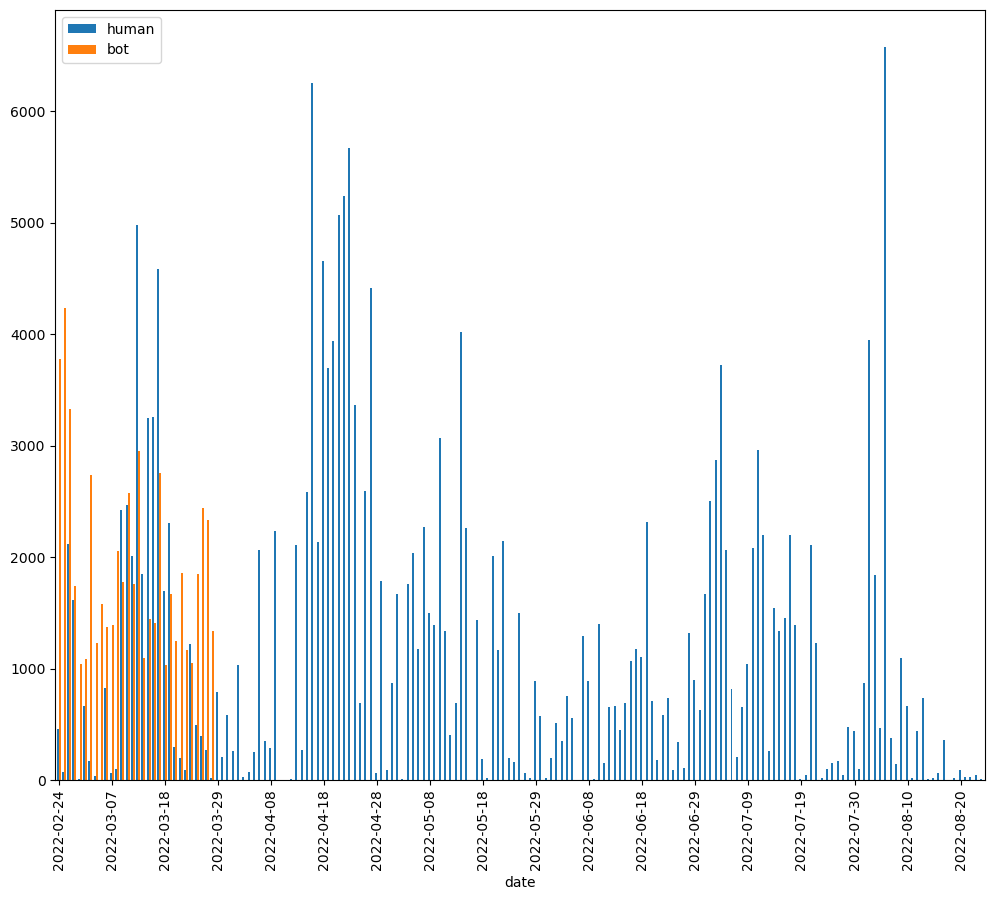

In [132]:
#plotting number of edits by both- human and bot category
db3=db3.reset_index()
db4=db4.reset_index()
x= db3['date']
y=db3['changeset']
z=db4['changeset']

db5 = pd.DataFrame({
    'date': x,
    'human': y,
    'bot':z
})
db5 = db5.reset_index(drop=True)

step_size = 10 
ax = db5.plot(x="date", y=["human", "bot"],width=0.75, kind="bar", rot=90,figsize=(12, 10))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()

# to set x-axis labels based on the step size
ax.set_xticks(x_ticks[::step_size])
ax.set_xticklabels(x_tick_labels[::step_size])

plt.show()



### *Analysis of data for 1 week after the bombing*

In [133]:
#counting number of ediits per day for this week and plotting on bar graph
db6= donetsk4.loc[(donetsk4['date']>='2022-02-24') & (donetsk4['date']<'2022-03-03'),:]
db6=db6.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db6=db6.groupby(['date']).count()
db6.head(3)

id
date            
2022-02-24   457
2022-02-25    76
2022-02-26  2119

In [134]:
#statistic measures of edits
db6.describe()

id
count     7.000000
mean    728.714286
std     821.662687
min       7.000000
25%     122.000000
50%     457.000000
75%    1137.000000
max    2119.000000

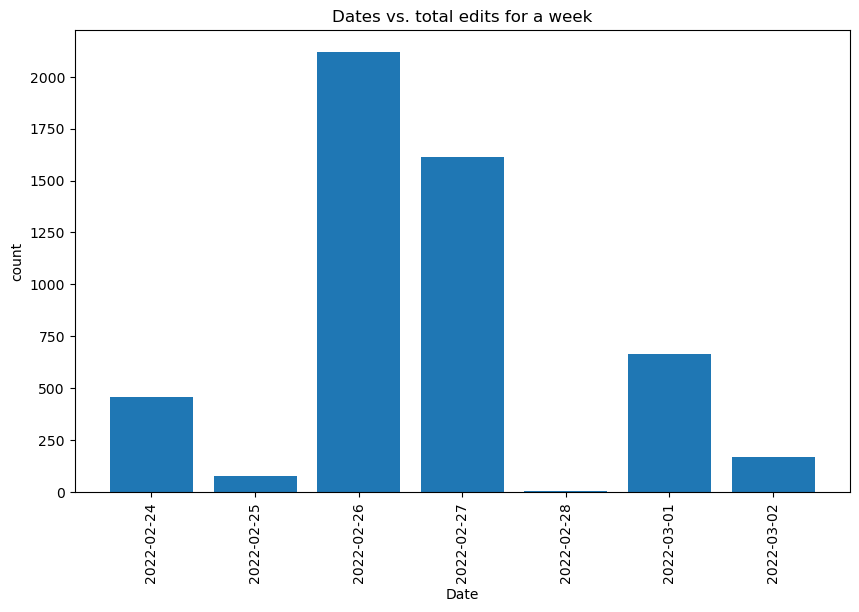

In [135]:
#using bar graph to plot the editing frequency

db6.index = pd.to_datetime(db6.index)
plt.figure(figsize=(10, 6))  
plt.bar(db6.index, db6['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a week')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the month after the bombing*

In [136]:
#counting number of ediits per day for 1 month and plotting on bar graph
db7= donetsk4.loc[(donetsk4['date']>='2022-02-24') & (donetsk4['date']<'2022-03-26'),:]
db7=db7.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db7=db7.groupby(['date']).count()
db7.head()

id
date            
2022-02-24   457
2022-02-25    76
2022-02-26  2119
2022-02-27  1611
2022-02-28     7

In [137]:
db7.describe() #statistic measures of edits

id
count    27.000000
mean   1862.814815
std    2029.367409
min       2.000000
25%     134.000000
50%    1611.000000
75%    2360.500000
max    6704.000000

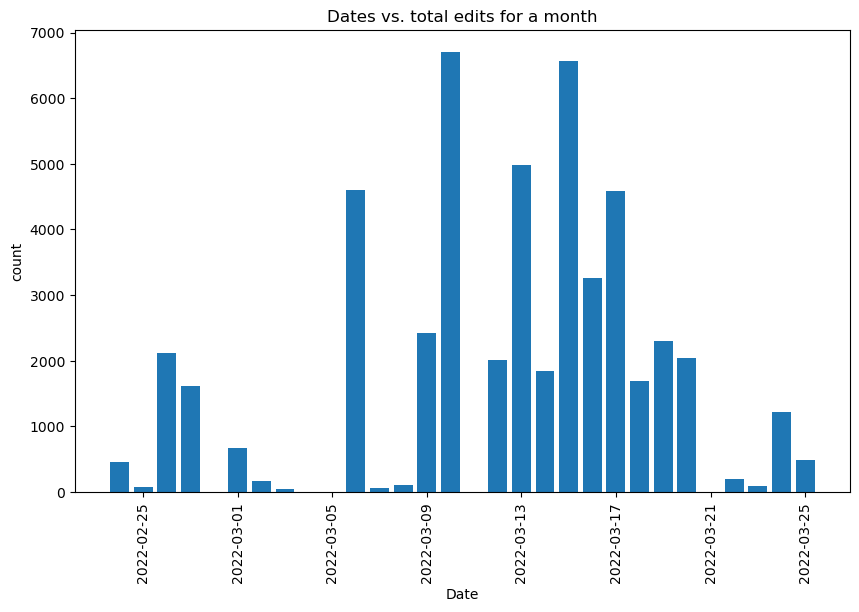

In [138]:
db7.index = pd.to_datetime(db7.index)
plt.figure(figsize=(10, 6))  
plt.bar(db7.index, db7['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a month')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 3 months after the bombing*

In [139]:
#counting number of ediits per day for the 3 months before bombing and plotting on bar graph
db8= donetsk4.loc[(donetsk4['date']>='2022-02-24') & (donetsk4['date']<'2022-05-26'),:]
db8=db8.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db8=db8.groupby(['date']).count()
db8.head()

id
date            
2022-02-24   457
2022-02-25    76
2022-02-26  2119
2022-02-27  1611
2022-02-28     7

In [140]:
db8.describe() #statistic measures of edits

id
count    87.000000
mean   1792.701149
std    1926.048522
min       1.000000
25%     202.500000
50%    1336.000000
75%    2360.500000
max    7978.000000

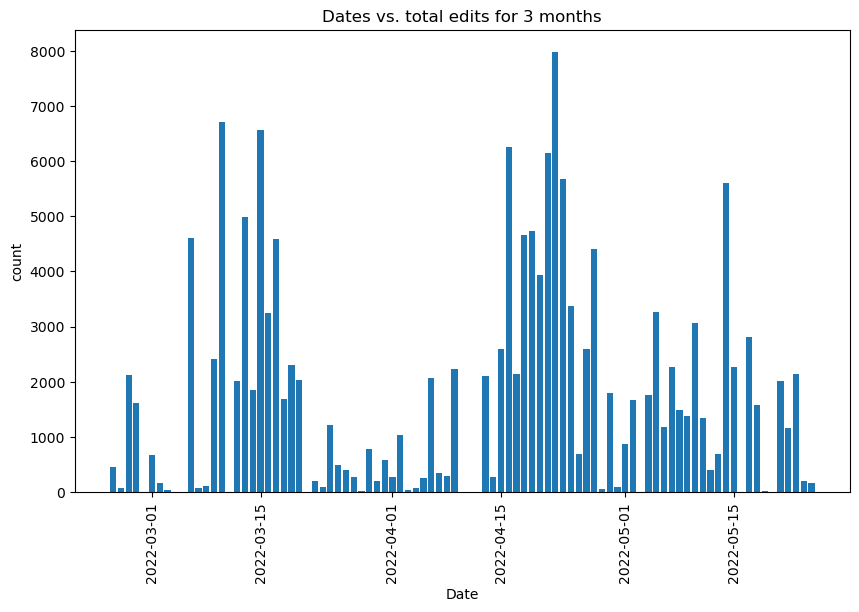

In [141]:
db8.index = pd.to_datetime(db8.index)
plt.figure(figsize=(10, 6))  
plt.bar(db8.index, db8['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for 3 months')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 6 months after the bombing*

In [142]:
#counting number of ediits per day for the 6 months after bombing and plotting on bar graph
db9=donetsk4.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db9=db9.groupby(['date']).count()
db9.describe()

id
count   176.000000
mean   1513.198864
std    1701.129238
min       1.000000
25%     173.750000
50%     895.500000
75%    2161.500000
max    7978.000000

In [143]:
#analysing frequency of edits for each month during these 6 months period
dbmar= donetsk4.loc[(donetsk4['date']>='2022-02-24') & (donetsk4['date']<'2022-03-26'),:]
dbmar=dbmar.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbmar=dbmar.groupby(['date']).count()
dbmar=dbmar.reset_index()

In [144]:
dbapr= donetsk4.loc[(donetsk4['date']>='2022-03-26') & (donetsk4['date']<'2022-04-26'),:]
dbapr=dbapr.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbapr=dbapr.groupby(['date']).count()
dbapr=dbapr.reset_index()

In [145]:
dbmay= donetsk4.loc[(donetsk4['date']>='2022-04-26') & (donetsk4['date']<'2022-05-26'),:]
dbmay=dbmay.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbmay=dbmay.groupby(['date']).count()
dbmay=dbmay.reset_index()

In [146]:
dbjun= donetsk4.loc[(donetsk4['date']>='2022-05-26') & (donetsk4['date']<'2022-06-26'),:]
dbjun=dbjun.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbjun=dbjun.groupby(['date']).count()
dbjun=dbjun.reset_index()

In [147]:
dbjul= donetsk4.loc[(donetsk4['date']>='2022-06-26') & (donetsk4['date']<'2022-07-26'),:]
dbjul=dbjul.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbjul=dbjul.groupby(['date']).count()
dbjul=dbjul.reset_index()


In [148]:
dbaug= donetsk4.loc[(donetsk4['date']>='2022-07-26') & (donetsk4['date']<'2022-08-26'),:]
dbaug=dbaug.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbaug=dbaug.groupby(['date']).count()
dbaug=dbaug.reset_index()


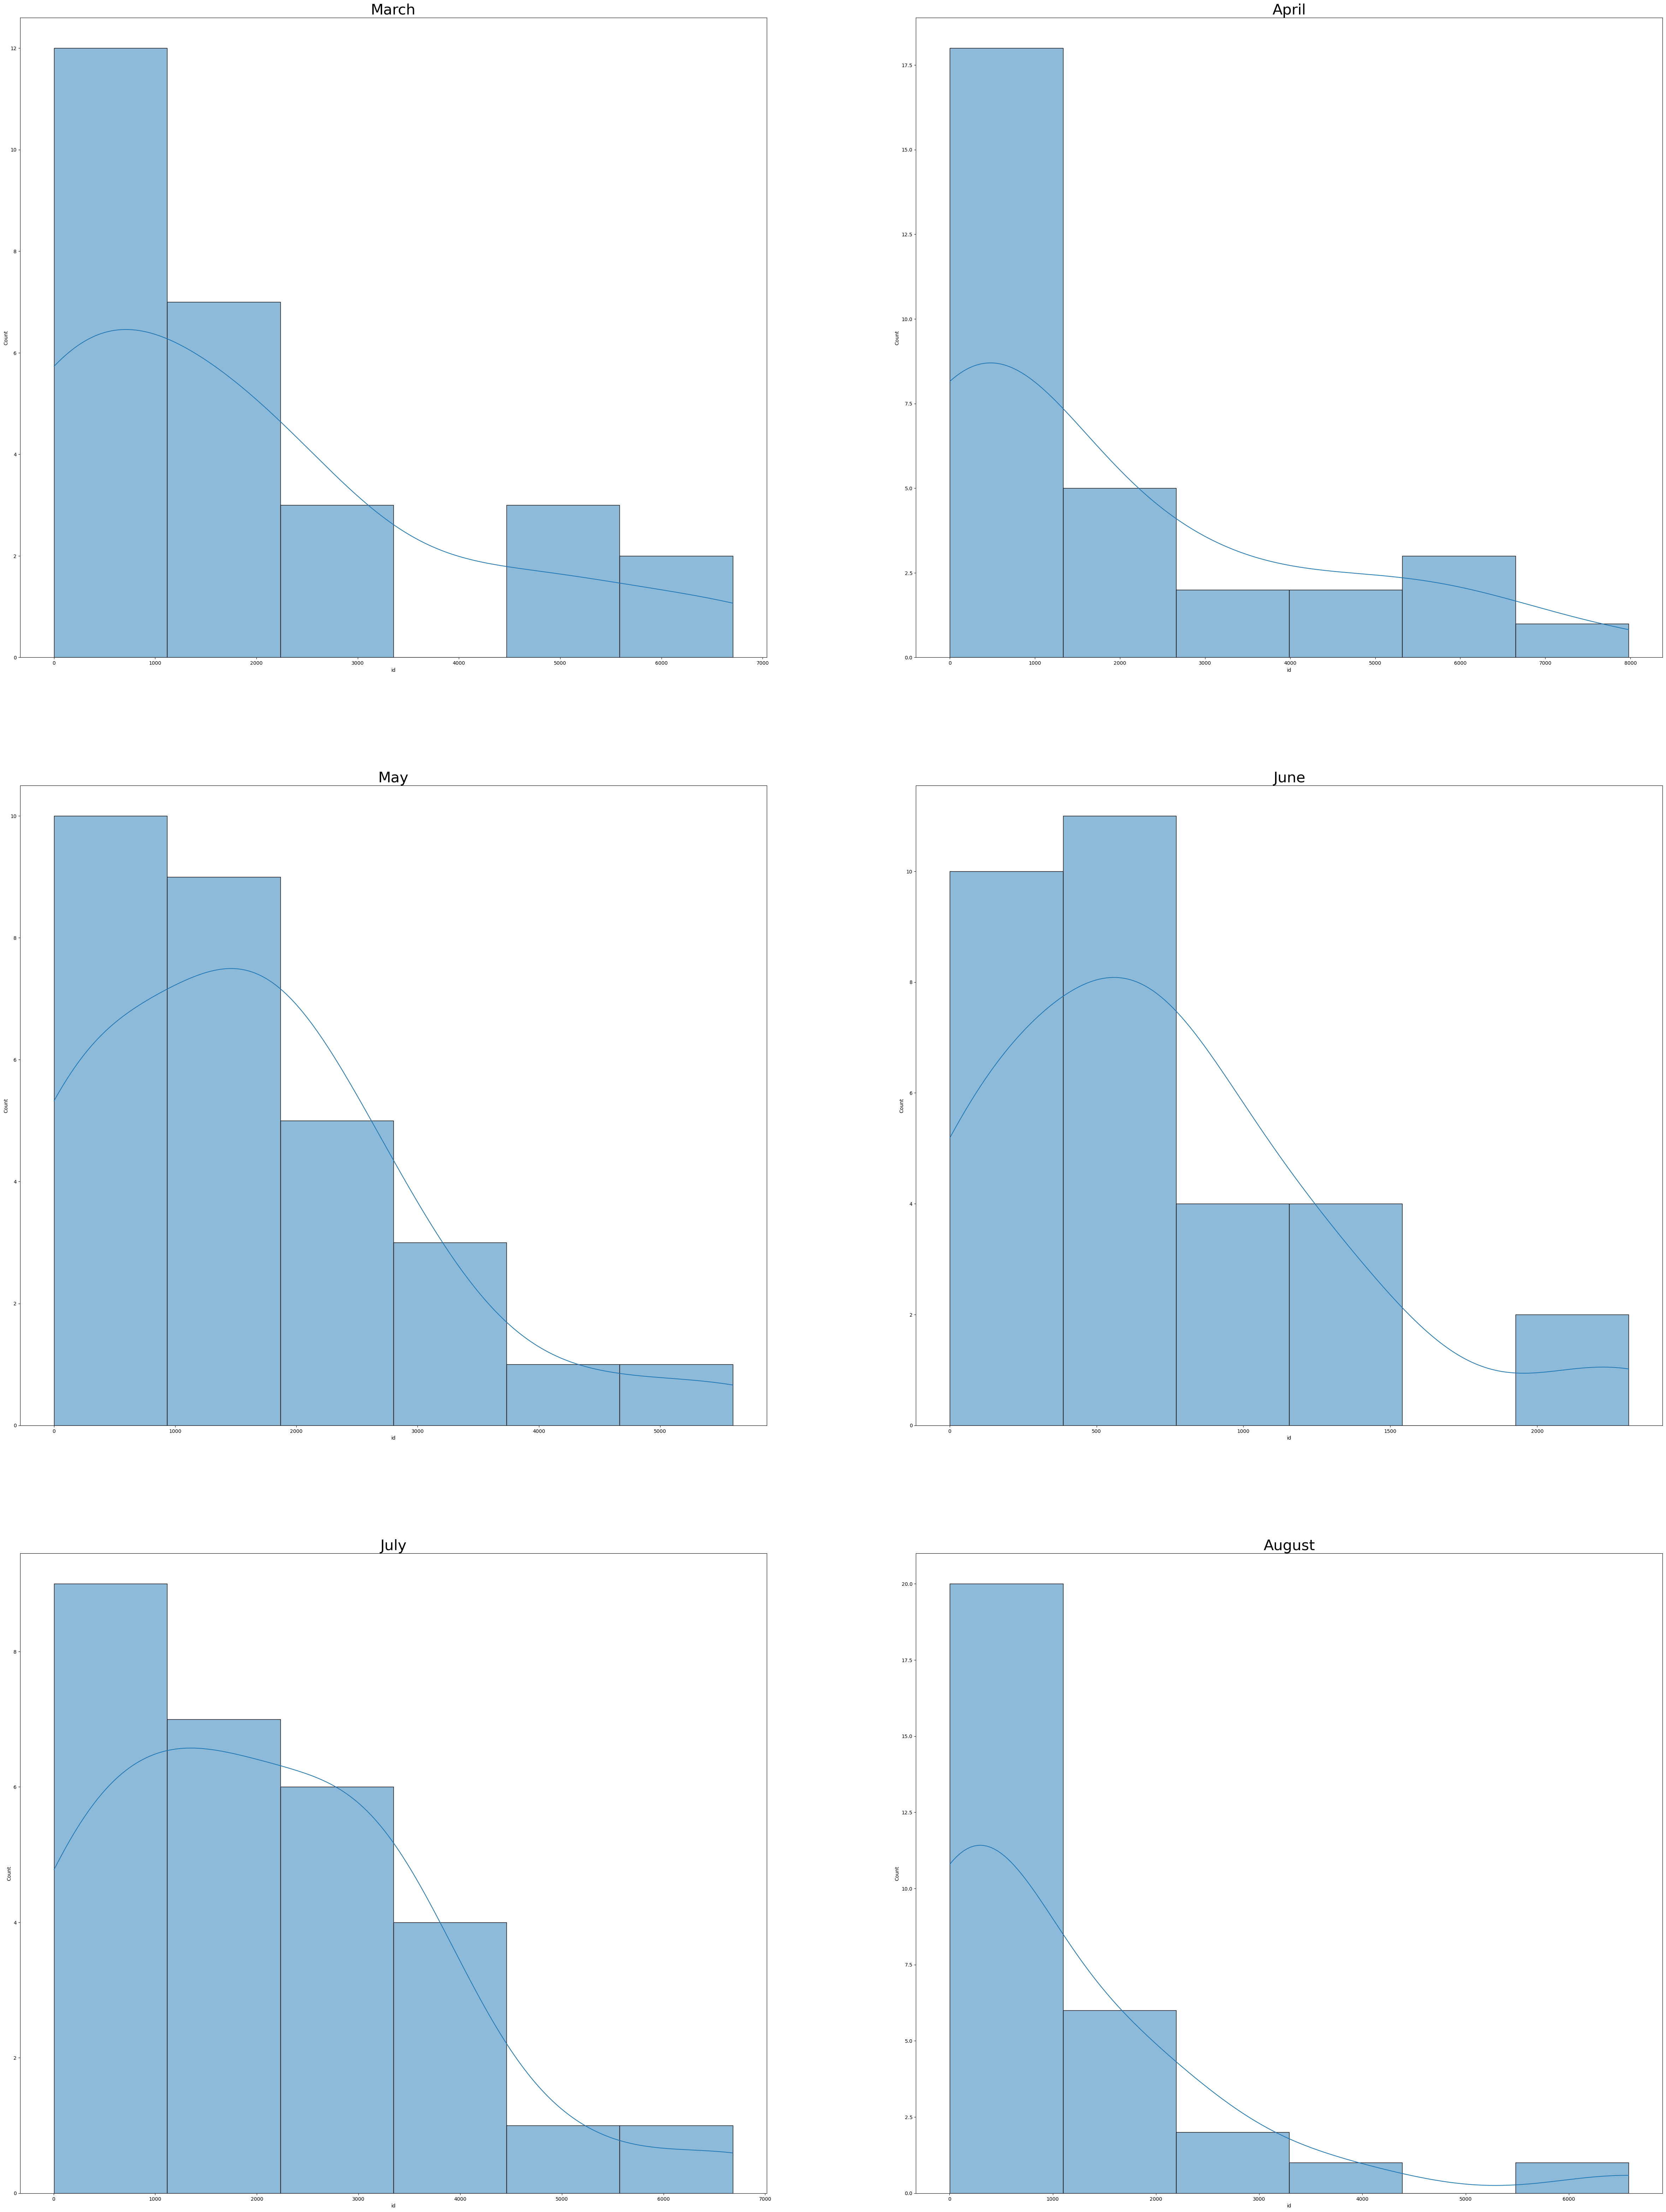

In [149]:
#histogram for frequency distributin 

fig,axes= plt.subplots(3,2,figsize=(60, 80))

axes = axes.flatten()

s=sb.histplot(data=dbmar, x='id',bins='auto',kde=True,ax=axes[0]).set_title('March',fontsize = 30)
s=sb.histplot(data=dbapr, x='id',bins='auto',kde=True,ax=axes[1]).set_title('April',fontsize = 30)
s=sb.histplot(data=dbmay, x='id',bins='auto',kde=True,ax=axes[2]).set_title('May',fontsize = 30)
s=sb.histplot(data=dbjun, x='id',bins='auto',kde=True,ax=axes[3]).set_title('June',fontsize = 30)
s=sb.histplot(data=dbjul, x='id',bins='auto',kde=True,ax=axes[4]).set_title('July',fontsize = 30)
s=sb.histplot(data=dbaug, x='id',bins='auto',kde=True,ax=axes[5]).set_title('August',fontsize = 30)

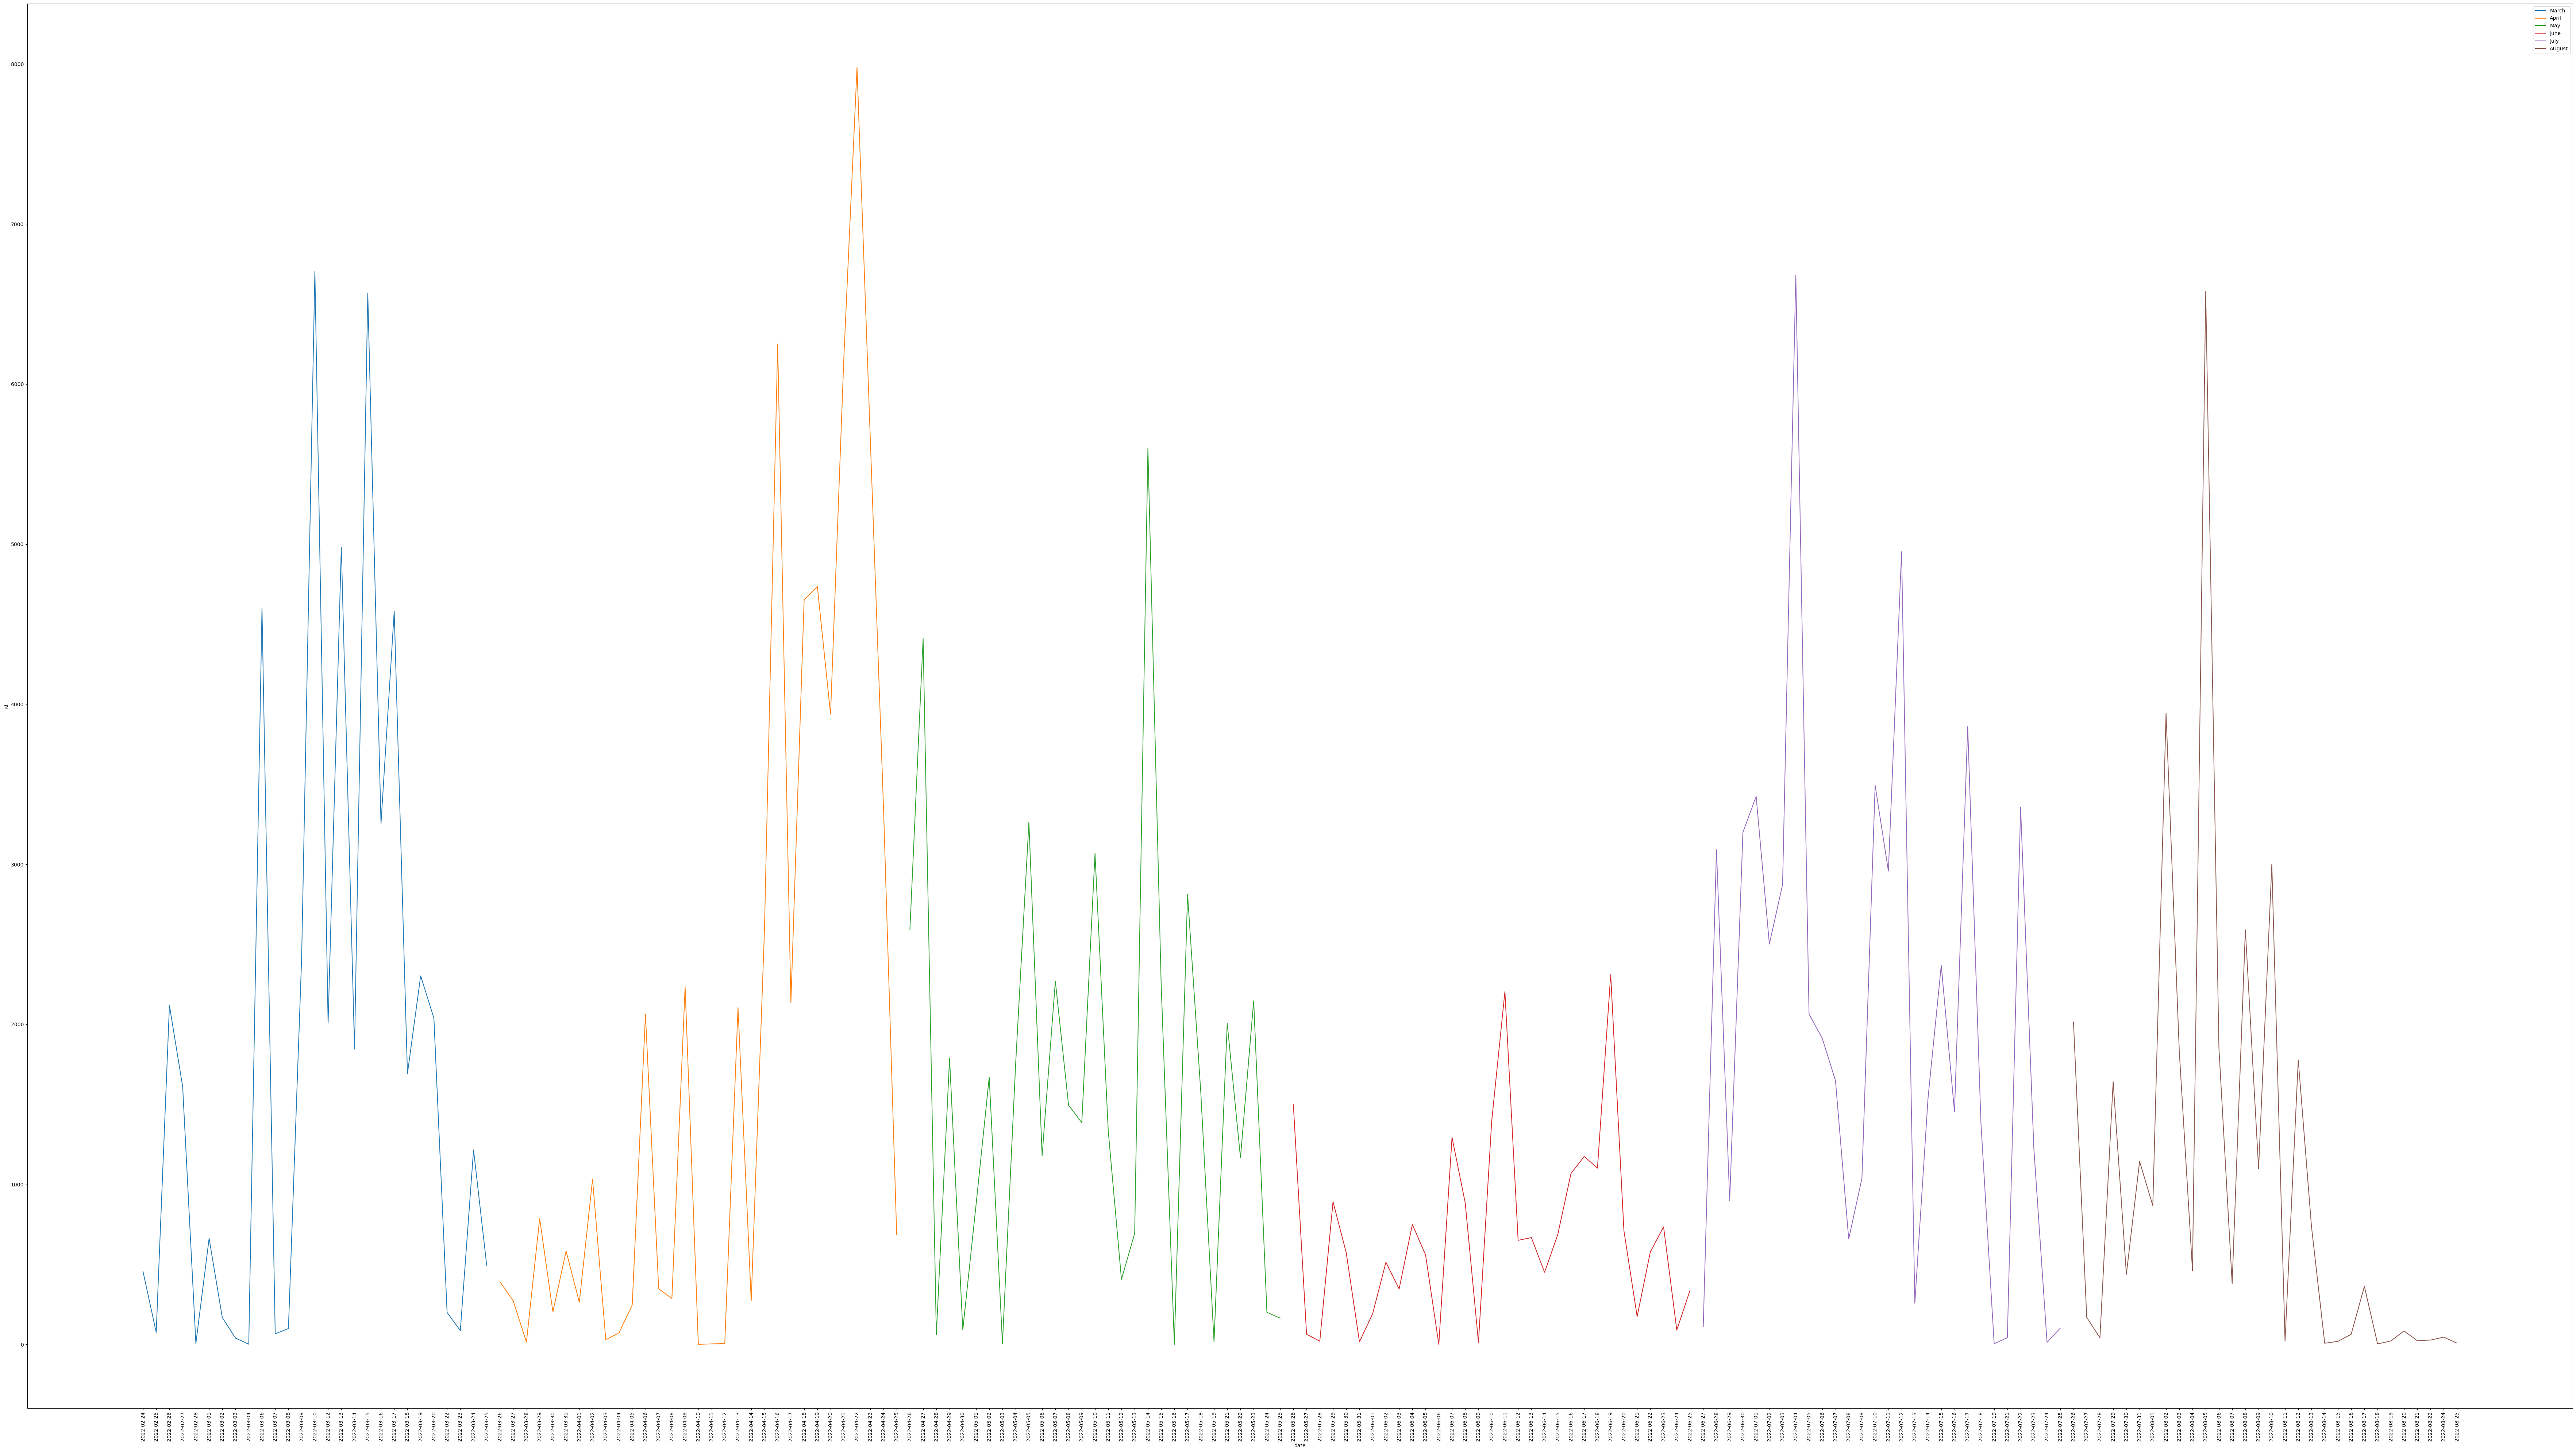

In [150]:
#trend chart to understand the editting pattern during 6 months befire bombing

fig = plt.subplots(figsize=(90, 50))
s=sb.lineplot(x='date', y='id', data=dbmar,label='March')
s=sb.lineplot(x='date', y='id', data=dbapr,label='April')
s=sb.lineplot(x='date', y='id', data=dbmay,label='May')
s=sb.lineplot(x='date', y='id', data=dbjun,label='June')
s=sb.lineplot(x='date', y='id', data=dbjul,label='July')
s=sb.lineplot(x='date', y='id', data=dbaug,label='AUgust')
plt.xticks(rotation=90)

plt.show()

### *Analysing editing frequency at contributor level*

In [151]:
#working on number of changesets and number of edits by each user during the 6 months

db10=donetsk4.loc[donetsk4['category']=='human']
db11=donetsk4.loc[donetsk4['category']=='bot']

db10=db10.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)
db11=db11.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)

In [152]:
#counting unique changesets added by each user during 6 months

db12=db10.groupby('uid')['changeset'].nunique()
db13=db11.groupby('uid')['changeset'].nunique()

In [153]:
#number of unique changesets posted by each contributors

changesets2 = db12.reset_index()
changesets2

uid  changeset
0         629          3
1        5359          2
2        6389          1
3       12054          1
4       15628          1
..        ...        ...
220  16829915          2
221  16830873          2
222  16838142          2
223  16878268          2
224  16891795          1

[225 rows x 2 columns]

In [154]:
#counting the changesets added bu software bots during the period
changesets_bot2= db13.reset_index()
changesets_bot2

uid  changeset
0   3758092          2
1   4119278         15
2   4814295          5
3  10184360          3
4  12207058         10

In [155]:

changesets_bot2['uid'].isin(changesets_bot2['uid']) #automated scripts were added by the same users as those listed in 'human' category 

0    True
1    True
2    True
3    True
4    True
Name: uid, dtype: bool

In [156]:
#grouping data on user and counting the total contribution made by each user during the whole period
db14=db10.drop(['changeset','category'],axis=1)
id_counts2=db14.groupby(['uid']).count()

id_counts2=id_counts2.reset_index()
id_counts2

uid   id
0         629  546
1        5359    5
2        6389    1
3       12054    2
4       15628    1
..        ...  ...
220  16829915    2
221  16830873    2
222  16838142    3
223  16878268    2
224  16891795    3

[225 rows x 2 columns]

In [157]:
# Grouping users based on total contribution using the values of 25% and 75% values of quantiles 

id_counts2['contribution level']=id_counts2['id'].apply(lambda x: 'inactive' if x < 2000 else ('casual mapper' if 2000 <= x < 6000 else 'committed'))

id_counts2.head()

uid   id contribution level
0    629  546           inactive
1   5359    5           inactive
2   6389    1           inactive
3  12054    2           inactive
4  15628    1           inactive

In [158]:
#count of contributors in each category

contribution2= id_counts2.drop('id', axis=1)

contribution2=contribution2.groupby('contribution level').count()

print(contribution2)

                    uid
contribution level     
casual mapper         7
committed             5
inactive            213


In [159]:
#adding contribution level to the dataframe 
temp=id_counts2.drop('id',axis=1)
temp=temp.set_index('uid')


donetsk4=donetsk4.merge(temp['contribution level'], on='uid', how='left')
donetsk4

id  changeset deleted                  timestamp       uid  \
0       7938317989  118429450   false  2022-03-13 13:28:21+00:00  10184360   
1       2314407993  124381757   false  2022-08-02 10:27:28+01:00   4119278   
2       5488800432  120121280    true  2022-04-24 12:53:29+01:00   4192454   
3       5489046150  120129826   false  2022-04-24 16:54:57+01:00   4192454   
4       1930555458  119930110   false  2022-04-20 03:21:39+01:00   4192454   
...            ...        ...     ...                        ...       ...   
266318  9557618446  118154704   false  2022-03-06 11:24:19+00:00   4814295   
266319  9565695745  118272274   false  2022-03-09 10:24:28+00:00  10184360   
266320  9841097253  122751348   false  2022-06-23 11:07:59+01:00  12207058   
266321  9861268259  123101521   false  2022-07-01 22:18:05+01:00   4119278   
266322  9622388831  119088996   false  2022-03-29 22:19:12+01:00  13595839   

                  user  version visibility    tp        date category  \
0               vootza        2       true  node  2022-03-13    human   
1            SmartFinn        3       true  node  2022-08-02    human   
2                 dval        3      false  node  2022-04-24    human   
3                 dval        2       true  node  2022-04-24    human   
4                 dval        3       true  node  2022-04-20    human   
...                ...      ...        ...   ...         ...      ...   
266318       Алекс Мок        1       true  node  2022-03-06      bot   
266319          vootza        1       true  node  2022-03-09    human   
266320       iGansteRX        1       true  node  2022-06-23    human   
266321       SmartFinn        1       true  node  2022-07-01      bot   
266322  Wouter De Jong        1       true  node  2022-03-29    human   

       contribution level  
0               committed  
1               committed  
2               committed  
3               committed  
4               committed  
...                   ...  
266318      casual mapper  
266319          committed  
266320          committed  
266321          committed  
266322           inactive  

[266323 rows x 12 columns]

In [160]:
#counting the number of deleted nodes for each user
df_deleted2=donetsk4.loc[:,['uid','deleted']]
df_deleted2=df_deleted2.groupby(['uid','deleted'])['deleted'].count()
df_del2=pd.DataFrame(df_deleted2)
df_del2= df_del2.rename(columns={'deleted': 'deleted nodes'})
df_del2=df_del2.reset_index()
df_del2=df_del2.loc[df_del2['deleted']=='true']


In [161]:
df_del2=df_del2.set_index('uid')
df_del2

deleted  deleted nodes
uid                            
43262       true             13
94578       true              3
162827      true             66
177389      true             65
204049      true             84
...          ...            ...
15836200    true             48
15862816    true            605
16262368    true              2
16276340    true             16
16442511    true              1

[85 rows x 2 columns]

### *Analysis of version history on contributor level*

In [162]:
#anaysing version history on contributor level
donetsk4=donetsk4.sort_values(['id', 'version'], ascending=[True,True])
donetsk4

id  changeset deleted                  timestamp      uid  \
103067    27882820  118937697   false  2022-03-26 08:30:46+00:00  2923836   
22721     27894050  118937697   false  2022-03-26 08:30:46+00:00  2923836   
33563     27913188  118937697    true  2022-03-26 08:30:46+00:00  2923836   
152745    27916025  118937697   false  2022-03-26 08:30:46+00:00  2923836   
175317    27924901  118937697   false  2022-03-26 08:30:46+00:00  2923836   
...            ...        ...     ...                        ...      ...   
92099   9975454325  125326699   false  2022-08-24 18:46:55+01:00   231017   
261662  9975454326  125326699   false  2022-08-24 18:46:55+01:00   231017   
179122  9975454327  125326699   false  2022-08-24 18:46:55+01:00   231017   
222506  9975454328  125326699   false  2022-08-24 18:46:55+01:00   231017   
213746  9975454329  125326699   false  2022-08-24 18:46:55+01:00   231017   

             user  version visibility    tp        date category  \
103067  VileGecko        6       true  node  2022-03-26    human   
22721   VileGecko        6       true  node  2022-03-26    human   
33563   VileGecko        6      false  node  2022-03-26    human   
152745  VileGecko        6       true  node  2022-03-26    human   
175317  VileGecko        6       true  node  2022-03-26    human   
...           ...      ...        ...   ...         ...      ...   
92099      swimdb        1       true  node  2022-08-24    human   
261662     swimdb        1       true  node  2022-08-24    human   
179122     swimdb        1       true  node  2022-08-24    human   
222506     swimdb        1       true  node  2022-08-24    human   
213746     swimdb        1       true  node  2022-08-24    human   

       contribution level  
103067           inactive  
22721            inactive  
33563            inactive  
152745           inactive  
175317           inactive  
...                   ...  
92099            inactive  
261662           inactive  
179122           inactive  
222506           inactive  
213746           inactive  

[266323 rows x 12 columns]

In [163]:
#Extract the list of editing version for each of the contributors 

version2=donetsk4.groupby('uid')['version'].apply(list)
version_list2=pd.DataFrame(version2)
version_list2.head()

version
uid                                 
629    [8, 3, 2, 2, 1, 1, 1, 1, 1...
5359                 [5, 2, 2, 2, 2]
6389                            [34]
12054                         [2, 2]
15628                           [12]

In [164]:
# This will count the number of new nodes vs number of edits 
# Function to count the frequency of new nodes(version=1) in a list


# Apply the functions to the 'version' column
version_list2['new nodes'] = version_list2['version'].apply(count_ones)
version_list2['edited nodes'] = version_list2['version'].apply(edits)                                                    
version_list2.head(16)

version  new nodes  edited nodes
uid                                                           
629     [8, 3, 2, 2, 1, 1, 1, 1, 1...        542             4
5359                  [5, 2, 2, 2, 2]          0             5
6389                             [34]          0             1
12054                          [2, 2]          0             2
15628                            [12]          0             1
26257                            [11]          0             1
39040   [1, 1, 1, 1, 2, 1, 1, 1, 1...         59             8
43262   [13, 21, 30, 3, 2, 2, 2, 2...          1            29
48157                 [2, 2, 1, 1, 1]          3             2
79602                    [40, 40, 35]          0             3
94578   [6, 5, 4, 7, 4, 16, 5, 8, ...          0          1949
95117   [8, 6, 8, 8, 8, 6, 6, 5, 9...          0           576
113813                           [41]          0             1
145231  [6, 6, 6, 7, 6, 6, 5, 7, 7...          0            65
162827  [14, 13, 9, 5, 3, 3, 4, 5,...       1385           338
177389  [15, 2, 2, 2, 2, 2, 2, 2, ...          0            65

### *Calculating the total active days for each user*

In [165]:
df_lifespan2= donetsk4.loc[:,['uid','date']]
df_lifespan2['date'] = df_lifespan2.date.astype('datetime64[ns]')
df_lifespan2=df_lifespan2.sort_values(['uid','date'],ascending=[True,True])
df_lifespan2

uid       date
55368        629 2022-06-10
127811       629 2022-06-10
116829       629 2022-06-10
175591       629 2022-06-10
201996       629 2022-06-10
...          ...        ...
174595  16878268 2022-08-19
57458   16878268 2022-08-19
176418  16891795 2022-08-20
61594   16891795 2022-08-20
240217  16891795 2022-08-20

[266323 rows x 2 columns]

In [166]:
 
df_lifespan2=df_lifespan2.groupby('uid')
first_row= df_lifespan2.min()
last_row=df_lifespan2.max()

timeframe_1=pd.DataFrame(first_row).reset_index()
timeframe_2=pd.DataFrame(last_row).reset_index()

# first day when the conributor made an activty
timeframe_1.head(10)

uid       date
0    629 2022-06-10
1   5359 2022-06-12
2   6389 2022-03-24
3  12054 2022-03-06
4  15628 2022-06-13
5  26257 2022-04-25
6  39040 2022-03-07
7  43262 2022-07-21
8  48157 2022-06-01
9  79602 2022-05-14

In [167]:
timeframe_2.head(10) # last day when the conributor made an activty

uid       date
0    629 2022-06-21
1   5359 2022-06-24
2   6389 2022-03-24
3  12054 2022-03-06
4  15628 2022-06-13
5  26257 2022-04-25
6  39040 2022-03-07
7  43262 2022-08-01
8  48157 2022-06-01
9  79602 2022-05-14

In [168]:
#calculating the difference between two dats

result=(timeframe_2['date']-timeframe_1['date'])
day=pd.to_timedelta(1, unit='d')
timeframe_1['active days']=result+day
timeframe_1=timeframe_1.drop(['date'],axis=1)
timeframe_1.head(6)

uid active days
0    629     12 days
1   5359     13 days
2   6389      1 days
3  12054      1 days
4  15628      1 days
5  26257      1 days

## *Importing and analysing tag data for the 6 months period*

In [169]:
#to fetch the tags data for all the nodes fetched in previous query for 6 months

query4 = "SELECT * FROM node_tags WHERE id IN (SELECT id FROM user_info WHERE id IN (SELECT id FROM node_locations WHERE latitude BETWEEN 46.6876770 AND 49.2339965 AND longitude BETWEEN 36.5419522 AND 39.0914413) AND timestamp >=TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp <TO_DATE('2022-08-26','yyyy-mm-dd'));"

In [170]:
donetsk5 = pd.read_sql(query4, con=engine)

In [171]:
pd.set_option('max_colwidth', None)
donetsk5

id                                        tags
0         27913188  {'created_by': 'shp2osm', 'source': 'PGS'}
1         27913188                           {'source': 'PGS'}
2         27913188                           {'source': 'PGS'}
3         27913188                           {'source': 'PGS'}
4         27913188                                          {}
...            ...                                         ...
362937  6447379238                                          {}
362938  6454051354                                          {}
362939  6454051354                                          {}
362940  6454051356                                          {}
362941  6454051356                                          {}

[362942 rows x 2 columns]

In [172]:
#count of empty tags

db15=donetsk5[donetsk5['tags']=='{}'].count()
db15

id      340628
tags    340628
dtype: int64

In [173]:
#only taking the records having non-null values in tags

db15=donetsk5[donetsk5['tags']!='{}']

db15

id  \
0         27913188   
1         27913188   
2         27913188   
3         27913188   
5         70954313   
...            ...   
362875  6213648891   
362878  6265284187   
362879  6265284187   
362915  6345232809   
362916  6345232809   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         tags  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  {'created_by': 'shp2osm', 'source': 'PGS'}  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           {'source': 'PGS'}  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           {'source': 'PGS'}  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           {'source': 'PGS'}  
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      {'created_by': 'JOSM'}  
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [174]:
# append the tags column to previous dataframe having user details 
pd.set_option('max_colwidth', 30)
db16=db15.merge(donetsk4, on='id', how='left')
db16

id                           tags  changeset deleted  \
0        27913188  {'created_by': 'shp2osm', ...  118937697    true   
1        27913188              {'source': 'PGS'}  118937697    true   
2        27913188              {'source': 'PGS'}  118937697    true   
3        27913188              {'source': 'PGS'}  118937697    true   
4        70954313         {'created_by': 'JOSM'}  121478692   false   
...           ...                            ...        ...     ...   
29370  6213648891              {'power': 'pole'}  121312202   false   
29371  6265284187  {'addr:housenumber': '59',...  117996245   false   
29372  6265284187  {'addr:housenumber': '59',...  117996245   false   
29373  6345232809  {'addr:housenumber': '20',...  124727690   false   
29374  6345232809  {'addr:housenumber': '20',...  124727690   false   

                       timestamp      uid        user  version visibility  \
0      2022-03-26 08:30:46+00:00  2923836   VileGecko        6      false   
1      2022-03-26 08:30:46+00:00  2923836   VileGecko        6      false   
2      2022-03-26 08:30:46+00:00  2923836   VileGecko        6      false   
3      2022-03-26 08:30:46+00:00  2923836   VileGecko        6      false   
4      2022-05-25 15:23:31+01:00  2877744  gektor1488       24       true   
...                          ...      ...         ...      ...        ...   
29370  2022-05-22 11:20:50+01:00  1538111   avinet_ua        2       true   
29371  2022-03-01 21:53:18+00:00   224440         Syl        2       true   
29372  2022-03-01 21:53:18+00:00   224440         Syl        2       true   
29373  2022-08-10 12:51:54+01:00  4119278   SmartFinn        2       true   
29374  2022-08-10 12:51:54+01:00  4119278   SmartFinn        2       true   

         tp        date category contribution level  
0      node  2022-03-26    human           inactive  
1      node  2022-03-26    human           inactive  
2      node  2022-03-26    human           inactive  
3      node  2022-03-26    human           inactive  
4       way  2022-05-25    human           inactive  
...     ...         ...      ...                ...  
29370  node  2022-05-22    human           inactive  
29371  node  2022-03-01    human           inactive  
29372  node  2022-03-01    human           inactive  
29373  node  2022-08-10    human          committed  
29374  node  2022-08-10    human          committed  

[29375 rows x 13 columns]

In [175]:
# convrting tags from dictionary format into table format where each column is a unique key and stores its value

from ast import literal_eval
db16['tags'] = db16['tags'].apply(literal_eval)
extracted_data=[]

for index, row in db16.iterrows():
    tag_dict = row['tags']
    extracted_row = {"id": row['id']}  
    extracted_row.update(tag_dict)  
    extracted_data.append(extracted_row)


pd.set_option('display.max_columns', None)

webhook_data = {'created_by': 'JOSM'}

def parse_webhook(webhook_data):
    data = ast.literal_eval(str(webhook_data))
    return data
db17 = pd.DataFrame(extracted_data)

In [176]:
id_to_value1 = db16.set_index('id')['uid'].to_dict()
db17['uid'] = db17['id'].map(id_to_value1) #adding uid column to the dataframe
db17.head()

id created_by source attribution is_in koatuu name name:ru place  \
0  27913188    shp2osm    PGS         NaN   NaN    NaN  NaN     NaN   NaN   
1  27913188        NaN    PGS         NaN   NaN    NaN  NaN     NaN   NaN   
2  27913188        NaN    PGS         NaN   NaN    NaN  NaN     NaN   NaN   
3  27913188        NaN    PGS         NaN   NaN    NaN  NaN     NaN   NaN   
4  70954313       JOSM    NaN         NaN   NaN    NaN  NaN     NaN   NaN   

  addr:postcode name:en name:uk population wikipedia wikipedia:ru name:ar  \
0           NaN     NaN     NaN        NaN       NaN          NaN     NaN   
1           NaN     NaN     NaN        NaN       NaN          NaN     NaN   
2           NaN     NaN     NaN        NaN       NaN          NaN     NaN   
3           NaN     NaN     NaN        NaN       NaN          NaN     NaN   
4           NaN     NaN     NaN        NaN       NaN          NaN     NaN   

  name:crh name:de name:fa name:fr name:nn name:pl name:ro name:sr name:vi  \
0      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

  name:zh name:prefix name:es name:ru_rm wikidata name:ru-Latn postal_code  \
0     NaN         NaN     NaN        NaN      NaN          NaN         NaN   
1     NaN         NaN     NaN        NaN      NaN          NaN         NaN   
2     NaN         NaN     NaN        NaN      NaN          NaN         NaN   
3     NaN         NaN     NaN        NaN      NaN          NaN         NaN   
4     NaN         NaN     NaN        NaN      NaN          NaN         NaN   

  katotth alt_name:fr int_name old_name name:bg name:no old_name:bg  \
0     NaN         NaN      NaN      NaN     NaN     NaN         NaN   
1     NaN         NaN      NaN      NaN     NaN     NaN         NaN   
2     NaN         NaN      NaN      NaN     NaN     NaN         NaN   
3     NaN         NaN      NaN      NaN     NaN     NaN         NaN   
4     NaN         NaN      NaN      NaN     NaN     NaN         NaN   

  old_name:de old_name:en old_name:fa old_name:fr old_name:nn old_name:no  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  old_name:pl old_name:ro old_name:ru old_name:sr old_name:uk old_name:vi  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  old_name:zh website name:hr name:cs old_name:cs name:hu name:he  \
0         NaN     NaN     NaN     NaN         NaN     NaN     NaN   
1         NaN     NaN     NaN     NaN         NaN     NaN     NaN   
2         NaN     NaN     NaN     NaN         NaN     NaN     NaN   
3         NaN     NaN     NaN     NaN         NaN     NaN     NaN   
4         NaN     NaN     NaN     NaN         NaN     NaN     NaN   

  name:az-Cyrl name:sk name:be name:ja name:lt old_name:be official_name  \
0          NaN     NaN     NaN     NaN     NaN         NaN           NaN   
1          NaN     NaN     NaN     NaN     NaN         NaN           NaN   
2          NaN     NaN     NaN     NaN     NaN         NaN           NaN   
3          NaN     NaN     NaN     NaN     NaN         NaN           NaN 

In [177]:
db17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29375 entries, 0 to 29374
Columns: 604 entries, id to uid
dtypes: int64(2), object(602)
memory usage: 135.4+ MB


In [178]:
#counting total counts of each tags

non_null_counts = db17.count()
counts2=pd.DataFrame(non_null_counts)
counts2= counts2.reset_index()
counts2.columns = ["tags", "total counts"]
counts2=counts2.sort_values(['total counts'], ascending=False)
counts2.head(7)

tags  total counts
0         id         29375
603      uid         29375
6       name         22325
7    name:ru         15202
11   name:uk         10552
10   name:en         10335
8      place          8191

In [179]:
#selecting the value of tags for further analysis, only tags having more than 5000 entries are considered

db18= counts2.loc[counts2['total counts']>5000]
db18

tags  total counts
0               id         29375
603            uid         29375
6             name         22325
7          name:ru         15202
11         name:uk         10552
10         name:en         10335
8            place          8191
69   opening_hours          6987
5           koatuu          6918
67         amenity          6726
13       wikipedia          6437
12      population          6381
70           phone          5096
26     name:prefix          5037

In [180]:
df_tg= df18.merge(db18, on='tags', how='outer')
df_tg

tags  total counts_x  total counts_y
0              id         80774.0         29375.0
1             uid         80774.0         29375.0
2            name         53462.0         22325.0
3         name:ru         47215.0         15202.0
4         name:uk         38536.0         10552.0
5           place         37427.0          8191.0
6         name:en         37214.0         10335.0
7          koatuu         35982.0          6918.0
8     attribution         30254.0             NaN
9      population         29671.0          6381.0
10      wikipedia         29587.0          6437.0
11   wikipedia:ru         25974.0             NaN
12    name:prefix         24337.0          5037.0
13  addr:postcode         21063.0             NaN
14       wikidata         14170.0             NaN
15          is_in         14027.0             NaN
16        highway         13964.0             NaN
17        amenity         11033.0          6726.0
18       crossing          9670.0             NaN
19    postal_code          9093.0             NaN
20  opening_hours          8010.0          6987.0
21       operator          6928.0             NaN
22            ref          5666.0             NaN
23        katotth          5232.0             NaN
24          phone             NaN          5096.0

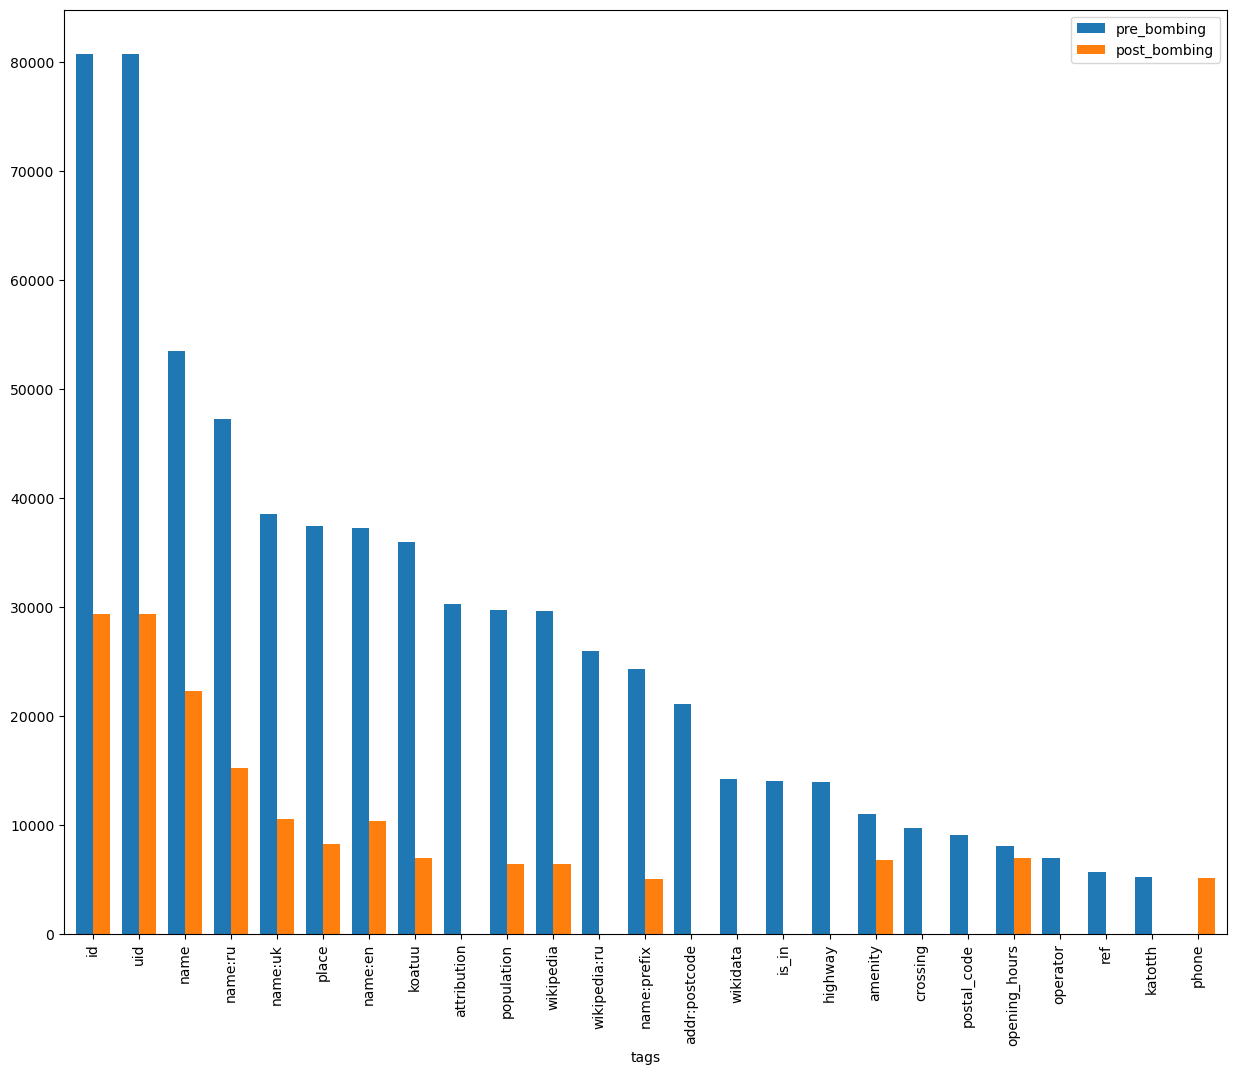

In [181]:
x= df_tg['tags']
y=df_tg['total counts_x']
z=df_tg['total counts_y']

df_tg = pd.DataFrame({
    'tags': x,
    'pre_bombing':y,
    'post_bombing':z
})

ax = df_tg.plot(x="tags", y=["pre_bombing", "post_bombing"],width=0.75, kind="bar", rot=90,figsize=(15, 12))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()
plt.show()

<Axes: xlabel='total counts', ylabel='Count'>

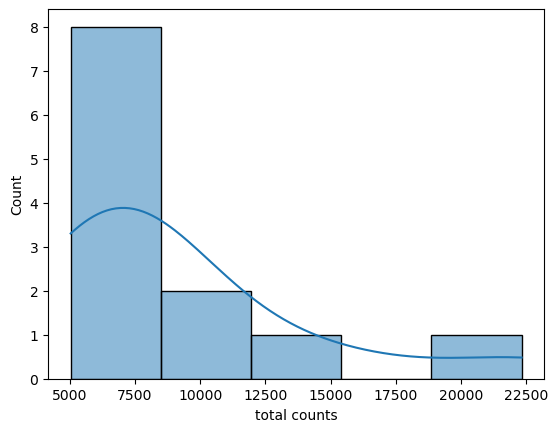

In [182]:
#frequency distribution of tag counts

db_plot=db18.loc[(db18['tags']!='id') & (db18['tags']!='uid'),:]
sb.histplot(data=db_plot, x='total counts',bins='auto',kde=True)

In [183]:
#list of tags for further analysis

column_keep2=db18["tags"].tolist()
column_keep2


['id',
 'uid',
 'name',
 'name:ru',
 'name:uk',
 'name:en',
 'place',
 'opening_hours',
 'koatuu',
 'amenity',
 'wikipedia',
 'population',
 'phone',
 'name:prefix']

In [184]:
db19=db17.loc[:,column_keep2]
db19.head()

id      uid name name:ru name:uk name:en place opening_hours koatuu  \
0  27913188  2923836  NaN     NaN     NaN     NaN   NaN           NaN    NaN   
1  27913188  2923836  NaN     NaN     NaN     NaN   NaN           NaN    NaN   
2  27913188  2923836  NaN     NaN     NaN     NaN   NaN           NaN    NaN   
3  27913188  2923836  NaN     NaN     NaN     NaN   NaN           NaN    NaN   
4  70954313   481934  NaN     NaN     NaN     NaN   NaN           NaN    NaN   

  amenity wikipedia population phone name:prefix  
0     NaN       NaN        NaN   NaN         NaN  
1     NaN       NaN        NaN   NaN         NaN  
2     NaN       NaN        NaN   NaN         NaN  
3     NaN       NaN        NaN   NaN         NaN  
4     NaN       NaN        NaN   NaN         NaN

In [185]:
#calculating the frequency of unique values under each tags column

remove=['id','uid']

dict1 = {}
for column_name in db19.columns:
    if column_name not in remove:
        unique_value_counts = db19[column_name].value_counts()
        dict1[column_name] = unique_value_counts

sorted(dict1.items())

[('amenity',
  post_office       2339
  pharmacy          1252
  bank               685
  cafe               327
  fuel               249
                    ... 
  taxi                 1
  Телевидение          1
  dancing_school       1
  money_transfer       1
  wlan                 1
  Name: amenity, Length: 73, dtype: int64),
 ('koatuu',
  1413300000    494
  1410300000    297
  4412900000    275
  2310400000    234
  1410600000    222
               ... 
  6323983501      3
  6322882003      2
  1413567801      1
  1421588601      1
  1413567802      1
  Name: koatuu, Length: 292, dtype: int64),
 ('name',
  тер.                            576
  Нова Пошта №1                   466
  Ð¡Ñ”Ð²Ñ”Ñ€Ð¾Ð´Ð¾Ð½ÐµÑ†ÑŒÐº      418
  Аптека оптових цін              375
  .                               276
                                 ... 
  Терикон ш-ти "Добропільська"      1
  New Vision                        1
  Аптека № 363                      1
  Осетр                             1
  

In [186]:
uniquevalues=pd.DataFrame.from_dict(dict1)
uniquevalues

name  name:ru  name:uk  name:en  place  \
                                 1.0      NaN      NaN      NaN    NaN   
"Center of Dental Implant"       NaN      NaN      NaN      2.0    NaN   
"Langosh"                        NaN      NaN      NaN      2.0    NaN   
"Solo" computer shop             NaN      NaN      NaN      2.0    NaN   
"Stream Service" Сервісний ...   5.0      NaN      NaN      NaN    NaN   
...                              ...      ...      ...      ...    ...   
эЛь доктор                       3.0      NaN      NaN      NaN    NaN   
эскулап                          1.0      NaN      NaN      NaN    NaN   
їдальня Смакуня                  3.0      NaN      2.0      NaN    NaN   
№3                               3.0      NaN      NaN      NaN    NaN   
№41                              4.0      NaN      NaN      NaN    NaN   

                                opening_hours  koatuu  amenity  wikipedia  \
                                          NaN     NaN      NaN        NaN   
"Center of Dental Implant"                NaN     NaN      NaN        NaN   
"Langosh"                                 NaN     NaN      NaN        NaN   
"Solo" computer shop                      NaN     NaN      NaN        NaN   
"Stream Service" Сервісний ...            NaN     NaN      NaN        NaN   
...                                       ...     ...      ...        ...   
эЛь доктор                                NaN     NaN      NaN        NaN   
эскулап                                   NaN     NaN      NaN        NaN   
їдальня Смакуня                           NaN     NaN      NaN        NaN   
№3                                        NaN     NaN      NaN        NaN   
№41                                       NaN     NaN      NaN        NaN   

                                population  phone  name:prefix  
                                       NaN    NaN          NaN  
"Center of Dental Implant"             NaN    NaN          NaN  
"Langosh"                              NaN    NaN          NaN  
"Solo" computer shop                   NaN    NaN          NaN  
"Stream Service" Сервісний ...         NaN    NaN          NaN  
...                                    ...    ...          ...  
эЛь доктор                             NaN    NaN          NaN  
эскулап                                NaN    NaN          NaN  
їдальня Смакуня                        NaN    NaN          NaN  
№3                                     NaN    NaN          NaN  
№41                                    NaN    NaN          NaN  

[9867 rows x 12 columns]

In [187]:
#displayong the list of unique tags stored by each contributor 

uid_column_name = 'uid'
grouped = db19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
dict2 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in db19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].unique().apply(list)
        
        # Store the unique values in the result_dict with the column_name as the key
        dict2[column_name] = unique_values

        
#storing dictionary into table 
uniquetags2=pd.DataFrame.from_dict(dict2)
uniquetags2=uniquetags2.drop(['id'],axis=1)
uniquetags2.head()

name                        name:ru  \
uid                                                                    
15628                  [Ð£Ð´Ð°Ñ‡Ð½Ðµ]               [Ð£Ð´Ð°Ñ‡Ð½Ð¾Ðµ]   
43262   [Ð¤Ñ€ÑƒÐ½Ð·Ðµ, Ð¡ÐµÐ½Ñ‚ÑÐ...  [nan, Ð¤Ñ€ÑƒÐ½Ð·Ðµ, Ð¡ÐµÐ½...   
94578   [Банзай, El Torro, Качелли...  [nan, Днипро-М, Моко пицца...   
95117   [nan, Террикон, тер., ., т...  [nan, Террикон шахты "Ливе...   
162827  [nan, ÐšÑ€Ð°ÑÐ½Ð¾Ð³Ð¾Ñ€Ñ–...  [nan, ÐšÑ€Ð°ÑÐ½Ð¾Ð³Ð¾Ñ€Ð¾...   

                              name:uk                        name:en  \
uid                                                                    
15628             [nan, Ð£Ð´Ð°Ñ‡Ð½Ðµ]                 [nan, Udachne]   
43262   [nan, Ð¤Ñ€ÑƒÐ½Ð·Ðµ, Ð¡ÐµÐ½...  [nan, Frunze, Sentianivka,...   
94578   [nan, Моко піца, Аптека оп...  [nan, Dnipro-M, Pechatniy ...   
95117        [nan, Терикон шахти №20]     [nan, Terrikon mine No.20]   
162827  [nan, ÐšÑ€Ð°ÑÐ½Ð¾Ð³Ð¾Ñ€Ñ–...  [nan, Krasnohorivka, Brusi...   

                       place                  opening_hours  \
uid                                                           
15628        [village, town]                          [nan]   
43262        [village, town]                          [nan]   
94578                  [nan]  [nan, Mo-Su 11:00-23:00, M...   
95117                  [nan]                          [nan]   
162827  [nan, town, village]                          [nan]   

                               koatuu                        amenity  \
uid                                                                    
15628                    [1422756300]                          [nan]   
43262   [nan, 4424556200, 44110455...                          [nan]   
94578                           [nan]  [restaurant, nan, cafe, ba...   
95117                           [nan]                          [nan]   
162827  [nan, 1423310400, 1413390001]                          [nan]   

                            wikipedia         population  \
uid                                                        
15628   [nan, uk:Ð£Ð´Ð°Ñ‡Ð½Ðµ (ÑÐ...        [nan, 1733]   
43262   [nan, uk:Ð¤Ñ€ÑƒÐ½Ð·Ðµ (ÑÐ...  [nan, 3321, 2349]   
94578   [nan, uk:Державне підприєм...              [nan]   
95117                           [nan]              [nan]   
162827  [nan, uk:ÐšÑ€Ð°ÑÐ½Ð¾Ð³Ð¾Ñ...  [nan, 16003, 163]   

                                phone                    name:prefix  
uid                                                                   
15628                           [nan]  [nan, ÑÐµÐ»Ð¸Ñ‰Ðµ Ð¼Ñ–ÑÑ...  
43262                           [nan]  [nan, ÑÐµÐ»Ð¸Ñ‰Ðµ Ð¼Ñ–ÑÑ...  
94578   [nan, +38-062-381-02-78,;+...                          [nan]  
95117                           [nan]                          [nan]  
162827                          [nan]    [nan, Ð¼Ñ–ÑÑ‚Ð¾, ÑÐµÐ»Ð¾]

In [188]:
#count unique values for each of these tags that are added by contributors 
uid_column_name = 'uid'
dict_re = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in db19.columns:
    if column_name != uid_column_name:
        # Get the unique values for the current column within each group
        unique_values = grouped[column_name].unique()
        
        #  count the total number of unique values
        total_unique_count = len(set([item for sublist in unique_values for item in sublist]))
        
        # Store the total unique count in the dict_re with the column_name as the key
        dict_re[column_name] = total_unique_count
        
dict_re

{'id': 6593,
 'name': 3272,
 'name:ru': 1910,
 'name:uk': 1030,
 'name:en': 991,
 'place': 13,
 'opening_hours': 707,
 'koatuu': 293,
 'amenity': 74,
 'wikipedia': 531,
 'population': 311,
 'phone': 2420,
 'name:prefix': 13}

In [189]:
# countinng the frequency of each tags added by each of the contributors 

grouped = db19.groupby(uid_column_name)
dict3 = {}

for column_name in db19.columns:
    if column_name != uid_column_name:
        unique_values = grouped[column_name].nunique()
        dict3[column_name] = unique_values

In [190]:
#converting the resulting dictionary into dataframe

contributor_base2=pd.DataFrame.from_dict(dict3)
contributor_base2.reset_index()
contributor_base2=contributor_base2.drop(['id'],axis=1)
contributor_base2

name  name:ru  name:uk  name:en  place  opening_hours  koatuu  \
uid                                                                       
15628        1        1        1        1      2              0       1   
43262        3        3        3        3      2              0       3   
94578     1669     1024      459      514      0            664       0   
95117      129        6        1        1      0              0       0   
162827       2        2        2        2      2              0       2   
...        ...      ...      ...      ...    ...            ...     ...   
16829915     1        1        0        0      0              1       0   
16830873     1        0        0        1      0              1       0   
16838142     1        0        0        0      0              1       0   
16878268     1        1        1        0      0              0       0   
16891795     0        0        0        0      0              0       0   

          amenity  wikipedia  population  phone  name:prefix  
uid                                                           
15628           0          2           1      0            1  
43262           0          3           2      0            1  
94578          54          7           0   2377            0  
95117           0          0           0      0            0  
162827          0          6           2      0            2  
...           ...        ...         ...    ...          ...  
16829915        0          0           0      0            0  
16830873        0          0           0      0            0  
16838142        2          0           0      0            0  
16878268        1          0           0      0            0  
16891795        0          0           0      0            0  

[139 rows x 12 columns]

In [191]:
#creating user profile based on previously derived features of all contributors

contributor_base2=timeframe_1.merge(contributor_base2, how='left',on='uid')
contributor_base2=changesets2.merge(contributor_base2, how='left',on='uid')
contributor_base2=version_list2.merge(contributor_base2, how='left',on='uid')
contributor_base2['version'] = contributor_base2['version'].str[:6]
contributor_base2=contributor_base2.merge(df_del2.loc[:,'deleted nodes'], how='left',on='uid')
contributor_base2=id_counts2.merge(contributor_base2, how='left',on='uid')

In [192]:
#final contributor_base that contributed during the 6 months before bombing

contributor_base2

uid   id contribution level             version  new nodes  \
0         629  546           inactive  [8, 3, 2, 2, 1, 1]        542   
1        5359    5           inactive     [5, 2, 2, 2, 2]          0   
2        6389    1           inactive                [34]          0   
3       12054    2           inactive              [2, 2]          0   
4       15628    1           inactive                [12]          0   
..        ...  ...                ...                 ...        ...   
220  16829915    2           inactive              [1, 1]          2   
221  16830873    2           inactive              [1, 1]          2   
222  16838142    3           inactive           [1, 1, 1]          3   
223  16878268    2           inactive              [1, 1]          2   
224  16891795    3           inactive           [1, 1, 1]          3   

     edited nodes  changeset active days  name  name:ru  name:uk  name:en  \
0               4          3     12 days   NaN      NaN      NaN      NaN   
1               5          2     13 days   NaN      NaN      NaN      NaN   
2               1          1      1 days   NaN      NaN      NaN      NaN   
3               2          1      1 days   NaN      NaN      NaN      NaN   
4               1          1      1 days   1.0      1.0      1.0      1.0   
..            ...        ...         ...   ...      ...      ...      ...   
220             0          2      1 days   1.0      1.0      0.0      0.0   
221             0          2      1 days   1.0      0.0      0.0      1.0   
222             0          2      4 days   1.0      0.0      0.0      0.0   
223             0          2      1 days   1.0      1.0      1.0      0.0   
224             0          1      1 days   0.0      0.0      0.0      0.0   

     place  opening_hours  koatuu  amenity  wikipedia  population  phone  \
0      NaN            NaN     NaN      NaN        NaN         NaN    NaN   
1      NaN            NaN     NaN      NaN        NaN         NaN    NaN   
2      NaN            NaN     NaN      NaN        NaN         NaN    NaN   
3      NaN            NaN     NaN      NaN        NaN         NaN    NaN   
4      2.0            0.0     1.0      0.0        2.0         1.0    0.0   
..     ...            ...     ...      ...        ...         ...    ...   
220    0.0            1.0     0.0      0.0        0.0         0.0    0.0   
221    0.0            1.0     0.0      0.0        0.0         0.0    0.0   
222    0.0            1.0     0.0      2.0        0.0         0.0    0.0   
223    0.0            0.0     0.0      1.0        0.0         0.0    0.0   
224    0.0            0.0     0.0      0.0        0.0         0.0    0.0   

     name:prefix  deleted nodes  
0            NaN            NaN  
1            NaN            NaN  
2            NaN            NaN  
3            NaN            NaN  
4            1.0            NaN  
..           ...            ...  
220          0.0            NaN  
221          0.0            NaN  
222          0.0            NaN  
223          0.0            NaN  
224          0.0            NaN  

[225 rows x 21 columns]

In [193]:
contributor_base2

uid   id contribution level             version  new nodes  \
0         629  546           inactive  [8, 3, 2, 2, 1, 1]        542   
1        5359    5           inactive     [5, 2, 2, 2, 2]          0   
2        6389    1           inactive                [34]          0   
3       12054    2           inactive              [2, 2]          0   
4       15628    1           inactive                [12]          0   
..        ...  ...                ...                 ...        ...   
220  16829915    2           inactive              [1, 1]          2   
221  16830873    2           inactive              [1, 1]          2   
222  16838142    3           inactive           [1, 1, 1]          3   
223  16878268    2           inactive              [1, 1]          2   
224  16891795    3           inactive           [1, 1, 1]          3   

     edited nodes  changeset active days  name  name:ru  name:uk  name:en  \
0               4          3     12 days   NaN      NaN      NaN      NaN   
1               5          2     13 days   NaN      NaN      NaN      NaN   
2               1          1      1 days   NaN      NaN      NaN      NaN   
3               2          1      1 days   NaN      NaN      NaN      NaN   
4               1          1      1 days   1.0      1.0      1.0      1.0   
..            ...        ...         ...   ...      ...      ...      ...   
220             0          2      1 days   1.0      1.0      0.0      0.0   
221             0          2      1 days   1.0      0.0      0.0      1.0   
222             0          2      4 days   1.0      0.0      0.0      0.0   
223             0          2      1 days   1.0      1.0      1.0      0.0   
224             0          1      1 days   0.0      0.0      0.0      0.0   

     place  opening_hours  koatuu  amenity  wikipedia  population  phone  \
0      NaN            NaN     NaN      NaN        NaN         NaN    NaN   
1      NaN            NaN     NaN      NaN        NaN         NaN    NaN   
2      NaN            NaN     NaN      NaN        NaN         NaN    NaN   
3      NaN            NaN     NaN      NaN        NaN         NaN    NaN   
4      2.0            0.0     1.0      0.0        2.0         1.0    0.0   
..     ...            ...     ...      ...        ...         ...    ...   
220    0.0            1.0     0.0      0.0        0.0         0.0    0.0   
221    0.0            1.0     0.0      0.0        0.0         0.0    0.0   
222    0.0            1.0     0.0      2.0        0.0         0.0    0.0   
223    0.0            0.0     0.0      1.0        0.0         0.0    0.0   
224    0.0            0.0     0.0      0.0        0.0         0.0    0.0   

     name:prefix  deleted nodes  
0            NaN            NaN  
1            NaN            NaN  
2            NaN            NaN  
3            NaN            NaN  
4            1.0            NaN  
..           ...            ...  
220          0.0            NaN  
221          0.0            NaN  
222          0.0            NaN  
223          0.0            NaN  
224          0.0            NaN  

[225 rows x 21 columns]

In [194]:
uidlist2=contributor_base2['uid'].to_list()
list_activeuid=set(uid_list).intersection(uidlist2)
n=len(list_activeuid)

print('Number of users active after bombing: ',n)

Number of users active after bombing:  50


In [195]:
result = [item for item in uidlist2 if item not in list_activeuid]

In [196]:
print(len(result))

175


## *Analysing location data for the 6 months period*


In [197]:
#fetching locations to analyse spatial data
donetsk6=donetsk_2.drop(['deleted','version','visibility','tp','extra'],axis=1)
donetsk6

id  changeset                  timestamp       uid  \
0       7938317989  118429450  2022-03-13 13:28:21+00:00  10184360   
1       2314407993  124381757  2022-08-02 10:27:28+01:00   4119278   
2       5488800432  120121280  2022-04-24 12:53:29+01:00   4192454   
3       5489046150  120129826  2022-04-24 16:54:57+01:00   4192454   
4       1930555458  119930110  2022-04-20 03:21:39+01:00   4192454   
...            ...        ...                        ...       ...   
266207  9557618446  118154704  2022-03-06 11:24:19+00:00   4814295   
266208  9565695745  118272274  2022-03-09 10:24:28+00:00  10184360   
266209  9841097253  122751348  2022-06-23 11:07:59+01:00  12207058   
266210  9861268259  123101521  2022-07-01 22:18:05+01:00   4119278   
266211  9622388831  119088996  2022-03-29 22:19:12+01:00  13595839   

                  user   latitude  longitude        date  
0               vootza  47.963705  37.855260  2022-03-13  
1            SmartFinn  47.529892  37.551785  2022-08-02  
2                 dval  48.987696  37.443798  2022-04-24  
3                 dval  48.920826  37.502263  2022-04-24  
4                 dval  49.019715  37.959987  2022-04-20  
...                ...        ...        ...         ...  
266207       Алекс Мок  47.832424  36.811028  2022-03-06  
266208          vootza  47.979026  37.879721  2022-03-09  
266209       iGansteRX  48.054284  38.607354  2022-06-23  
266210       SmartFinn  47.736598  37.040355  2022-07-01  
266211  Wouter De Jong  48.000157  37.727088  2022-03-29  

[266212 rows x 8 columns]

In [198]:
# grouing by uid and calculating mean value of latitudes
db20=donetsk6.groupby(['uid'])['latitude'].mean()
db20=db20.reset_index()
db20

uid   latitude
0         629  48.953309
1        5359  48.419382
2        6389  46.755678
3       12054  47.361899
4       15628  48.239420
..        ...        ...
220  16829915  47.968906
221  16830873  48.940848
222  16838142  48.244050
223  16878268  47.977505
224  16891795  46.929844

[225 rows x 2 columns]

In [199]:
# grouing by uid and calculating mean value of longitude

db21=donetsk6.groupby(['uid'])['longitude'].mean()
db21=db21.reset_index()
db20

uid   latitude
0         629  48.953309
1        5359  48.419382
2        6389  46.755678
3       12054  47.361899
4       15628  48.239420
..        ...        ...
220  16829915  47.968906
221  16830873  48.940848
222  16838142  48.244050
223  16878268  47.977505
224  16891795  46.929844

[225 rows x 2 columns]

In [200]:
mean_loc2=db20.merge(db21, on='uid')

In [201]:
mean_loc2

uid   latitude  longitude
0         629  48.953309  37.324101
1        5359  48.419382  38.216004
2        6389  46.755678  36.788762
3       12054  47.361899  38.382950
4       15628  48.239420  36.982730
..        ...        ...        ...
220  16829915  47.968906  37.696612
221  16830873  48.940848  38.496087
222  16838142  48.244050  38.313645
223  16878268  47.977505  37.711492
224  16891795  46.929844  37.372355

[225 rows x 3 columns]

In [202]:
#Finding the locations of the first node contributed by each user

db22=donetsk6.sort_values(['uid', 'date'], ascending=[True,True])
db22

id  changeset                  timestamp       uid  \
849     9808475059  122206968  2022-06-10 12:40:35+01:00       629   
3584    9808500298  122206968  2022-06-10 12:40:35+01:00       629   
4572    9808500340  122206968  2022-06-10 12:40:35+01:00       629   
5734    9808500460  122206968  2022-06-10 12:40:35+01:00       629   
6092    9808500374  122206968  2022-06-10 12:40:35+01:00       629   
...            ...        ...                        ...       ...   
57439   9963642217  125101423  2022-08-19 11:54:20+01:00  16878268   
174527  9963638317  125101359  2022-08-19 11:53:03+01:00  16878268   
61574   9966614318  125161650  2022-08-20 21:20:58+01:00  16891795   
176348  9966614317  125161650  2022-08-20 21:20:57+01:00  16891795   
240117  9966614319  125161650  2022-08-20 21:20:58+01:00  16891795   

                                user   latitude  longitude        date  
849                           Wookey  48.945760  37.445573  2022-06-10  
3584                          Wookey  48.942940  37.445715  2022-06-10  
4572                          Wookey  48.941619  37.447304  2022-06-10  
5734                          Wookey  48.942159  37.456453  2022-06-10  
6092                          Wookey  48.941623  37.451199  2022-06-10  
...                              ...        ...        ...         ...  
57439                       Artemoff  47.980911  37.710455  2022-08-19  
174527                      Artemoff  47.974099  37.712529  2022-08-19  
61574   Емельянов Вячеслав Андреевич  46.929845  37.372236  2022-08-20  
176348  Емельянов Вячеслав Андреевич  46.929913  37.372502  2022-08-20  
240117  Емельянов Вячеслав Андреевич  46.929772  37.372326  2022-08-20  

[266212 rows x 8 columns]

In [203]:
db23=db22.groupby('uid')

first_row= db23.first()
first_record2=pd.DataFrame(first_row).reset_index()
first_record2

uid          id  changeset                  timestamp  \
0         629  9808475059  122206968  2022-06-10 12:40:35+01:00   
1        5359  9809820767  122289617  2022-06-12 17:39:31+01:00   
2        6389   258057686  118853934  2022-03-24 08:59:57+00:00   
3       12054  3014711231  118148384  2022-03-06 07:15:34+00:00   
4       15628   256615886  122320619  2022-06-13 12:18:47+01:00   
..        ...         ...        ...                        ...   
220  16829915  9952306817  124878513  2022-08-14 09:43:03+01:00   
221  16830873  9952474818  124882717  2022-08-14 11:59:37+01:00   
222  16838142  9954082817  124914569  2022-08-15 08:41:52+01:00   
223  16878268  9963642217  125101423  2022-08-19 11:54:20+01:00   
224  16891795  9966614318  125161650  2022-08-20 21:20:58+01:00   

                             user   latitude  longitude        date  
0                          Wookey  48.945760  37.445573  2022-06-10  
1                       user_5359  48.760296  38.442139  2022-06-12  
2                     Jesús Gómez  46.755678  36.788762  2022-03-24  
3                   Martin Sauter  47.344503  38.389057  2022-03-06  
4                       vanagaudi  48.239420  36.982730  2022-06-13  
..                            ...        ...        ...         ...  
220                     warrant76  47.968909  37.696646  2022-08-14  
221                       Вадиккк  48.940796  38.496126  2022-08-14  
222                  Сан Саныч 82  48.337663  38.400727  2022-08-15  
223                      Artemoff  47.980911  37.710455  2022-08-19  
224  Емельянов Вячеслав Андреевич  46.929845  37.372236  2022-08-20  

[225 rows x 8 columns]

In [204]:
#finding the median value of the latitude and longitude contributed by each user


db25=donetsk6.groupby(['uid'])['latitude'].median()
db26=donetsk6.groupby(['uid'])['longitude'].median()

In [205]:
db25=db25.reset_index()
db26=db26.reset_index()
median_loc2=db25.merge(db26, on='uid')

In [206]:
median_loc2

uid   latitude  longitude
0         629  48.945010  37.444620
1        5359  48.760294  38.442005
2        6389  46.755678  36.788762
3       12054  47.361899  38.382950
4       15628  48.239420  36.982730
..        ...        ...        ...
220  16829915  47.968906  37.696612
221  16830873  48.940848  38.496087
222  16838142  48.337663  38.399944
223  16878268  47.977505  37.711492
224  16891795  46.929845  37.372326

[225 rows x 3 columns]

### *Plotting all three measures of location data to understand the activity*


C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

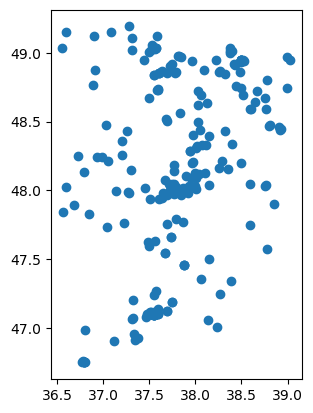

In [207]:
crs={'init':'epsg:4326'}
geometry4=[Point(xy) for xy in zip(first_record2["longitude"], first_record2["latitude"])]
geodata4=gpd.GeoDataFrame(first_record2,crs=crs, geometry=geometry4)
geodata4.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

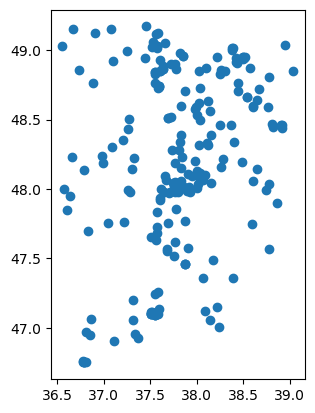

In [208]:
#plotting the median value location of nodes created by each usercrs={'init':'epsg:4326'}
geometry5=[Point(xy) for xy in zip(median_loc2["longitude"], median_loc2["latitude"])]
geodata5=gpd.GeoDataFrame(median_loc2,crs=crs, geometry=geometry5)
geodata5.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

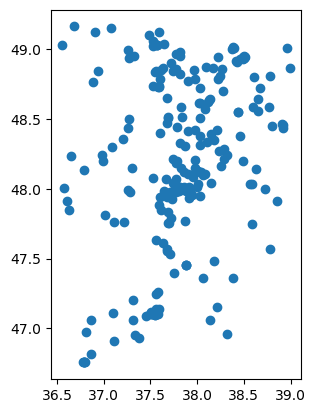

In [209]:
#plotting the mean value of locations

crs={'init':'epsg:4326'}
geometry6=[Point(xy) for xy in zip(mean_loc2["longitude"], mean_loc2["latitude"])]
geodata6=gpd.GeoDataFrame(mean_loc2,crs=crs, geometry=geometry6)
geodata6.plot()

Text(0.5, 0.98, 'donetsk mapping pattern')

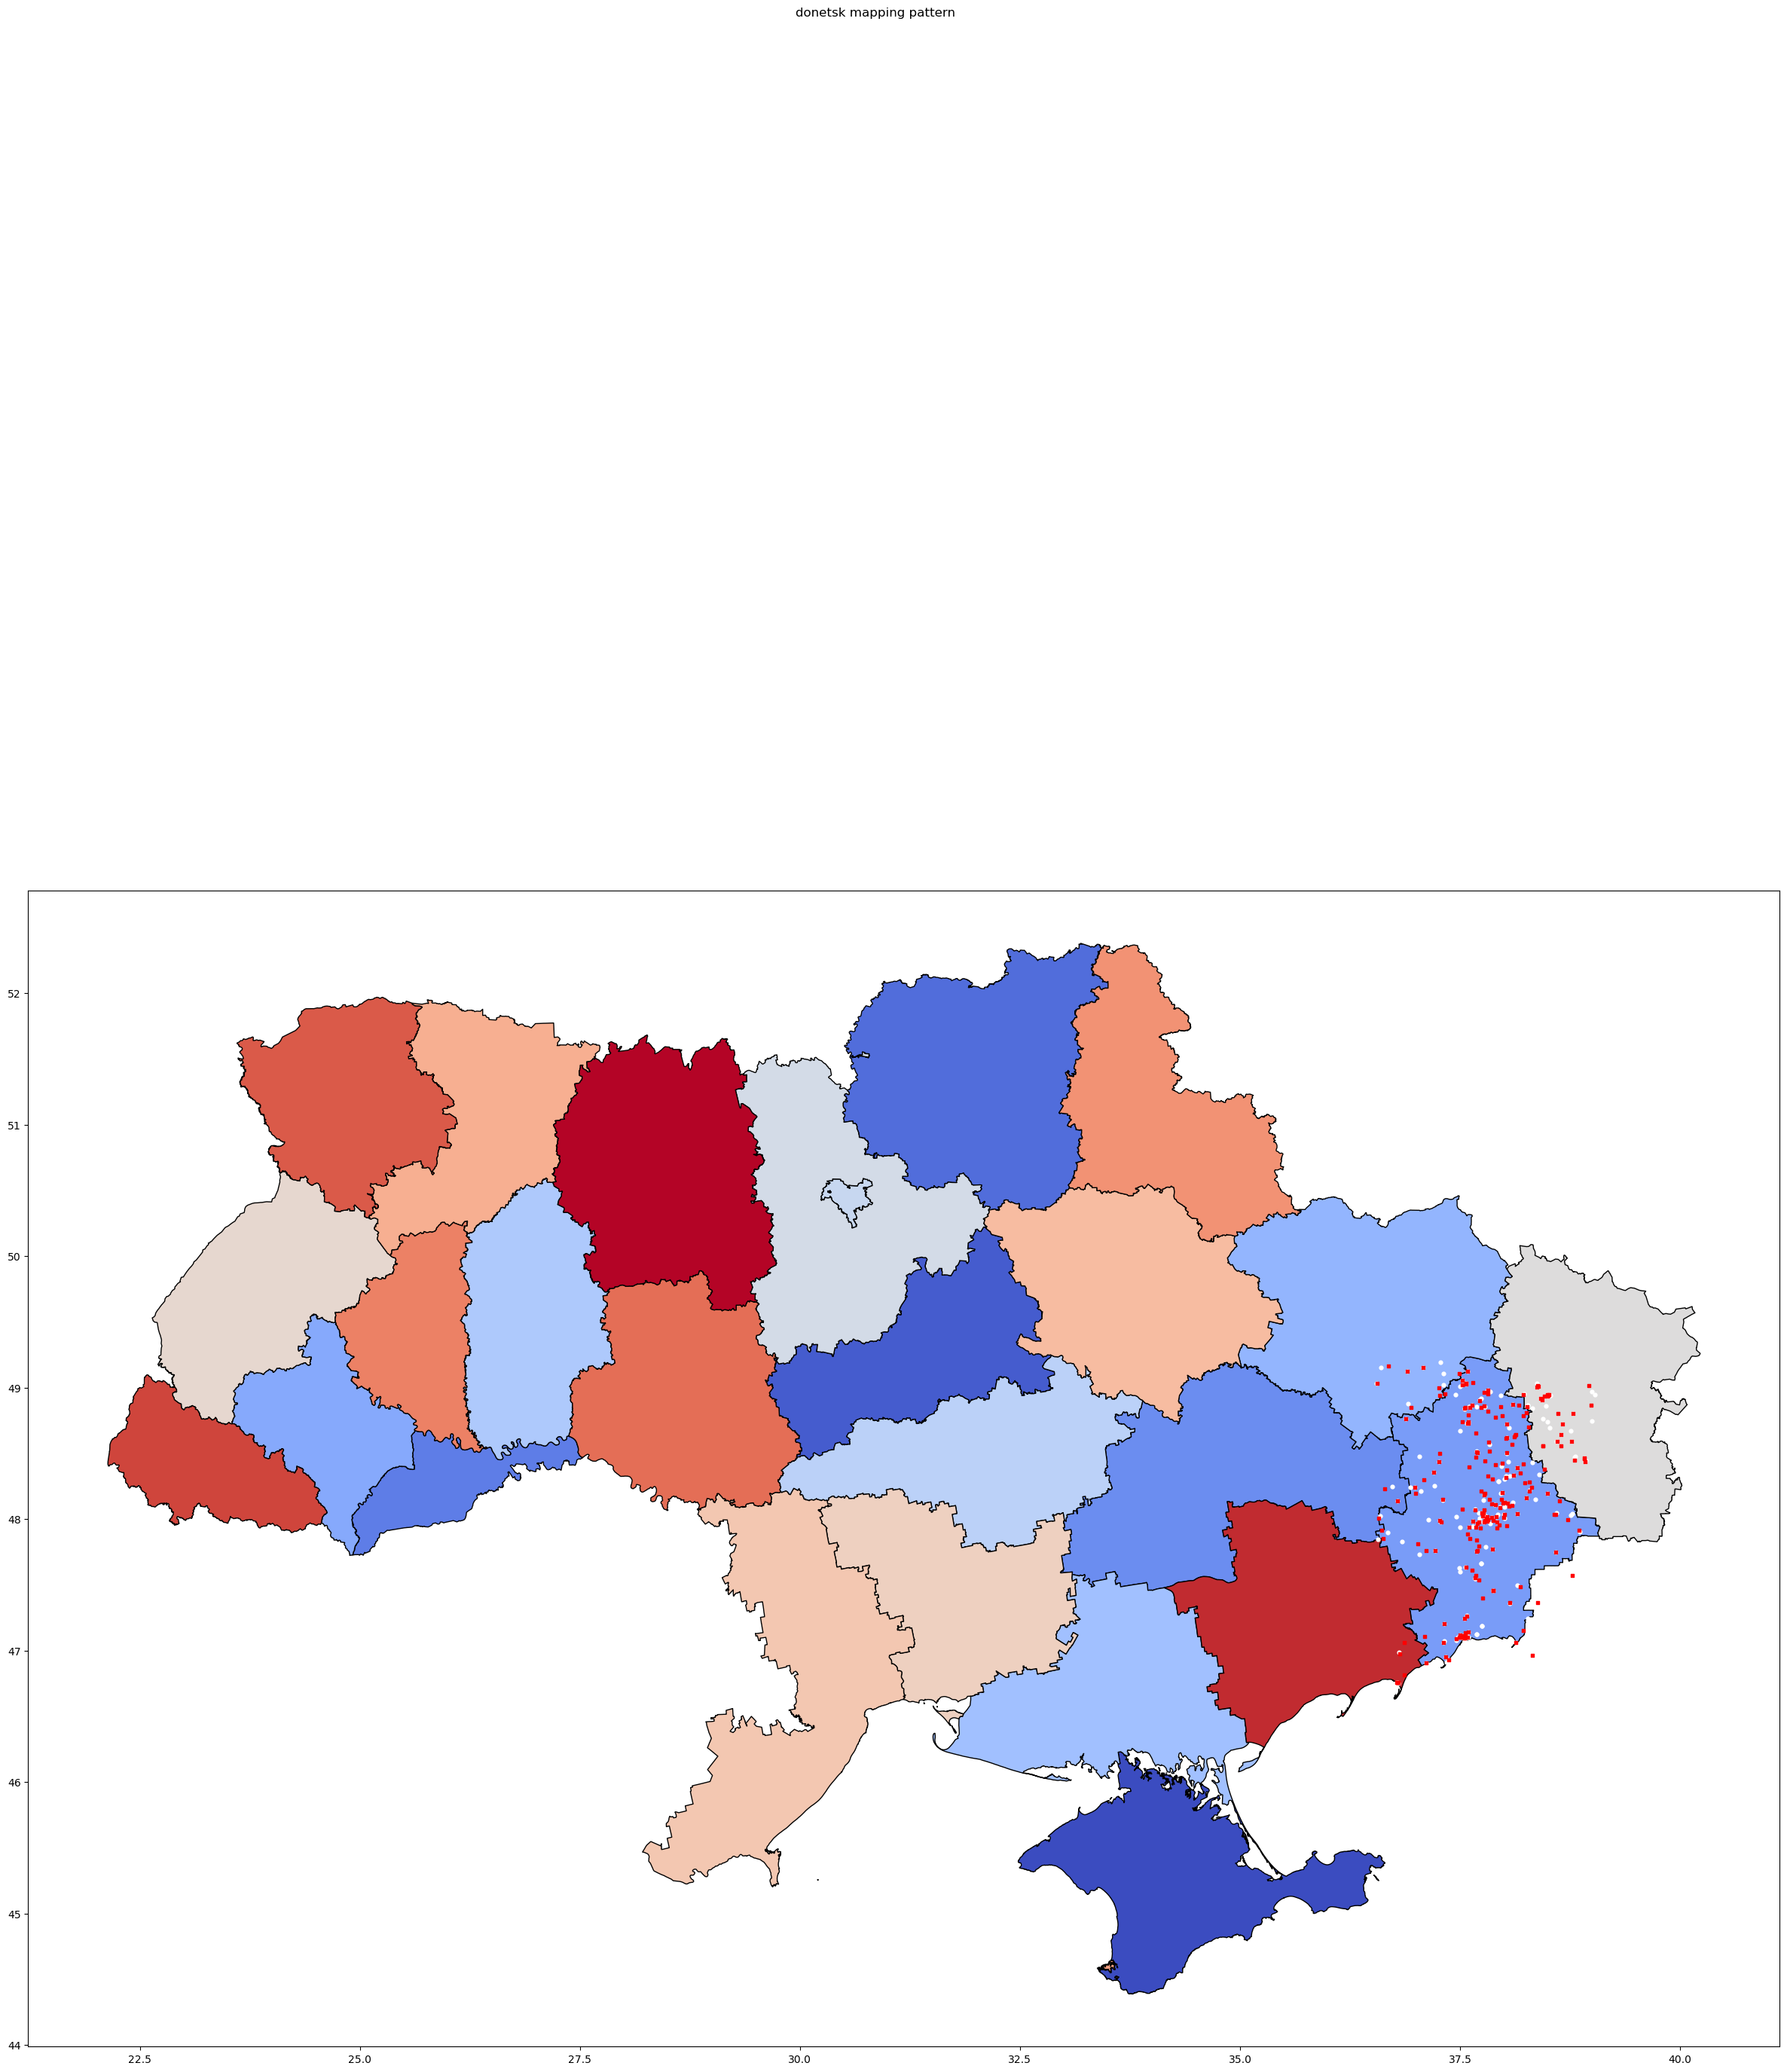

In [210]:
#creating plot with Ukraine's map to understand mapping pattern of the contributors

fig,ax = plt.subplots(figsize=(30, 40))


color = 'blue'

cmapblue = LinearSegmentedColormap.from_list('custom_cmap', [(0, color), (1, color)], N=256)
shapefile.plot(facecolor='white', edgecolor='k',alpha=1,linewidth=1,cmap='coolwarm',ax=ax)


g=geodata4.plot(ax=ax,color='white', marker='o',markersize=12,legend=True);
g=geodata6.plot(ax=ax,color='red',marker='s',markersize=12,legend=True);

fig.suptitle('donetsk mapping pattern', fontsize=12)



### *Analysing dispersion of mapping using Statistical measure*

In [211]:
db27=donetsk6.loc[:,['uid','latitude','longitude']]
db27.head()

uid   latitude  longitude
0  10184360  47.963705  37.855260
1   4119278  47.529892  37.551785
2   4192454  48.987696  37.443798
3   4192454  48.920826  37.502263
4   4192454  49.019715  37.959987

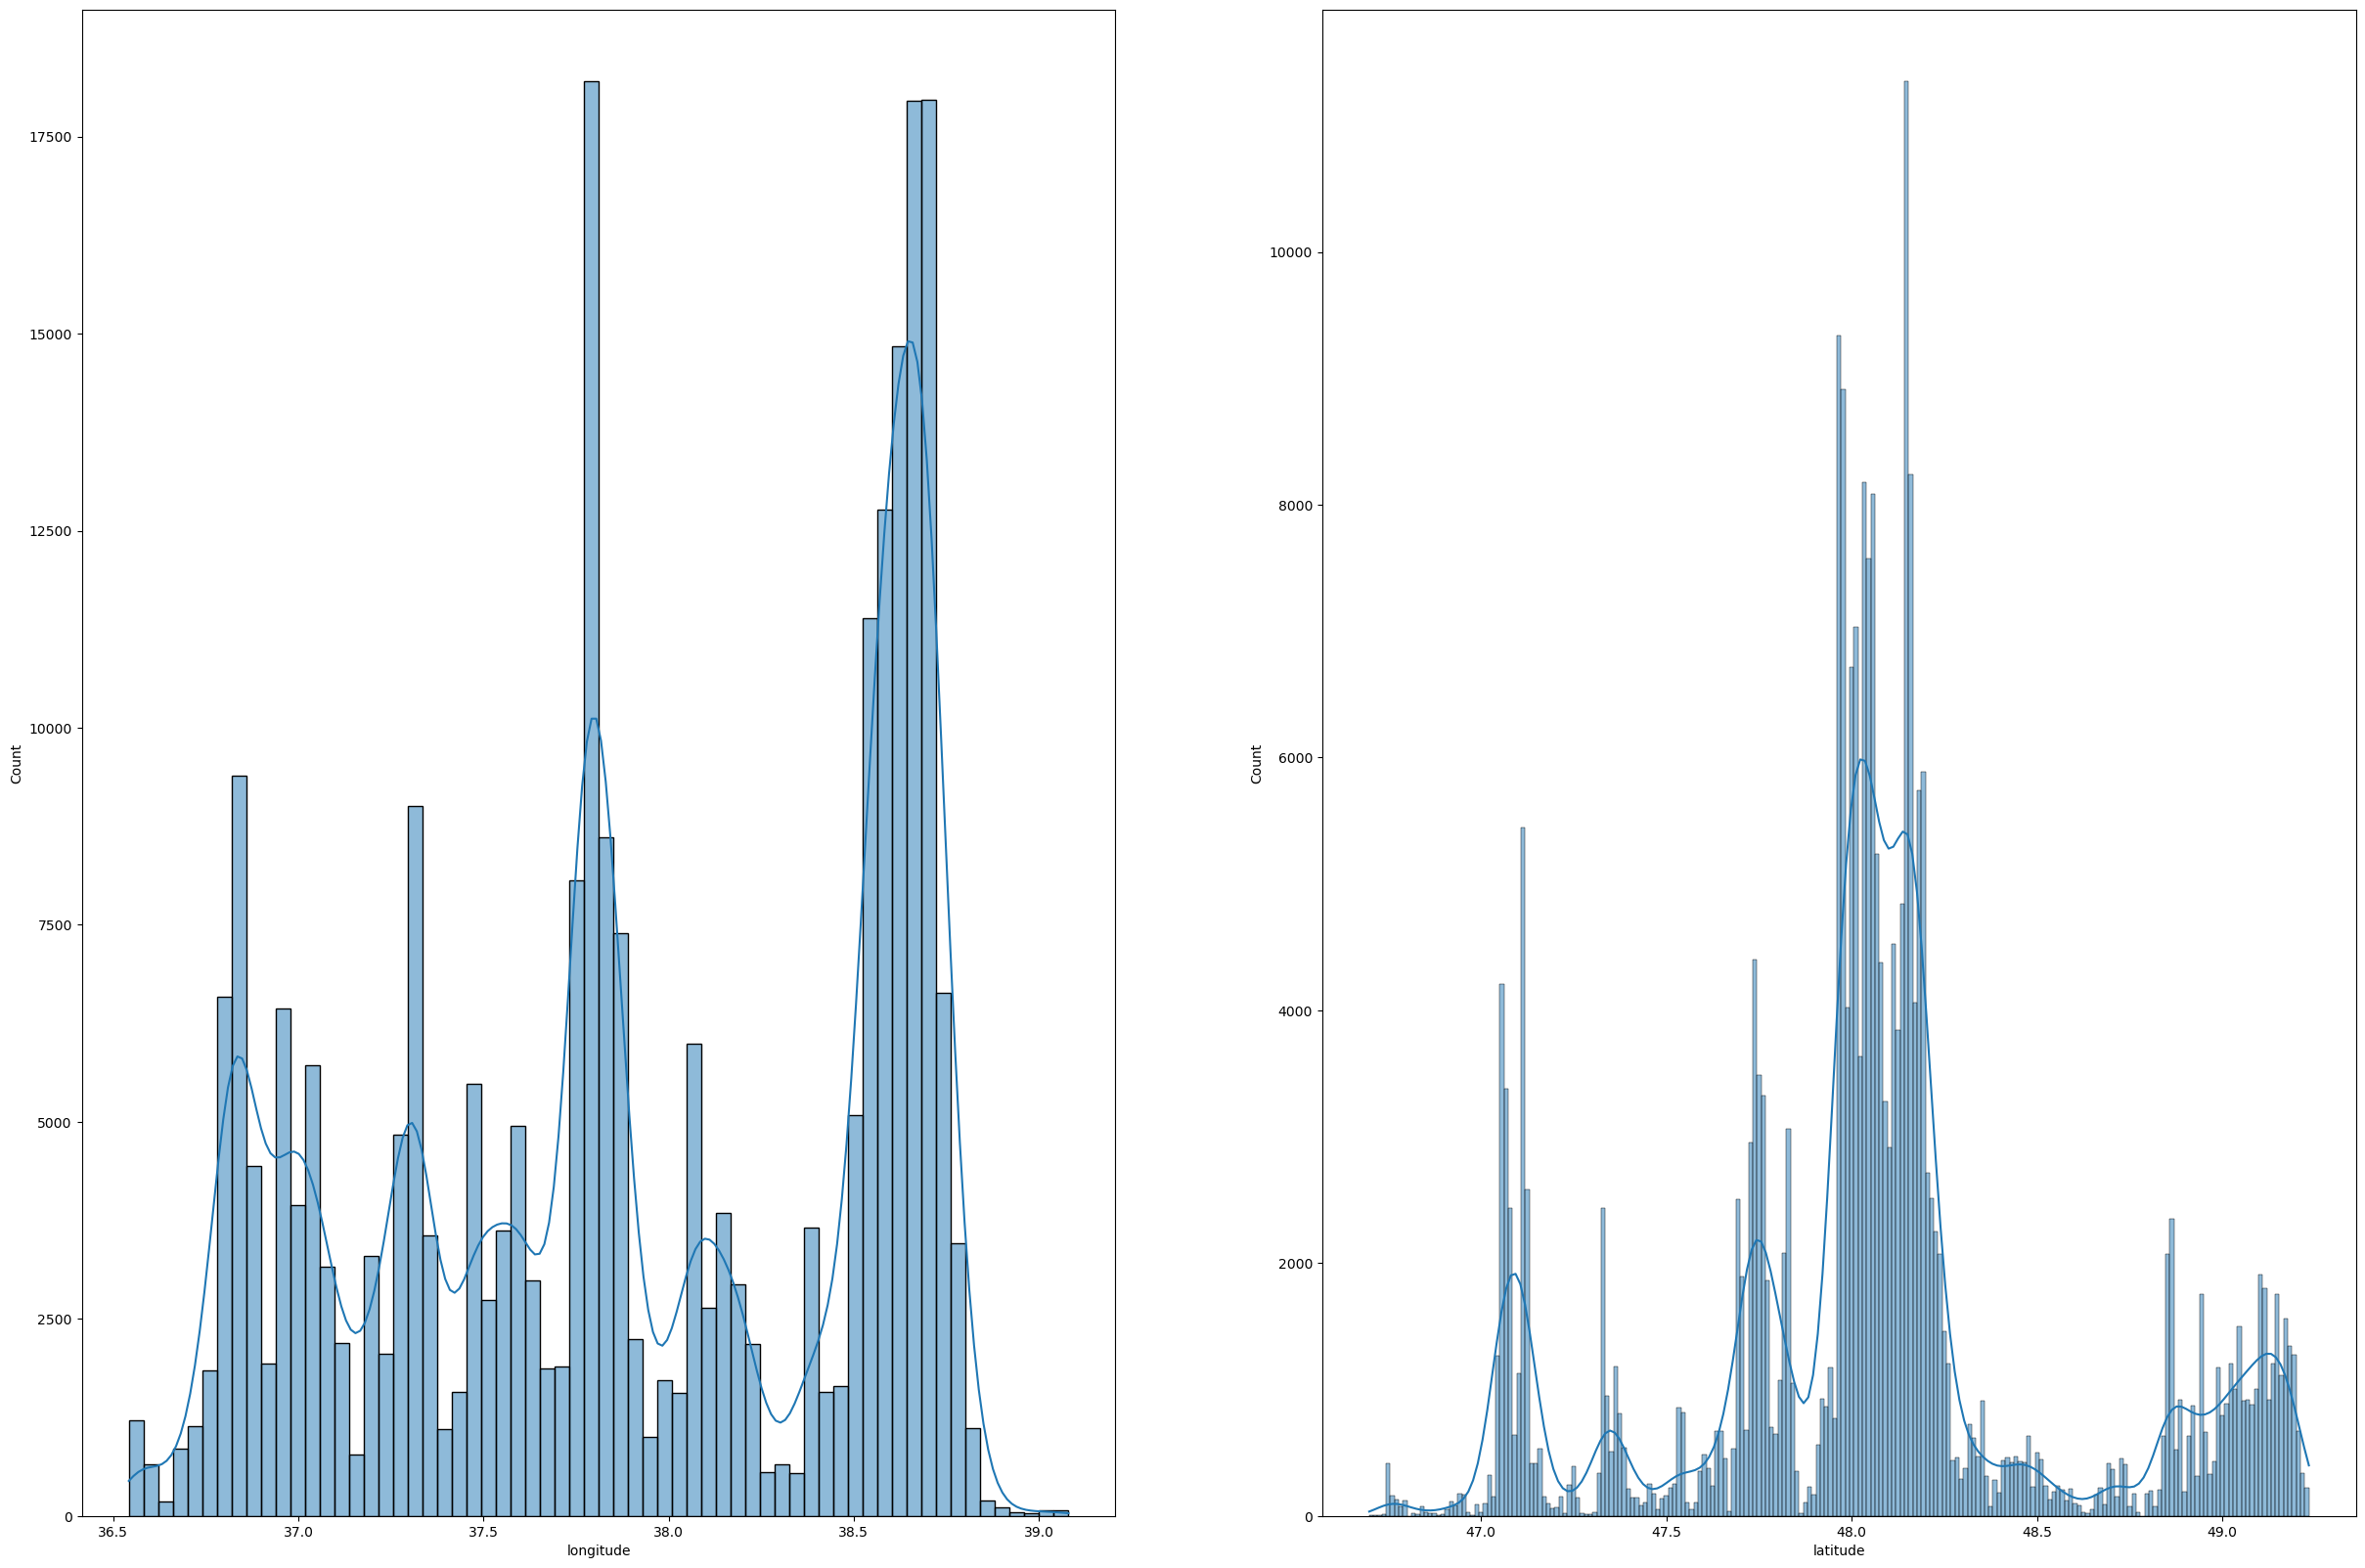

In [212]:
# frequency distribution of latitude and longitude measures

fig,axes= plt.subplots(1,2,figsize=(30, 20))

axes = axes.flatten()

s=sb.histplot(data=db27, x='longitude',bins='auto',kde=True,ax=axes[0])
s=sb.histplot(data=db27, x='latitude',bins='auto',kde=True,ax=axes[1])

In [213]:
#calculating standard deviation of complete dataset 

p_std_lat2=st.pstdev(db27['latitude'])
p_std_lon2=st.pstdev(db27['longitude'])
print('Population std for latitude: ',p_std_lat2)
print('Population std for longitude: ',p_std_lon2)

Population std for latitude:  0.5221252397799504
Population std for longitude:  0.6647024043422989


In [214]:
#calculation foe mean value

p_mean_lat2=db27['latitude'].mean()
p_mean_lon2=db27['longitude'].mean()

print('Population mean for latitude: ',p_mean_lat2)
print('Population mean for latitude: ',p_mean_lon2)

Population mean for latitude:  48.06514062172178
Population mean for latitude:  37.89932900457004


In [215]:
#calculation for Coefficient of variance to understand the variability in mapping

cv_lat2=(p_std_lat2/p_mean_lat2)*100
cv_lon2=(p_std_lon2/p_mean_lon2)*100
print('CV for latitude: ',cv_lat2)
print('CV for longitude: ',cv_lon2)

CV for latitude:  1.0862867205344022
CV for longitude:  1.7538632524658857


In [216]:
#calculating std for each contributor group

db28=db27.groupby('uid').agg('std',numeric_only='True')
db28=db28.reset_index()#
db28

uid  latitude  longitude
0         629  0.018801   0.203001
1        5359  0.762304   0.505454
2        6389       NaN        NaN
3       12054  0.024603   0.008636
4       15628       NaN        NaN
..        ...       ...        ...
220  16829915  0.000003   0.000048
221  16830873  0.000073   0.000056
222  16838142  0.163110   0.150153
223  16878268  0.004817   0.001467
224  16891795  0.000071   0.000136

[225 rows x 3 columns]

In [217]:
db29=db28.merge(mean_loc2,on='uid',how='left')
db29= db29.rename(columns={'latitude_x': 'latitude'})
db29= db29.rename(columns={'longitude_x': 'longitude'})
db29= db29.rename(columns={'latitude_y': 'mean_lat'})
db29= db29.rename(columns={'longitude_y': 'mean_long'})
db29

uid  latitude  longitude   mean_lat  mean_long
0         629  0.018801   0.203001  48.953309  37.324101
1        5359  0.762304   0.505454  48.419382  38.216004
2        6389       NaN        NaN  46.755678  36.788762
3       12054  0.024603   0.008636  47.361899  38.382950
4       15628       NaN        NaN  48.239420  36.982730
..        ...       ...        ...        ...        ...
220  16829915  0.000003   0.000048  47.968906  37.696612
221  16830873  0.000073   0.000056  48.940848  38.496087
222  16838142  0.163110   0.150153  48.244050  38.313645
223  16878268  0.004817   0.001467  47.977505  37.711492
224  16891795  0.000071   0.000136  46.929844  37.372355

[225 rows x 5 columns]

In [218]:
#calculation for CV applied to each group

db29['CV_lat']=(db29['latitude']/db29['mean_lat']*100)
db29['CV_lon']=(db29['longitude']/db29['mean_long'])*100
db29

uid  latitude  longitude   mean_lat  mean_long    CV_lat    CV_lon
0         629  0.018801   0.203001  48.953309  37.324101  0.038407  0.543888
1        5359  0.762304   0.505454  48.419382  38.216004  1.574378  1.322624
2        6389       NaN        NaN  46.755678  36.788762       NaN       NaN
3       12054  0.024603   0.008636  47.361899  38.382950  0.051947  0.022500
4       15628       NaN        NaN  48.239420  36.982730       NaN       NaN
..        ...       ...        ...        ...        ...       ...       ...
220  16829915  0.000003   0.000048  47.968906  37.696612  0.000006  0.000128
221  16830873  0.000073   0.000056  48.940848  38.496087  0.000148  0.000145
222  16838142  0.163110   0.150153  48.244050  38.313645  0.338094  0.391904
223  16878268  0.004817   0.001467  47.977505  37.711492  0.010041  0.003889
224  16891795  0.000071   0.000136  46.929844  37.372355  0.000150  0.000363

[225 rows x 7 columns]

In [219]:
db29.sort_values('CV_lon',ascending=True)

uid  latitude  longitude   mean_lat  mean_long    CV_lat    CV_lon
194  15691146  0.000000   0.000000  48.160571  38.256269  0.000000  0.000000
65    1782528  0.000000   0.000000  49.150375  37.078192  0.000000  0.000000
220  16829915  0.000003   0.000048  47.968906  37.696612  0.000006  0.000128
221  16830873  0.000073   0.000056  48.940848  38.496087  0.000148  0.000145
180  14950764  0.000032   0.000059  48.724523  38.029340  0.000066  0.000155
..        ...       ...        ...        ...        ...       ...       ...
198  15849159       NaN        NaN  48.980131  37.816801       NaN       NaN
202  15922238       NaN        NaN  48.866571  37.637976       NaN       NaN
207  16223265       NaN        NaN  47.990099  37.264425       NaN       NaN
214  16585880       NaN        NaN  46.758692  36.777649       NaN       NaN
219  16823921       NaN        NaN  47.979622  37.921129       NaN       NaN

[225 rows x 7 columns]

In [220]:

df_ts1= donetsk1.loc[:,['date','id']]
df_ts1=df_ts1.groupby('date').count()
df_ts1=df_ts1.reset_index()
df_ts1['date']=pd.to_datetime(df_ts1['date'])
df_ts1 = df_ts1.set_index('date')

In [221]:
df_ts2= donetsk4.loc[:,['date','id']]
df_ts2=df_ts2.groupby('date').count()
df_ts2=df_ts2.reset_index()
df_ts2['date']=pd.to_datetime(df_ts2['date'])
df_ts2 = df_ts2.set_index('date')

In [222]:
df_ts=df_ts1.append(df_ts2)
df_ts

C:\Users\Shruti\AppData\Local\Temp\ipykernel_41700\1232277424.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ts=df_ts1.append(df_ts2)


id
date            
2021-08-24   328
2021-08-25  2827
2021-08-26  3763
2021-08-27  3766
2021-08-28  4365
...          ...
2022-08-20    85
2022-08-21    24
2022-08-22    28
2022-08-24    46
2022-08-25     9

[360 rows x 1 columns]

In [223]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Additive Decomposition
add_result = seasonal_decompose(df_ts, model='additive', period=30)


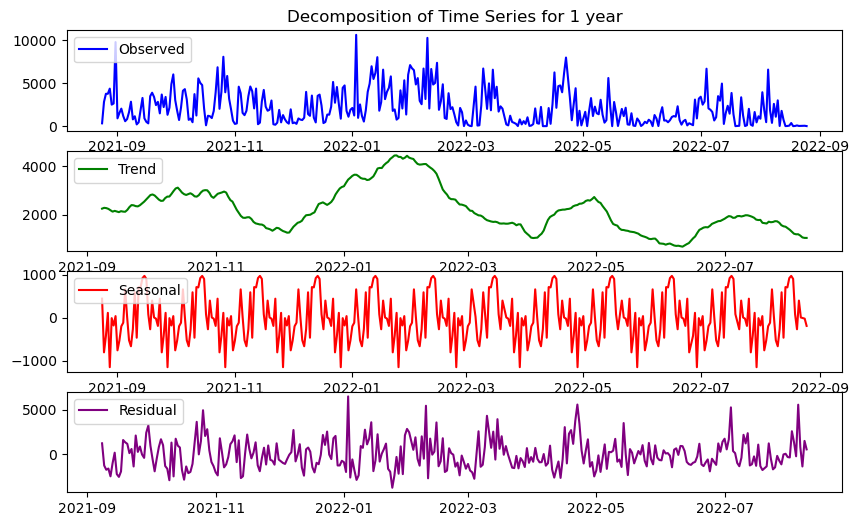

In [232]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 6))
axes[0].set_title('Decomposition of Time Series for 1 year')
axes[0].plot(df_ts.index, add_result.observed, label='Observed', color='blue')
axes[1].plot(df_ts.index, add_result.trend, label='Trend', color='green')
axes[2].plot(df_ts.index, add_result.seasonal, label='Seasonal', color='red')
axes[3].plot(df_ts.index, add_result.resid, label='Residual', color='purple')
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
axes[2].legend(loc='upper left')
axes[3].legend(loc='upper left')

In [225]:
week1 = seasonal_decompose(df6, model='additive',period=2)
week2 = seasonal_decompose(db6, model='additive',period=2)

In [226]:
month1 = seasonal_decompose(df7, model='additive',period=7)
month2 = seasonal_decompose(db7, model='additive',period=7)

In [227]:
sixmonth1 = seasonal_decompose(df_ts1, model='additive',period=7)
sixmonth2 = seasonal_decompose(df_ts2, model='additive',period=7)


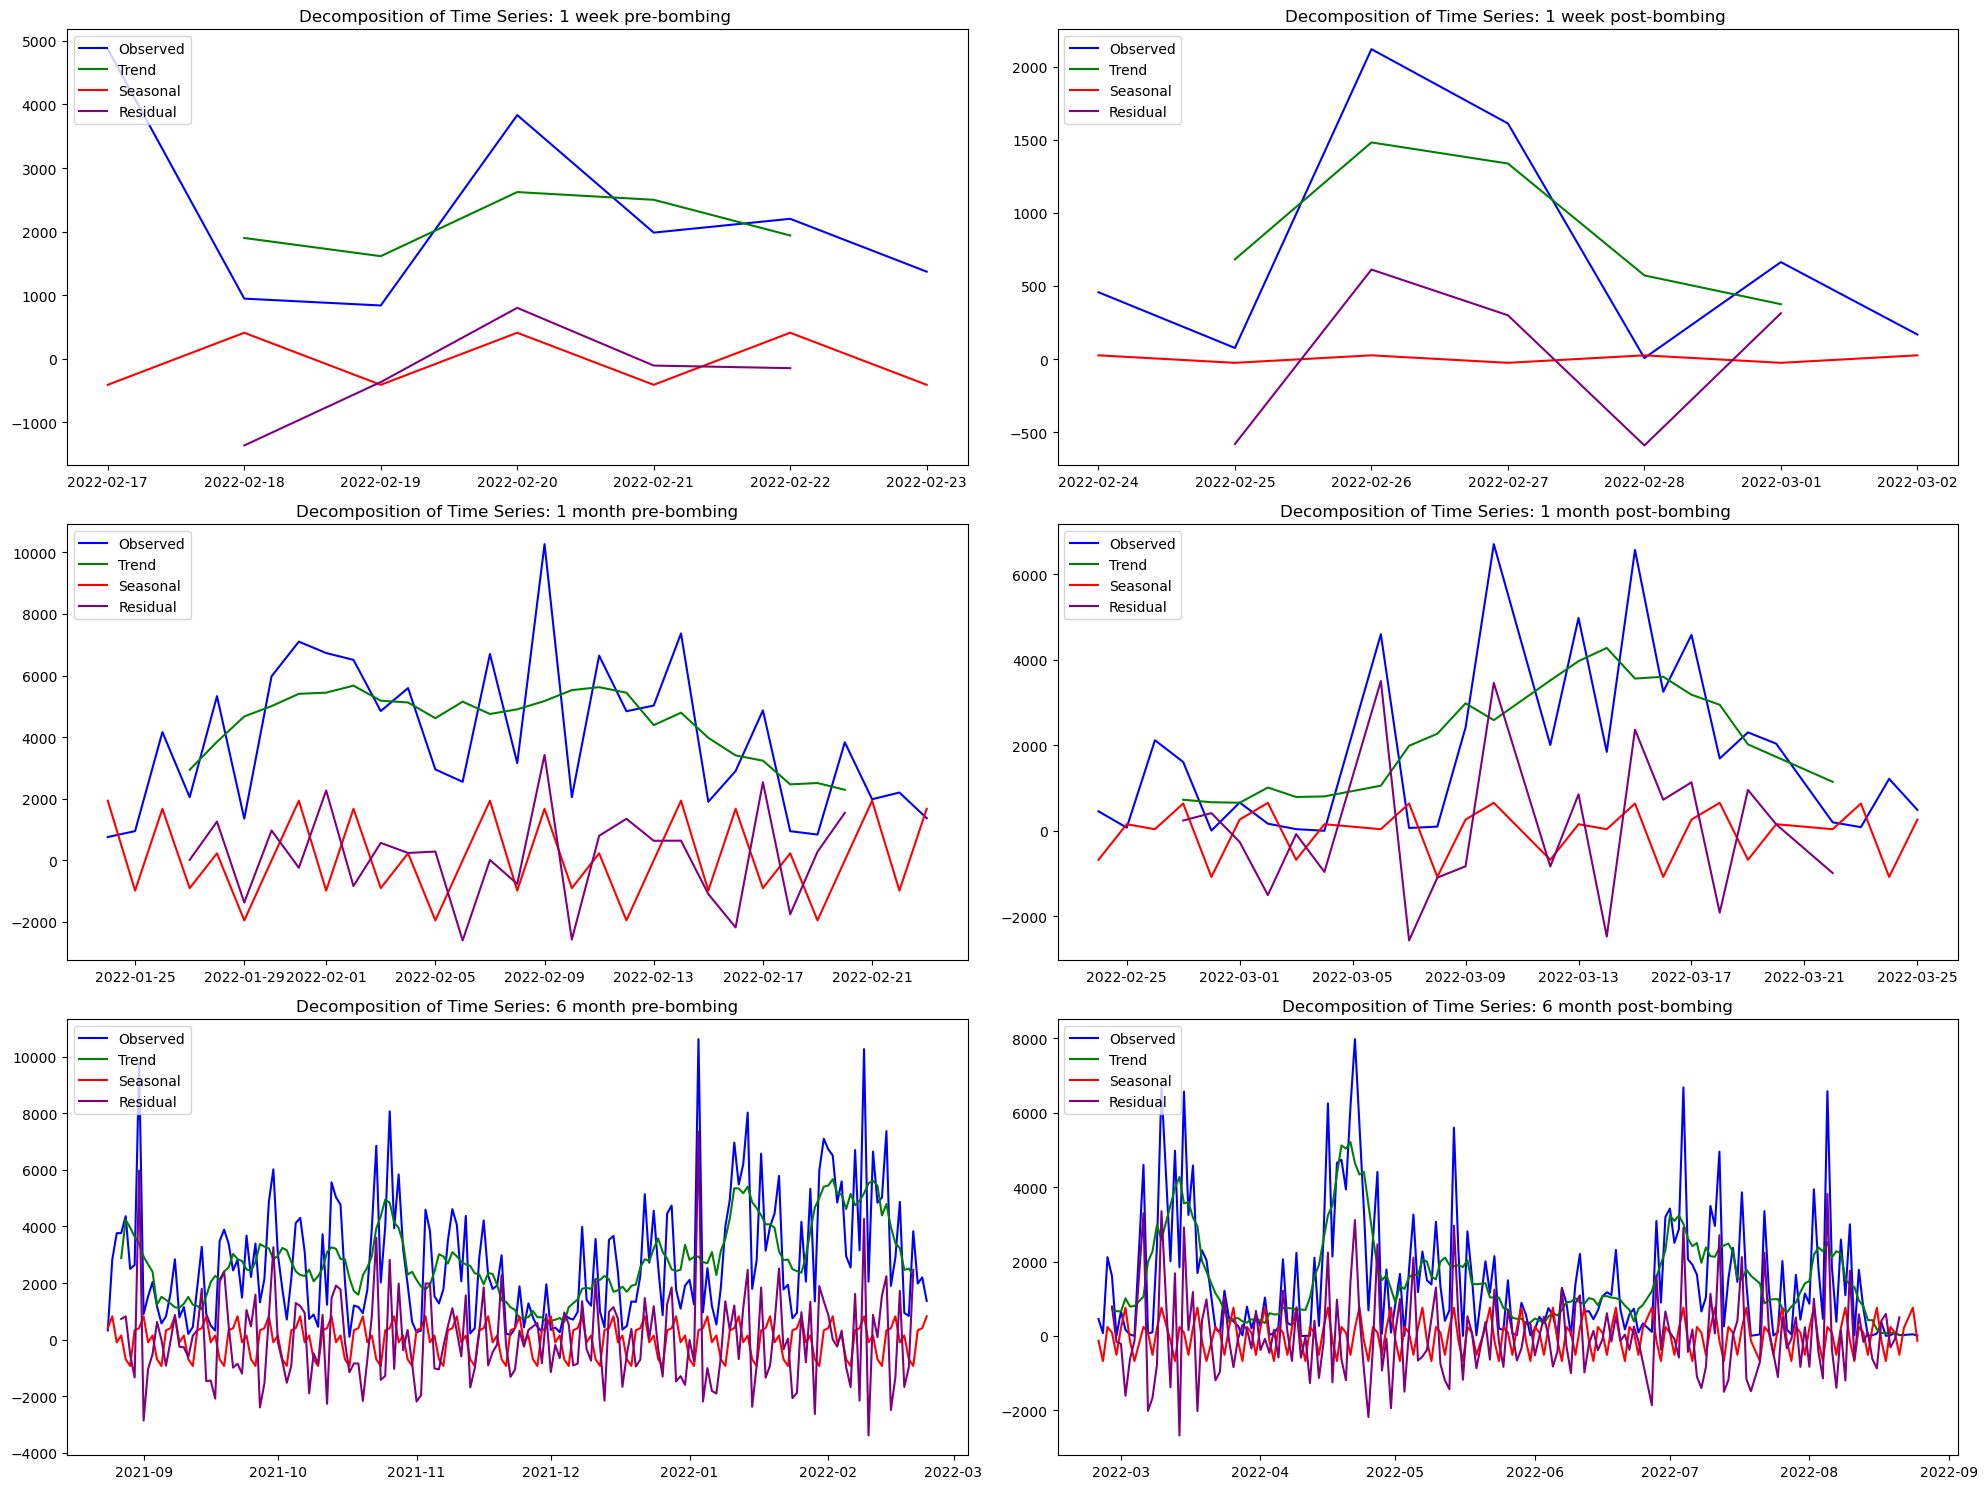

In [228]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

axes[0,0].set_title('Decomposition of Time Series: 1 week pre-bombing ')
axes[0,0].plot(df6.index, week1.observed, label='Observed', color='blue')
axes[0,0].plot(df6.index, week1.trend, label='Trend', color='green')
axes[0,0].plot(df6.index, week1.seasonal, label='Seasonal', color='red')
axes[0,0].plot(df6.index, week1.resid, label='Residual', color='purple')
axes[0,0].legend(loc='upper left')
axes[0,1].set_title('Decomposition of Time Series: 1 week post-bombing ')
axes[0,1].plot(db6.index, week2.observed, label='Observed', color='blue')
axes[0,1].plot(db6.index, week2.trend, label='Trend', color='green')
axes[0,1].plot(db6.index, week2.seasonal, label='Seasonal', color='red')
axes[0,1].plot(db6.index, week2.resid, label='Residual', color='purple')
axes[0,1].legend(loc='upper left')

axes[1,0].set_title('Decomposition of Time Series: 1 month pre-bombing')
axes[1,0].plot(df7.index, month1.observed, label='Observed', color='blue')
axes[1,0].plot(df7.index, month1.trend, label='Trend', color='green')
axes[1,0].plot(df7.index, month1.seasonal, label='Seasonal', color='red')
axes[1,0].plot(df7.index, month1.resid, label='Residual', color='purple')
axes[1,0].legend(loc='upper left')
axes[1,1].set_title('Decomposition of Time Series: 1 month post-bombing ')
axes[1,1].plot(db7.index, month2.observed, label='Observed', color='blue')
axes[1,1].plot(db7.index, month2.trend, label='Trend', color='green')
axes[1,1].plot(db7.index, month2.seasonal, label='Seasonal', color='red')
axes[1,1].plot(db7.index, month2.resid, label='Residual', color='purple')
axes[1,1].legend(loc='upper left')


axes[2,0].set_title('Decomposition of Time Series: 6 month pre-bombing')
axes[2,0].plot(df_ts1.index, sixmonth1.observed, label='Observed', color='blue')
axes[2,0].plot(df_ts1.index, sixmonth1.trend, label='Trend', color='green')
axes[2,0].plot(df_ts1.index, sixmonth1.seasonal, label='Seasonal', color='red')
axes[2,0].plot(df_ts1.index, sixmonth1.resid, label='Residual', color='purple')
axes[2,0].legend(loc='upper left')
axes[2,1].set_title('Decomposition of Time Series: 6 month post-bombing')
axes[2,1].plot(df_ts2.index, sixmonth2.observed, label='Observed', color='blue')
axes[2,1].plot(df_ts2.index, sixmonth2.trend, label='Trend', color='green')
axes[2,1].plot(df_ts2.index, sixmonth2.seasonal, label='Seasonal', color='red')
axes[2,1].plot(df_ts2.index, sixmonth2.resid, label='Residual', color='purple')
axes[2,1].legend(loc='upper left')

plt.tight_layout()